# Inchworm-like source evolution through a geometrically complex fault fueled persistent supershear rupture during the 2018 Palu Indonesia earthquake
This notebook demonstrates how to reproduce [figures](https://github.com/rokuwaki/2018PaluIndonesia/tree/master/pubFigure) presented in the [manuscript](https://doi.org/10.31223/osf.io/j4cas) and [supplemenary material](https://osf.io/v35uj/).   
[Figure 1](#Figure-1)  
[Figure 2](#Figure-2)  
[Figure 3](#Figure-3)  
[Figure 4](#Figure-4)  
[Figure 5](#Figure-5)  
[Figure 6](#Figure-6)  
[Figure S1](#Figure-S1)  
[Figure S2](#Figure-S2)  
[Figure S3](#Figure-S3)  
[Figure S4](#Figure-S4)  
[Figure S5](#Figure-S5)  
[Figure S6](#Figure-S6)  
[Figure S7](#Figure-S7)  
[Figure S8](#Figure-S8)  
[Figure S9](#Figure-S9)  
[Figure S10](#Figure-S10)  
[Figure S11](#Figure-S11)  
[Movie S1](#Movie-S1)    
[Graphical abstract | von Mises](#Graphical-abstract-%7C-von-Mises)  
[Graphical abstract | Rose diagram](#Graphical-abstract-%7C-Rose-diagram)  

*Following data are not archived here, but available publicly or upon request to the authors.  
- `GEBCO_2019` bathymetry/topography https://download.gebco.net/  
Boundaries: `[N4.0, S6.5, W116.0, E126.0]`  
Format: `2D netCDF`  
*You'll get `GEBCO_2019_Day_Month_Year_xxxxxxxxxxxx/gebco_2019_n4.0_s-6.5_w116.0_e126.0.nc`  
- `Bao+2019NatGeosci` https://doi.org/10.1038/s41561-018-0297-z

## Load libraries and parameters

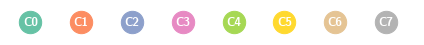

In [2]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
figsize = (5.6, 5.6)
import numpy as np
initfontsize=8
import matplotlib as mpl
mpl.rc('axes', labelsize=initfontsize, titlesize=initfontsize)
mpl.rc('xtick', labelsize=initfontsize)
mpl.rc('ytick', labelsize=initfontsize)
mpl.rc('legend', fontsize=initfontsize, edgecolor='none')
mpl.rc('savefig', dpi=450, transparent=False)
mpl.rc('font', size=initfontsize)
import matplotlib.patheffects as path_effects
from obspy.imaging.beachball import beach
from netCDF4 import Dataset
from matplotlib.colors import LightSource
from matplotlib.colors import LinearSegmentedColormap
def generate_cmap(colors):
    values = range(len(colors))
    vmax = np.ceil(np.max(values))
    color_list = []
    for v, c in zip(values, colors):
        color_list.append( ( v/ vmax, c) )
    return LinearSegmentedColormap.from_list('custom_cmap', color_list)
bathytopo = generate_cmap(['#0093cf', 'w', '#000000'])
slipcmap = generate_cmap(['w', 'r'])
import linecache
from geographiclib.geodesic import Geodesic
geod = Geodesic.WGS84
cmap = plt.get_cmap('Set2', 8)
from cycler import cycler
custom_color_cycle=[]
for i in range(cmap.N):
    rgb = cmap(i)[:3]
    custom_color_cycle.append(str(mpl.colors.rgb2hex(rgb)))
plt.rc('axes', prop_cycle=(cycler(color=custom_color_cycle)))
fig=plt.figure(figsize = figsize); ax=fig.add_axes([0.1, 0.1, 1, 0.06])
for i in range(8):
    ax.scatter(i, 0, s=500)
    ax.text(i, 0, 'C'+str(i), ha='center', va='center', color='white', weight='bold', size=12)
    ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False); ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False); ax.get_xaxis().set_ticks([]); ax.get_yaxis().set_ticks([])
plt.show()
from scipy.interpolate import griddata
from matplotlib.patches import ArrowStyle
import matplotlib.animation as animation
import os
import subprocess, shlex
#from scipy.stats import binned_statistic
from scipy.stats import vonmises
from scipy.special import iv
from scipy.optimize import minimize
import shapefile
import warnings
warnings.filterwarnings("ignore")
import urllib.request
from bs4 import BeautifulSoup
import requests
import git
import pandas as pd

# locations of bends and Palu bay along strike (358 deg) from the epicenter
bx = [-8, -17, -45, -71, -101, -110] 

#data=np.loadtxt('epicenter.dat')
#elon, elat=(data[1], data[0])

def drawinfo(ax, m):
    from matplotlib.markers import MarkerStyle
    
    data=np.loadtxt('NST.txt', delimiter=',', comments='#')
    x, y=m(data[:,0], data[:,1])
    ax.plot(x, y, zorder=2, lw=1, color='C7', alpha=0.85, linestyle='--')

    data=np.loadtxt('PKF.txt', delimiter=',', comments='#')
    x, y=m(data[:,0], data[:,1])
    ax.plot(x, y, zorder=20, lw=1, color='k', alpha=0.85)

    data=np.loadtxt('MF.txt', delimiter=',', comments='#')
    x, y=m(data[:,0], data[:,1])
    ax.plot(x, y, zorder=2, lw=1, color='C7', alpha=0.85)

    data=np.loadtxt('EST.txt', delimiter=',', comments='#')
    x, y=m(data[:,0], data[:,1])
    ax.plot(x, y, zorder=2, lw=1, color='C7', alpha=0.85, linestyle='--')

    data=np.loadtxt('PB2002_BS.txt', delimiter=',', comments='#')
    x, y=m(data[:,0], data[:,1])
    ax.plot(x, y, zorder=2, lw=1, color='C7', alpha=0.85, linestyle='--')

    x, y=m(123, -0.3)
    text=ax.text(x, y, 'Molucca Sea', size=6, color='#003f59')
    text.set_path_effects([path_effects.Stroke(linewidth=1.5, foreground='w', alpha=0.85), path_effects.Normal()])

    x, y=m(124, -5.5)
    text=ax.text(x, y, 'Banda Sea', size=6, color='#003f59')
    text.set_path_effects([path_effects.Stroke(linewidth=1.5, foreground='w', alpha=0.85), path_effects.Normal()])

    x, y=m(120, 2.5)
    text=ax.text(x, y, 'N. Sulawesi trench', size=6, color='C7')
    text.set_path_effects([path_effects.Stroke(linewidth=1.5, foreground='w', alpha=0.85), path_effects.Normal()])

    x, y=m(119.6, 0.55)
    text=ax.text(x, y, 'Palu-Koro fault', size=6, color='k')
    text.set_path_effects([path_effects.Stroke(linewidth=1.5, foreground='w', alpha=0.85), path_effects.Normal()])
    
    x, y=m(120.4, -1)
    text=ax.text(x, y, r'$M_{\mathrm{W}}$ 7.6 2018 Palu earthquake', size=6, color='k', bbox=dict(boxstyle="round",
                   ec='C7',fc='w',alpha=0.5))
    text.set_path_effects([path_effects.Stroke(linewidth=1.5, foreground='w', alpha=0.85), path_effects.Normal()])
    
    x, y=m(118.2, -0.8)
    text=ax.text(x, y, 'Makassar trench', size=6, color='C7', rotation=72)
    text.set_path_effects([path_effects.Stroke(linewidth=1.5, foreground='w', alpha=0.85), path_effects.Normal()])

    x, y=m(120.6, -2.1)
    text=ax.text(x, y, 'Matano fault', size=6, color='C7', rotation=-20)
    text.set_path_effects([path_effects.Stroke(linewidth=1.5, foreground='w', alpha=0.85), path_effects.Normal()])

    x, y=m(123, -2.5)
    text=ax.text(x, y, 'E. Sulawesi trench', size=6, color='C7')
    text.set_path_effects([path_effects.Stroke(linewidth=1.5, foreground='w', alpha=0.85), path_effects.Normal()])

    lon1=+1.19249E+02
    lon2=+1.19475E+02
    lat1=+7.13724E-01
    lat2=-8.10301E-02
    x1, y1=m(lon1-0.1, lat1-0.1)
    x2, y2=m(lon2-0.1, lat2-0.1)
    arrow_params = {'shape': 'left', 'overhang':1, 'head_width':30000, 'head_length':20000}
    a=286
    dx=np.cos(a*np.pi/180.0)*40000
    dy=np.sin(a*np.pi/180.0)*40000
    ax.arrow(x1, y1, dx, dy, **arrow_params)

    x1, y1=m(lon1+0.1, lat1)
    x2, y2=m(lon2+0.1, lat2)
    a=106
    dx=np.cos(a*np.pi/180.0)*40000
    dy=np.sin(a*np.pi/180.0)*40000
    ax.arrow(x2, y2, dx, dy, **arrow_params)
    
def drawtopo(m, my_example_nc_file, flag, alpha, zorder):
    fh = Dataset(my_example_nc_file, mode='r')
    lons = fh.variables['lon'][:]; lats = fh.variables['lat'][:]; tmax = fh.variables['elevation'][:]
    fh.close()
    lon, lat = np.meshgrid(lons, lats)
    xi, yi = m(lon, lat)
    ls = LightSource(azdeg=315, altdeg=45)
    cmap=bathytopo
    tmaxmin=-10000; tmaxmax= 10000#abs(tmaxmin)
    extent = ([xi.min(), xi.max(), yi.min(), yi.max()])
    rgb = ls.shade(tmax, cmap=cmap, blend_mode='overlay', vmin=tmaxmin, vmax=tmaxmax)
    cs = ax.imshow(rgb, interpolation='none', alpha=alpha, cmap=cmap, vmin=tmaxmin, vmax=tmaxmax, \
                 zorder=zorder, origin='lower')
    cs.set_extent(extent)
    return cs

def calc_theta_ml(theta):
    return np.arctan(np.sum(np.sin(theta)) / np.sum(np.cos(theta)))
def calc_A_m_ml(theta, theta_ml):
    return (1.0/len(theta)) * np.sum(np.cos(theta - theta_ml))
def search_m_ml(A_m_ml):
    dx = 1e-4
    kappa_test = np.arange(0, 100+dx, dx)
    for kappa_test in zip(kappa_test):
        diff = np.abs(A_m_ml - iv(1, kappa_test)/iv(0, kappa_test))
        if diff < dx:
            return kappa_test
def search_m_ml_scipy(A, xinit):
    func = (lambda x: np.abs(A - iv(1, x)/iv(0, x)))
    cons = ( {'type': 'ineq', 'fun': lambda x: x} )
    result = minimize(func, x0=xinit, constraints=cons, method="SLSQP")
    return result.x[0]
def von_mises(theta, theta_mu, m):
    return (1.0 / (2.0*np.pi * iv(0, m))) * np.exp(m * np.cos(theta - theta_mu))
def mean_median_std(values):
    x=np.arange(0, len(values), 1)
    nbins=1
    bin_mean, bin_edges, binnumber = binned_statistic(x, values, statistic='mean', bins=nbins)
    bin_median, bin_edges, binnumber = binned_statistic(x, values, statistic='median', bins=nbins)
    bin_sum, bin_edges, binnumber = binned_statistic(x, values**2.0, statistic='sum', bins=nbins)
    bin_count, bin_edges, binnumber = binned_statistic(x, values, statistic='count', bins=nbins)
    std=np.sqrt(bin_sum / bin_count - bin_mean**2.0)
    return bin_mean, bin_median, std
def calc_theta_ml_numpyHist(x, w_hist):
    tmp1 = 0
    tmp2 = 0
    for i in range(len(x)):
        tmp1 = tmp1 + np.sin(x[i]) * w_hist[i]
        tmp2 = tmp2 + np.cos(x[i]) * w_hist[i]
    theta_ml = np.arctan(tmp1 / tmp2)
    return theta_ml
def calc_A_m_ml_numpyHist(x, w_hist, theta_ml):
    tmp = 0
    for i in range(len(x)):
        tmp = tmp + np.cos(x[i] - theta_ml) * w_hist[i]
    A_m_ml = tmp / sum(w_hist)
    return A_m_ml

def load_setting_fort40(file):
    lines=linecache.getlines(file)
    fort40=np.genfromtxt(file, skip_header=1, skip_footer=len(lines)-2)
    moment, mw, h0, vr=fort40[0], fort40[1], fort40[5], fort40[6]
    fort40=np.genfromtxt(file, skip_header=3, skip_footer=len(lines)-4)
    model_str, model_dip=fort40[0], fort40[1]
    fort40=np.genfromtxt(file, skip_header=5, skip_footer=len(lines)-6)
    model_t_int, model_jtn, model_icmn=fort40[6], fort40[7], fort40[8]
    lines=linecache.getlines(file)
    fort40=np.genfromtxt(file, skip_header=7, skip_footer=len(lines)-8)
    variance=fort40[0]        
    return h0, model_dip, model_icmn, model_str
blue=plt.get_cmap('RdBu_r')(20)
red=plt.get_cmap('RdBu_r')(220)

mpl.rcParams["font.family"] = "CMU Sans Serif"
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'CMU Sans Serif'
mpl.rcParams['mathtext.it'] = 'CMU Sans Serif:italic'
mpl.rcParams['mathtext.bf'] = 'CMU Sans Serif:bold'


## Move to data directory

In [8]:
# Set PATHs to this notebook and data
nbpath = '/Users/ryo/GoogleDrive/Work/2018Indonesia/'
os.chdir(nbpath)

datapath = nbpath + 'data/'
os.chdir(datapath)
print('Now at data dir: '+os.getcwd())

Now at data dir: /Users/Ryo/GoogleDrive/Work/2018Indonesia/data


In [193]:
fh = Dataset('kur_slab2_dep_02.24.18.grd', mode='r')
print(fh)
lons = fh.variables['x'][:]; lats = fh.variables['y'][:]; tmax = fh.variables['z'][:]
fh.close()
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)
ls = LightSource(azdeg=315, altdeg=45)
cmap=bathytopo
tmaxmin=-10000; tmaxmax= 10000#abs(tmaxmin)
extent = ([xi.min(), xi.max(), yi.min(), yi.max()])
rgb = ls.shade(tmax, cmap=cmap, blend_mode='overlay', vmin=tmaxmin, vmax=tmaxmax)
cs = ax.imshow(rgb, interpolation='none', alpha=alpha, cmap=cmap, vmin=tmaxmin, vmax=tmaxmax, \
             zorder=zorder, origin='lower')
cs.set_extent(extent)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: COARDS, CF-1.5
    title: Output/kur_slab2_02.24.18/kur_slab2_dep_02.24.18.grd
    history: xyz2grd Output/kur_slab2_02.24.18/kur_slab2_dep_02.24.18.txt -R121.0/170.0/35.0/61.0 -I0.05/0.05 -GOutput/kur_slab2_02.24.18/kur_slab2_dep_02.24.18.grd
    GMT_version: 5.2.1 (r15220) [64-bit]
    dimensions(sizes): x(981), y(521)
    variables(dimensions): float64 x(x), float64 y(y), float32 z(y,x)
    groups: 



NameError: name 'zorder' is not defined

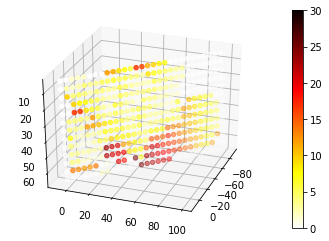

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

data = np.loadtxt('/Users/ryo/GoogleDrive/Work/2017Mexico/tsunami/2017ChiapasMexicoROYY/data/tmp')
x, y, tinit, trise, slip = data[:,2], data[:,3], data[:,7], data[:,8], data[:,5]
locx, locy, z = data[:,9], data[:,10], data[:,4]
#x, y, sliprate = data[:,0], data[:,1], data[:,2]
#plt.scatter(x, y, c=trise, s=1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

cs=ax.scatter(x, y, z, c=tinit, cmap='hot_r', vmin=0, vmax=30)
ax.view_init(30, 20)
ax.invert_zaxis()
plt.colorbar(cs)
#plt.scatter(x, y, c=sliprate, s=1)

## Figure 1

147.693 167.693 38.986 58.986
Loading USGS catalog...
[ 1.4268e+02  3.7890e+01  1.5000e+01  1.0800e+00 -1.4000e-01 -9.5000e-01
  1.5100e+00  3.0200e+00 -3.6000e-01  2.6000e+01]
[-700. -680. -660. -640. -620. -600. -580. -560. -540. -520. -500. -480.
 -460. -440. -420. -400. -380. -360. -340. -320. -300. -280. -260. -240.
 -220. -200. -180. -160. -140. -120. -100.  -80.  -60.  -40.  -20.    0.]
Loading plate boundary...
`tectonicplates.git` is already cloned.


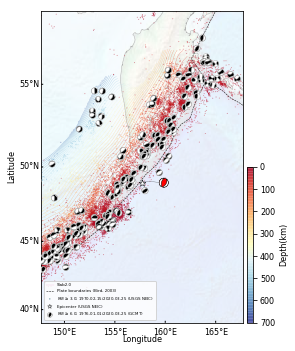

In [212]:
#lonmin=116.5; lonmax=125.8; latmin=-6.1; latmax=3.5
lonmin=elon-10; lonmax=elon+10; latmin=elat-10; latmax=elat+10
print(lonmin, lonmax, latmin, latmax)
m=Basemap(llcrnrlon=lonmin,llcrnrlat=latmin,urcrnrlon=lonmax,urcrnrlat=latmax,\
          rsphere=(6378137.00,6356752.3142),resolution='i',projection='merc')
x, y=m([lonmin, lonmax], [latmin, latmax])
aspect=max(x)/max(y)
mapwidth=0.5; mapheight=mapwidth/aspect
fig=plt.figure(figsize=figsize)
ax=fig.add_axes([0.1, 0.1, mapwidth, mapheight])
axp=ax.get_position()

m.drawparallels(np.arange(-80.,81.,5),labels=[1,0,0,0], fontsize=initfontsize, \
            dashes=(2,10000), color='k')        
m.drawmeridians(np.arange(-180.,181.,5),labels=[0,0,0,1], fontsize=initfontsize, \
            dashes=(2,10000), color='k')
m.drawcoastlines(color='C7', linewidth=0.5, zorder=0)
#m.fillcontinents(color='C7', alpha=0.05)
ax.set_xlabel('Longitude', labelpad=12)
ax.set_ylabel('Latitude', labelpad=25)

m.etopo(zorder=-1, alpha=0.1)
#drawinfo(ax, m)

url = 'https://earthquake.usgs.gov/fdsnws/event/1/query?\
format=csv&starttime=1970-02-15&endtime=2020-03-25&\
minmagnitude=3&minlatitude='+str(latmin)+'&minlongitude='+str(lonmin)+'&maxlatitude='+str(latmax)+'&maxlongitude='+str(lonmax)
filename = './backgroundseism_USGS.txt'
print('Loading USGS catalog...')
#urllib.request.urlretrieve(url, filename)
data=np.loadtxt(filename, delimiter=',', skiprows=1, usecols=(1,2,3,4))
lon, lat, depth, mag=data[:,1], data[:,0], data[:,2], data[:,3]
x, y=m(lon, lat)
#ax.scatter(x, y, s=1, facecolor='#003f59', alpha=0.5, edgecolor='none')
sc=ax.scatter(x, y, s=1, c=depth, alpha=0.5, edgecolor='none', cmap='RdYlBu', vmin=0, vmax=700)


mecalist=np.loadtxt('gcmt_psmeca.txt', usecols=(0,1,2,3,4,5,6,7,8,9))
for data in mecalist:
    lon, lat, mrr, mtt, mpp, mrt, mrp, mtp = data[0],data[1],data[3],data[4],data[5],data[6],data[7],data[8]

    #url = 'http://globalcmt.org/cgi-bin/globalcmt-cgi-bin/CMT5/form?itype=ymd&yr=2020&mo=3&\
    #day=25&oyr=1976&omo=1&oday=1&jyr=1976&jday=1&ojyr=1976&ojday=1&otype=nd&nday=1&lmw=7&um\
    #w=10&lms=0&ums=10&lmb=0&umb=10&llat=-90&ulat=90&llon=-180&ulon=180&lhd=0&uhd=1000&lts=-9\
    #999&uts=9999&lpe1=0&upe1=90&lpe2=0&upe2=90&list=6'

    #url = 'https://www.globalcmt.org/cgi-bin/globalcmt-cgi-bin/CMT5/form?itype=ymd&yr=1976&mo=1&day=1&otype=ymd&oyr=2020&omo=3&oday=30&jyr=1976&jday=1&ojyr=1976&ojday=1&nday=1&lmw=7&umw=10&lms=0&ums=10&lmb=0&umb=10&llat=-90&ulat=90&llon=-180&ulon=180&lhd=0&uhd=1000&lts=-9999&uts=9999&lpe1=0&upe1=90&lpe2=0&upe2=90&list=6'

    #print('Loading GCMT solution...')
    #response = requests.get(url)
    #response.encoding = response.apparent_encoding 
    #soup = BeautifulSoup(response.text, 'html.parser') 
    #psmeca = soup.find_all('pre')[1].get_text(strip=True).split()
    #print(len(psmeca))
    #lon, lat = float(psmeca[0]), float(psmeca[1])
    #mrr, mtt, mpp = float(psmeca[3]), float(psmeca[4]), float(psmeca[5])
    #mrt, mrp, mtp = float(psmeca[6]), float(psmeca[7]), float(psmeca[8])
    
    x, y = m(lon, lat)
    x0, y0=x, y
    #x1, y1=m(lon+0.6, elat)
    #ax.plot([x0, x1], [y0, y1], lw=0.5, color='C7')
    ax = plt.gca()
    focmecs=[mrr, mtt, mpp, mrt, mrp, mtp]
    #print(data)
    try:
        b = beach(focmecs, xy=(x0, y0), width=70000, linewidth=0.5, facecolor='k', edgecolor='C7')
        b.set_zorder(100); b.set_alpha(1); b.set_clip_on(True)
        ax.add_collection(b)
    except ValueError:
        print(data)

lon, lat, mrr, mtt, mpp, mrt, mrp, mtp = 157.85, 49.09, 1.98, -0.19, -1.79, 0.24, -0.31, -0.81     
x, y = m(lon, lat)
x0, y0=x, y
x1, y1=m(lon+2, elat)
ax.plot([x0, x1], [y0, y1], lw=0.2, color='k')
ax = plt.gca()
focmecs=[mrr, mtt, mpp, mrt, mrp, mtp]
b = beach(focmecs, xy=(x1, y1), width=100000, linewidth=0.5, facecolor='r', edgecolor='k')
b.set_zorder(100); b.set_alpha(1); b.set_clip_on(True)
ax.add_collection(b)

ax.scatter([], [], s=1, facecolor='#003f59', alpha=1, edgecolor='none', 
           label=r'$M_{\mathrm{W}}$ ≥ 3.0; 1970-02-15/2020-03-25 (USGS NEIC)')
ax.scatter([], [], s=20, marker='*', facecolor='none', edgecolor='k', linewidth=0.5, alpha=0.8, zorder=101, 
           label='Epicenter (USGS NEIC)')
ax.plot([], [], linewidth=0.2, label='Slab2.0', color='C3')
ax.plot([], [], color='k', lw=0.5, zorder=0, linestyle='--', label='Plate boundaries (Bird, 2003)')
ax.scatter([], [], s=1, facecolor='none', edgecolor='none', label=r'$M_{\mathrm{W}}$ ≥ 6.0; 1976-01-01/2020-03-25 (GCMT)')
plt.legend(loc=[0.015, 0.015*aspect], fontsize=4)

#################### color bar
cax=fig.add_axes([axp.x1+0.01, axp.y0, 0.015, (axp.y1-axp.y0)*0.5])
#cbar=plt.colorbar(cstopo, cax=cax, ticks=np.linspace(-4000, 4000, 5), label='Bathymetry/Topography (m)')
#cbar=fig.colorbar(sc, cax=cax, label='Depth (km)').ax.invert_yaxis()
#ticks = cbar.get_ticks()
#print(ticks)
#cbar.ax.invert_yaxis()
#cbar.ax.set_yticklabels(ticks)

norm=mpl.colors.Normalize(vmin=0, vmax=700)
cb=mpl.colorbar.ColorbarBase(cax, cmap='RdYlBu', norm=norm, ticks=np.arange(0, 800, 100), alpha=0.5)
cb.set_label('Depth(km)')
plt.gca().invert_yaxis()


'''
#################### inset regional map
lonmin=elon-25; lonmax=elon+25; latmin=elat-18; latmax=elat+18
m=Basemap(llcrnrlon=lonmin,llcrnrlat=latmin,urcrnrlon=lonmax,urcrnrlat=latmax,\
          rsphere=(6378137.00,6356752.3142),resolution='i',projection='merc')
x, y=m([lonmin, lonmax], [latmin, latmax])
aspect=max(x)/max(y)
mapwidth=0.135; mapheight=mapwidth/aspect
ax=fig.add_axes([axp.x1+0.01, axp.y0, mapwidth, mapheight])
axp=ax.get_position()
m.fillcontinents(color='C7', alpha=0.5)

print('Loading plate boundary...')
try:
    git.Git('./').clone('https://github.com/fraxen/tectonicplates.git')
except git.GitCommandError as e: 
    print('`tectonicplates.git` is already cloned.')
src = shapefile.Reader('tectonicplates/PB2002_boundaries.shp')
for tmp in src.shapeRecords():
    x = [i[0] for i in tmp.shape.points[:]]
    y = [i[1] for i in tmp.shape.points[:]]
    x, y = m(x, y)
    ax.plot(x, y, color='k', lw=0.5)

axp = ax.get_position()
platename = ['AU', 'EU (SU)', 'PHS']
locx = [axp.x0+0.08, axp.x0+0.01, axp.x0+0.088]
locy = [axp.y0+0.017, axp.y0+0.083, axp.y0+0.094]
for i in range(len(locx)):
    text=fig.text(locx[i], locy[i], platename[i], size=6, color='k', va='top', ha='left')
    text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='w'), path_effects.Normal()])
'''

x, y=m(elon, elat)
ax.scatter(x, y, s=50, marker='*', facecolor='w', edgecolor='k', alpha=1, zorder=101, linewidth=0.5)

fh = Dataset('kur_slab2_dep_02.24.18.grd', mode='r')
lons = fh.variables['x'][:]; lats = fh.variables['y'][:]; tmax = fh.variables['z'][:]
fh.close()
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)
interval = np.linspace(-700, 0, 36)
print(interval)
cont = ax.contour(xi, yi, tmax, interval, cmap='RdYlBu_r', linewidths=0.2, vmin=-700, vmax=0, zorder=0)
#plt.clabel(cont)

print('Loading plate boundary...')
try:
    git.Git('./').clone('https://github.com/fraxen/tectonicplates.git')
except git.GitCommandError as e: 
    print('`tectonicplates.git` is already cloned.')
src = shapefile.Reader('tectonicplates/PB2002_boundaries.shp')
for tmp in src.shapeRecords():
    x = [i[0] for i in tmp.shape.points[:]]
    y = [i[1] for i in tmp.shape.points[:]]
    x, y = m(x, y)
    ax.plot(x, y, color='k', lw=0.5, zorder=0, linestyle='--')

#dummy beachball for legend
bax=fig.add_axes([axp.x0+0.014, axp.y0+0.012, 0.015, 0.015])
b = beach(focmecs, xy=(0.5, 0.5), width=0.8, linewidth=0.3, facecolor='k', edgecolor='C7')
b.set_zorder(100); b.set_alpha(1); b.set_clip_on(True)
bax.add_collection(b)
bax.patch.set_alpha(0)
bax.set_axis_off()

plt.savefig('pubFigure/figure1.pdf', bbox_inches='tight', pad_inches=0.1)
plt.savefig('pubFigure/figure1.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

In [204]:
def drawtopo(m, my_example_nc_file, flag, alpha, zorder):
    fh = Dataset(my_example_nc_file, mode='r')
    lons = fh.variables['lon'][:]; lats = fh.variables['lat'][:]; tmax = fh.variables['elevation'][:]
    fh.close()
    lon, lat = np.meshgrid(lons, lats)
    xi, yi = m(lon, lat)
    ls = LightSource(azdeg=315, altdeg=45)
    cmap=bathytopo
    cmap = cmo.topo
    tmaxmin=-10000; tmaxmax= 10000#abs(tmaxmin)
    extent = ([xi.min(), xi.max(), yi.min(), yi.max()])
    rgb = ls.shade(tmax, cmap=cmap, blend_mode='overlay', vmin=tmaxmin, vmax=tmaxmax)
    cs = ax.imshow(rgb, interpolation='none', alpha=alpha, cmap=cmap, vmin=tmaxmin, vmax=tmaxmax, \
                 zorder=zorder, origin='lower')
    cs.set_extent(extent)
    return cs

172 192 -43.294 -23.293999999999997


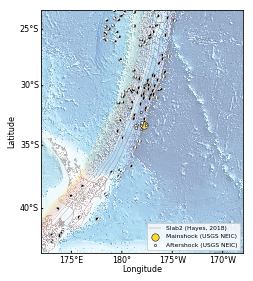

In [269]:
#lonmin=116.5; lonmax=125.8; latmin=-6.1; latmax=3.5
elat, elon = -33.294, -177.838
elon = 360 + elon
#lonmin=elon-10; lonmax=elon+10; latmin=elat-10; latmax=elat+10
#lonmin=-185; lonmax=-170; latmin=elat-10; latmax=elat+10
lonmin=172; lonmax=192; latmin=elat-10; latmax=elat+10
#lonmin=160; lonmax=180; latmin=elat-10; latmax=elat+10
print(lonmin, lonmax, latmin, latmax)
m=Basemap(llcrnrlon=lonmin,llcrnrlat=latmin,urcrnrlon=lonmax,urcrnrlat=latmax,\
          rsphere=(6378137.00,6356752.3142),resolution='i',projection='merc')
x, y=m([lonmin, lonmax], [latmin, latmax])
aspect=max(x)/max(y)
mapwidth=0.5; mapheight=mapwidth/aspect
fig=plt.figure(figsize=figsize)
ax=fig.add_axes([0.1, 0.1, mapwidth, mapheight])
axp=ax.get_position()

'''
lonmin=elon-10; lonmax=elon+10; latmin=elat-10; latmax=elat+10
lonmin=172.162; lonmax = 192.162
#lonmin=160; lonmax=180; latmin=elat-10; latmax=elat+10
print(lonmin, lonmax, latmin, latmax)
m=Basemap(llcrnrlon=lonmin,llcrnrlat=latmin,urcrnrlon=lonmax,urcrnrlat=latmax,\
          rsphere=(6378137.00,6356752.3142),resolution='i',projection='merc')

'''

m.drawparallels(np.arange(-80.,81.,5),labels=[1,0,0,0], fontsize=initfontsize, \
            dashes=(2,10000), color='k')        
m.drawmeridians(np.arange(-180.,181.,5),labels=[0,0,0,1], fontsize=initfontsize, \
            dashes=(2,10000), color='k')
m.drawcoastlines(color='C7', linewidth=0.5, zorder=0)
#m.fillcontinents(color='C7', alpha=0.05)
ax.set_xlabel('Longitude', labelpad=12)
ax.set_ylabel('Latitude', labelpad=25)

'''
#drawinfo(ax, m)

lon, lat, mrr, mtt, mpp, mrt, mrp, mtp = 157.85, 49.09, 1.98, -0.19, -1.79, 0.24, -0.31, -0.81     
x, y = m(lon, lat)
x0, y0=x, y
x1, y1=m(lon+2, elat)
ax.plot([x0, x1], [y0, y1], lw=0.2, color='k')
ax = plt.gca()
focmecs=[mrr, mtt, mpp, mrt, mrp, mtp]
b = beach(focmecs, xy=(x1, y1), width=100000, linewidth=0.5, facecolor='r', edgecolor='k')
b.set_zorder(100); b.set_alpha(1); b.set_clip_on(True)
ax.add_collection(b)

#topodata = 'GEBCO_2019_21_Jan_2020_8fb22d7a46d8/gebco_2019_n4.0_s-6.5_w116.0_e126.0.nc'
#cstopo=drawtopo(m, topodata, 1, 0.3, 0)
#topodata = '/Users/ryo/Downloads/GEBCO_2019_26_Mar_2020_7a27691a0bde/gebco_2019_n60.0_s40.0_w140.0_e170.0.nc'
#cstopo=drawtopo(m, topodata, 1, 1, -1)
'''

#m.etopo(zorder=-1, alpha=0.3)
'''
src = shapefile.Reader('tectonicplates/PB2002_boundaries.shp')
for tmp in src.shapeRecords():
    #x = [i[0] for i in tmp.shape.points[:]]
    y = [ i[1] for i in tmp.shape.points[:] ]
    
    x = [ i[0] if i[0] >= 0 else 360 + i[0] for i in tmp.shape.points[:] ]
    #print(x, y)
    
    x, y = m(x, y)
    ax.plot(x, y, color='k', lw=0.5, zorder=0, linestyle='--')

'''
# https://www.sciencebase.gov/catalog/item/5aa318e1e4b0b1c392ea3f10
fh = Dataset('Slab2_AComprehe/ker_slab2_dep_02.24.18.grd', mode='r')
lons = fh.variables['x'][:]; lats = fh.variables['y'][:]; tmax = fh.variables['z'][:]
fh.close()
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)
interval = np.arange(-700, 40, 20)
cont = ax.contour(xi, yi, tmax, interval, cmap='RdYlBu_r', linewidths=0.2, vmin=-700, vmax=0, zorder=0, label='Slab2 (Hayes, 2018)')
#ax.clabel(cont, cont.levels[::2], fmt='%.0f', fontsize=4)
    
x, y=m(elon, elat)
ax.scatter(x, y, s=5*np.exp(7.4) / 150, marker='o', facecolor='C5', edgecolor='k', alpha=1, zorder=101, linewidth=0.5, label='Mainshock (USGS NEIC)')

#url = 'https://earthquake.usgs.gov/fdsnws/event/1/query?\
#format=csv&starttime=2020-06-18&endtime=2020-06-20&\
#minmagnitude=3&minlatitude='+str(latmin)+'&minlongitude='+str(lonmin)+'&maxlatitude='+str(latmax)+'&maxlongitude='+str(lonmax)
#filename = './backgroundseism_USGS.txt'
filename = './usgsAftershock.txt'
#print('Loading USGS catalog...')
#urllib.request.urlretrieve(url, filename)
data = np.loadtxt(filename, usecols=(1, 2, 4), skiprows=1, delimiter=',')
mag = data[:,2]
x, y = m(360 + data[:,1], data[:,0])
ax.scatter(x, y, s=5*np.exp(mag) / 150, marker='o', facecolor='w', edgecolor='k', alpha=1, zorder=105, lw=0.5, label='Aftershock (USGS NEIC)')

mecalist=np.loadtxt('gcmt_psmeca.txt', usecols=(0,1,2,3,4,5,6,7,8,9))
for data in mecalist:
    lon, lat, mrr, mtt, mpp, mrt, mrp, mtp = data[0],data[1],data[3],data[4],data[5],data[6],data[7],data[8]
    if lon < 0: 
        lon = 360 + lon
    x, y = m(lon, lat)
    x0, y0=x, y
    ax = plt.gca()
    focmecs=[mrr, mtt, mpp, mrt, mrp, mtp]
    try:
        b = beach(focmecs, xy=(x0, y0), width=40000, linewidth=0.2, facecolor='k', edgecolor='C7')
        b.set_zorder(102); b.set_alpha(1); b.set_clip_on(True)
        ax.add_collection(b)
    except ValueError:
        print(data)

        
import matplotlib.image as mpimg
# the shaded topo/bathy image is made by GMT 
#   because matplotlib's imshow may not cooperate with map projection
# $ bash plotTopoBathyGMT.sh
img = mpimg.imread('plotTopoBathyGMT.png') 
topoimg = ax.imshow(img, zorder=-1)
x, y=m([lonmin, lonmax], [latmin, latmax])
extent=(min(x),max(x),min(y),max(y))
topoimg.set_extent(extent)
topoimg.set_alpha(0.5)

#ax.plot([], [], color='k', lw=0.5, zorder=0, linestyle='--', label='Plate boundary (Bird, 2003)')
cmap=plt.get_cmap('RdYlBu_r')
ax.plot([], [], color=cmap(255), lw=0.2, label='Slab2 (Hayes, 2018)')

plt.legend(loc='lower right', fontsize=6)

'''
ax.scatter([], [], s=1, facecolor='#003f59', alpha=1, edgecolor='none', 
           label=r'$M_{\mathrm{W}}$ ≥ 3.0; 1970-02-15/2020-03-25 (USGS NEIC)')
ax.scatter([], [], s=20, marker='*', facecolor='none', edgecolor='k', linewidth=0.5, alpha=0.8, zorder=101, 
           label='Epicenter (USGS NEIC)')
ax.plot([], [], linewidth=0.2, label='Slab2.0', color='C3')
ax.plot([], [], color='k', lw=0.5, zorder=0, linestyle='--', label='Plate boundaries (Bird, 2003)')
ax.scatter([], [], s=1, facecolor='none', edgecolor='none', label=r'$M_{\mathrm{W}}$ ≥ 6.0; 1976-01-01/2020-03-25 (GCMT)')
plt.legend(loc=[0.015, 0.015*aspect], fontsize=4)

#################### color bar
cax=fig.add_axes([axp.x1+0.01, axp.y0, 0.015, (axp.y1-axp.y0)*0.5])
#cbar=plt.colorbar(cstopo, cax=cax, ticks=np.linspace(-4000, 4000, 5), label='Bathymetry/Topography (m)')
cbar=plt.colorbar(sc, cax=cax, label='Depth (km)')

#dummy beachball for legend
bax=fig.add_axes([axp.x0+0.014, axp.y0+0.012, 0.015, 0.015])
b = beach(focmecs, xy=(0.5, 0.5), width=0.8, linewidth=0.3, facecolor='k', edgecolor='C7')
b.set_zorder(100); b.set_alpha(1); b.set_clip_on(True)
bax.add_collection(b)
bax.patch.set_alpha(0)
bax.set_axis_off()
'''

#plt.savefig('pubFigure/figure1.pdf', bbox_inches='tight', pad_inches=0.1)
plt.savefig('mapLarge.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

180.162 184.162 -35.294 -31.293999999999997
[-1.7745e+02 -3.0280e+01  4.1000e+01  4.1500e+00 -1.6000e-01 -3.9900e+00
  6.4000e-01  1.9500e+00 -8.0000e-01  2.3000e+01]


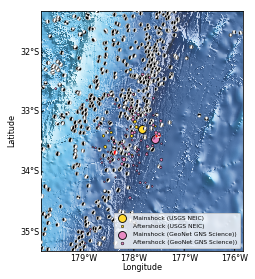

In [469]:
#lonmin=116.5; lonmax=125.8; latmin=-6.1; latmax=3.5
elat, elon = -33.294, -177.838
elon = 360 + elon
lonmin=elon-2; lonmax=elon+2; latmin=elat-2; latmax=elat+2
#lonmin=-185; lonmax=-170; latmin=elat-10; latmax=elat+10
#lonmin=172; lonmax=192; latmin=elat-10; latmax=elat+10
#lonmin=160; lonmax=180; latmin=elat-10; latmax=elat+10
print(lonmin, lonmax, latmin, latmax)
m=Basemap(llcrnrlon=lonmin,llcrnrlat=latmin,urcrnrlon=lonmax,urcrnrlat=latmax,\
          rsphere=(6378137.00,6356752.3142),resolution='i',projection='merc')
x, y=m([lonmin, lonmax], [latmin, latmax])
aspect=max(x)/max(y)
mapwidth=0.5; mapheight=mapwidth/aspect
fig=plt.figure(figsize=figsize)
ax=fig.add_axes([0.1, 0.1, mapwidth, mapheight])
axp=ax.get_position()

'''
lonmin=elon-10; lonmax=elon+10; latmin=elat-10; latmax=elat+10
lonmin=172.162; lonmax = 192.162
#lonmin=160; lonmax=180; latmin=elat-10; latmax=elat+10
print(lonmin, lonmax, latmin, latmax)
m=Basemap(llcrnrlon=lonmin,llcrnrlat=latmin,urcrnrlon=lonmax,urcrnrlat=latmax,\
          rsphere=(6378137.00,6356752.3142),resolution='i',projection='merc')

'''

m.drawparallels(np.arange(-80.,81.,1),labels=[1,0,0,0], fontsize=initfontsize, \
            dashes=(2,10000), color='k')        
m.drawmeridians(np.arange(-180.,181.,1),labels=[0,0,0,1], fontsize=initfontsize, \
            dashes=(2,10000), color='k')
m.drawcoastlines(color='C7', linewidth=0.5, zorder=0)
#m.fillcontinents(color='C7', alpha=0.05)
ax.set_xlabel('Longitude', labelpad=12)
ax.set_ylabel('Latitude', labelpad=25)

    
x, y=m(elon, elat)
ax.scatter(x, y, s=5*np.exp(7.4) / 130, marker='o', facecolor='C5', edgecolor='k', alpha=1, zorder=101, linewidth=0.85, label='Mainshock (USGS NEIC)')

#url = 'https://earthquake.usgs.gov/fdsnws/event/1/query?\
#format=csv&starttime=2020-06-18&endtime=2020-06-20&\
#minmagnitude=3&minlatitude='+str(latmin)+'&minlongitude='+str(lonmin)+'&maxlatitude='+str(latmax)+'&maxlongitude='+str(lonmax)
#filename = './backgroundseism_USGS.txt'
filename = './usgsAftershock.txt'
#print('Loading USGS catalog...')
#urllib.request.urlretrieve(url, filename)
data = np.loadtxt(filename, usecols=(1, 2, 4), skiprows=1, delimiter=',')
mag = data[:,2]
x, y = m(360 + data[:,1], data[:,0])
ax.scatter(x, y, s=5*np.exp(mag) / 130, marker='o', facecolor='C5', edgecolor='k', alpha=1, zorder=120, lw=0.5, label='Aftershock (USGS NEIC)')

x, y=m(360 -177.5763702,-33.45908737)
ax.scatter(x, y, s=5*np.exp(7.4) / 130, marker='o', facecolor='C3', edgecolor='k', alpha=1, zorder=101, linewidth=0.85, label='Mainshock (GeoNet GNS Science))')

filename = './gnsAftershock.txt'
#print('Loading USGS catalog...')
#urllib.request.urlretrieve(url, filename)
data = np.loadtxt(filename, usecols=(4, 5, 6), skiprows=1, delimiter=',')
mag = data[:,2]
x, y = m(360 + data[:,0], data[:,1])
ax.scatter(x, y, s=5*np.exp(mag) / 130, marker='o', facecolor='C3', edgecolor='k', alpha=1, zorder=120, lw=0.5, label='Aftershock (GeoNet GNS Science))')

cmap=plt.get_cmap('RdYlBu')
#mecalist=np.loadtxt('gcmt_psmeca.txt', usecols=(0,1,2,3,4,5,6,7,8,9))
mecalist=np.loadtxt('SPUD_PSMECA_bundle_2020-06-21T18.59.30.txt', usecols=(0,1,2,3,4,5,6,7,8,9))
#mecalist=np.loadtxt('SPUD_PSMECA_bundle_2020-06-20T22.27.06.txt', usecols=(0,1,2,3,4,5,6,7,8,9))
for data in mecalist:
    lon, lat, mrr, mtt, mpp, mrt, mrp, mtp = data[0],data[1],data[3],data[4],data[5],data[6],data[7],data[8]
    power=data[9]
    depth=data[2]
    if lon < 0: 
        lon = 360 + lon
    x, y = m(lon, lat)
    x0, y0=x, y
    ax = plt.gca()
    focmecs=[mrr, mtt, mpp, mrt, mrp, mtp]
    color=cmap(depth/350)
    try:
        b = beach(focmecs, xy=(x0, y0), width=1200 * np.power(10, power/27), linewidth=0.2, facecolor='k', edgecolor='C7')
        b.set_zorder(110); b.set_alpha(1); b.set_clip_on(True)
        ax.add_collection(b)
    except ValueError:
        print(data)

mecalist=np.loadtxt('gcmt_main_after.txt', usecols=(0,1,2,3,4,5,6,7,8,9))
#mecalist=np.loadtxt('SPUD_PSMECA_bundle_2020-06-20T22.27.06.txt', usecols=(0,1,2,3,4,5,6,7,8,9))
for data in mecalist:
    lon, lat, mrr, mtt, mpp, mrt, mrp, mtp = data[0],data[1],data[3],data[4],data[5],data[6],data[7],data[8]
    power=data[9]
    depth=data[2]
    if lon < 0: 
        lon = 360 + lon
    x, y = m(lon, lat)
    x0, y0=x, y
    ax = plt.gca()
    focmecs=[mrr, mtt, mpp, mrt, mrp, mtp]
    color=cmap(depth/350)
    try:
        b = beach(focmecs, xy=(x0, y0), width=1200 * np.power(10, power/27), linewidth=0.2, facecolor='r', edgecolor='C7')
        b.set_zorder(110); b.set_alpha(1); b.set_clip_on(True)
        ax.add_collection(b)
    except ValueError:
        print(data)

import matplotlib.image as mpimg
# the shaded topo/bathy image is made by GMT 
#   because matplotlib's imshow may not cooperate with map projection
# $ bash plotTopoBathyGMT.sh
img = mpimg.imread('plotTopoBathyGMTcloseUP.png') 
topoimg = ax.imshow(img, zorder=-1)
x, y=m([lonmin, lonmax], [latmin, latmax])
extent=(min(x),max(x),min(y),max(y))
topoimg.set_extent(extent)
topoimg.set_alpha(.85)

#ax.plot([], [], color='k', lw=0.5, zorder=0, linestyle='--', label='Plate boundary (Bird, 2003)')
#cmap=plt.get_cmap('RdYlBu_r')
#ax.plot([], [], color=cmap(255), lw=0.2, label='Slab2 (Hayes, 2018)')

plt.legend(loc='lower right', fontsize=6).set_zorder(1000)

'''
ax.scatter([], [], s=1, facecolor='#003f59', alpha=1, edgecolor='none', 
           label=r'$M_{\mathrm{W}}$ ≥ 3.0; 1970-02-15/2020-03-25 (USGS NEIC)')
ax.scatter([], [], s=20, marker='*', facecolor='none', edgecolor='k', linewidth=0.5, alpha=0.8, zorder=101, 
           label='Epicenter (USGS NEIC)')
ax.plot([], [], linewidth=0.2, label='Slab2.0', color='C3')
ax.plot([], [], color='k', lw=0.5, zorder=0, linestyle='--', label='Plate boundaries (Bird, 2003)')
ax.scatter([], [], s=1, facecolor='none', edgecolor='none', label=r'$M_{\mathrm{W}}$ ≥ 6.0; 1976-01-01/2020-03-25 (GCMT)')
plt.legend(loc=[0.015, 0.015*aspect], fontsize=4)

#################### color bar
cax=fig.add_axes([axp.x1+0.01, axp.y0, 0.015, (axp.y1-axp.y0)*0.5])
#cbar=plt.colorbar(cstopo, cax=cax, ticks=np.linspace(-4000, 4000, 5), label='Bathymetry/Topography (m)')
cbar=plt.colorbar(sc, cax=cax, label='Depth (km)')

#dummy beachball for legend
bax=fig.add_axes([axp.x0+0.014, axp.y0+0.012, 0.015, 0.015])
b = beach(focmecs, xy=(0.5, 0.5), width=0.8, linewidth=0.3, facecolor='k', edgecolor='C7')
b.set_zorder(100); b.set_alpha(1); b.set_clip_on(True)
bax.add_collection(b)
bax.patch.set_alpha(0)
bax.set_axis_off()
'''

#plt.savefig('pubFigure/figure1.pdf', bbox_inches='tight', pad_inches=0.1)
plt.savefig('map.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

180.162 184.162 -35.294 -31.293999999999997
200623003529


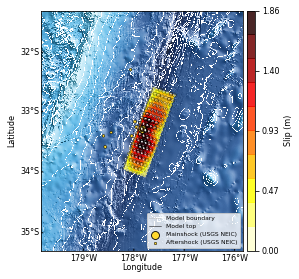

In [606]:
#lonmin=116.5; lonmax=125.8; latmin=-6.1; latmax=3.5
elat, elon = -33.294, -177.838
elon = 360 + elon
lonmin=elon-2; lonmax=elon+2; latmin=elat-2; latmax=elat+2
#lonmin=-185; lonmax=-170; latmin=elat-10; latmax=elat+10
#lonmin=172; lonmax=192; latmin=elat-10; latmax=elat+10
#lonmin=160; lonmax=180; latmin=elat-10; latmax=elat+10
print(lonmin, lonmax, latmin, latmax)
m=Basemap(llcrnrlon=lonmin,llcrnrlat=latmin,urcrnrlon=lonmax,urcrnrlat=latmax,\
          rsphere=(6378137.00,6356752.3142),resolution='i',projection='merc')
x, y=m([lonmin, lonmax], [latmin, latmax])
aspect=max(x)/max(y)
mapwidth=0.5; mapheight=mapwidth/aspect
fig=plt.figure(figsize=figsize)
ax=fig.add_axes([0.1, 0.1, mapwidth, mapheight])
axp=ax.get_position()

'''
lonmin=elon-10; lonmax=elon+10; latmin=elat-10; latmax=elat+10
lonmin=172.162; lonmax = 192.162
#lonmin=160; lonmax=180; latmin=elat-10; latmax=elat+10
print(lonmin, lonmax, latmin, latmax)
m=Basemap(llcrnrlon=lonmin,llcrnrlat=latmin,urcrnrlon=lonmax,urcrnrlat=latmax,\
          rsphere=(6378137.00,6356752.3142),resolution='i',projection='merc')

'''

m.drawparallels(np.arange(-80.,81.,1),labels=[1,0,0,0], fontsize=initfontsize, \
            dashes=(2,10000), color='k')        
m.drawmeridians(np.arange(-180.,181.,1),labels=[0,0,0,1], fontsize=initfontsize, \
            dashes=(2,10000), color='k')
m.drawcoastlines(color='C7', linewidth=0.5, zorder=0)
#m.fillcontinents(color='C7', alpha=0.05)
ax.set_xlabel('Longitude', labelpad=12)
ax.set_ylabel('Latitude', labelpad=25)

    
x, y=m(elon, elat)
ax.scatter(x, y, s=5*np.exp(7.4) / 130, marker='o', facecolor='C5', edgecolor='k', alpha=1, zorder=101, linewidth=0.85, label='Mainshock (USGS NEIC)')

#url = 'https://earthquake.usgs.gov/fdsnws/event/1/query?\
#format=csv&starttime=2020-06-18&endtime=2020-06-20&\
#minmagnitude=3&minlatitude='+str(latmin)+'&minlongitude='+str(lonmin)+'&maxlatitude='+str(latmax)+'&maxlongitude='+str(lonmax)
#filename = './backgroundseism_USGS.txt'
filename = './usgsAftershock.txt'
#print('Loading USGS catalog...')
#urllib.request.urlretrieve(url, filename)
data = np.loadtxt(filename, usecols=(1, 2, 4), skiprows=1, delimiter=',')
mag = data[:,2]
x, y = m(360 + data[:,1], data[:,0])
ax.scatter(x, y, s=5*np.exp(mag) / 130, marker='o', facecolor='C5', edgecolor='k', alpha=1, zorder=120, lw=0.5, label='Aftershock (USGS NEIC)')

'''
x, y=m(360 -177.5763702,-33.45908737)
ax.scatter(x, y, s=5*np.exp(7.4) / 130, marker='o', facecolor='C3', edgecolor='k', alpha=1, zorder=101, linewidth=0.85, label='Mainshock (GeoNet GNS Science))')

filename = './gnsAftershock.txt'
#print('Loading USGS catalog...')
#urllib.request.urlretrieve(url, filename)
data = np.loadtxt(filename, usecols=(4, 5, 6), skiprows=1, delimiter=',')
mag = data[:,2]
x, y = m(360 + data[:,0], data[:,1])
ax.scatter(x, y, s=5*np.exp(mag) / 130, marker='o', facecolor='C3', edgecolor='k', alpha=1, zorder=120, lw=0.5, label='Aftershock (GeoNet GNS Science))')

'''
'''
cmap=plt.get_cmap('RdYlBu')
#mecalist=np.loadtxt('gcmt_psmeca.txt', usecols=(0,1,2,3,4,5,6,7,8,9))
mecalist=np.loadtxt('SPUD_PSMECA_bundle_2020-06-21T18.59.30.txt', usecols=(0,1,2,3,4,5,6,7,8,9))
#mecalist=np.loadtxt('SPUD_PSMECA_bundle_2020-06-20T22.27.06.txt', usecols=(0,1,2,3,4,5,6,7,8,9))
for data in mecalist:
    lon, lat, mrr, mtt, mpp, mrt, mrp, mtp = data[0],data[1],data[3],data[4],data[5],data[6],data[7],data[8]
    power=data[9]
    depth=data[2]
    if lon < 0: 
        lon = 360 + lon
    x, y = m(lon, lat)
    x0, y0=x, y
    ax = plt.gca()
    focmecs=[mrr, mtt, mpp, mrt, mrp, mtp]
    color=cmap(depth/350)
    try:
        b = beach(focmecs, xy=(x0, y0), width=1200 * np.power(10, power/27), linewidth=0.2, facecolor='k', edgecolor='C7')
        b.set_zorder(110); b.set_alpha(1); b.set_clip_on(True)
        ax.add_collection(b)
    except ValueError:
        print(data)

mecalist=np.loadtxt('gcmt_main_after.txt', usecols=(0,1,2,3,4,5,6,7,8,9))
#mecalist=np.loadtxt('SPUD_PSMECA_bundle_2020-06-20T22.27.06.txt', usecols=(0,1,2,3,4,5,6,7,8,9))
for data in mecalist:
    lon, lat, mrr, mtt, mpp, mrt, mrp, mtp = data[0],data[1],data[3],data[4],data[5],data[6],data[7],data[8]
    power=data[9]
    depth=data[2]
    if lon < 0: 
        lon = 360 + lon
    x, y = m(lon, lat)
    x0, y0=x, y
    ax = plt.gca()
    focmecs=[mrr, mtt, mpp, mrt, mrp, mtp]
    color=cmap(depth/350)
    try:
        b = beach(focmecs, xy=(x0, y0), width=1200 * np.power(10, power/27), linewidth=0.2, facecolor='r', edgecolor='C7')
        b.set_zorder(110); b.set_alpha(1); b.set_clip_on(True)
        ax.add_collection(b)
    except ValueError:
        print(data)
'''
import matplotlib.image as mpimg
# the shaded topo/bathy image is made by GMT 
#   because matplotlib's imshow may not cooperate with map projection
# $ bash plotTopoBathyGMT.sh
img = mpimg.imread('plotTopoBathyGMTcloseUP.png') 
topoimg = ax.imshow(img, zorder=-1)
x, y=m([lonmin, lonmax], [latmin, latmax])
extent=(min(x),max(x),min(y),max(y))
topoimg.set_extent(extent)
topoimg.set_alpha(.95)


#ax.plot([], [], color='k', lw=0.5, zorder=0, linestyle='--', label='Plate boundary (Bird, 2003)')
#cmap=plt.get_cmap('RdYlBu_r')
#ax.plot([], [], color=cmap(255), lw=0.2, label='Slab2 (Hayes, 2018)')


model=np.loadtxt('modellist.txt', dtype=int, usecols=0)
j = 1 # optimal model
print(str(model[j]))
data=np.loadtxt('model_'+str(model[j])+'/FFM_DCpreferred.txt', skiprows=1)
lon, lat, slip, strike, dip, rake=360+data[:,2], data[:,3],data[:,1], data[:,7], data[:,8],data[:,9]
xloc, yloc = data[:,10], data[:,11]
data=np.loadtxt('model_'+str(model[j])+'/knot_value_'+str(model[j])+'.dat_rim', usecols=(2, 3))
limlon, limlat, limlontop, limlattop=360+data[:,1], data[:,0], 360+data[2:4,1], data[2:4,0]

cmap=plt.get_cmap('hot_r')

x, y=m(limlon, limlat)
ax.plot(x, y, color='C7', zorder=50, lw=0.5, solid_joinstyle='miter', label='Model boundary')
x, y=m(limlontop, limlattop)
ax.plot(x, y, color='k', zorder=50, lw=0.5, label='Model top')

xi=np.linspace(lon.min(), lon.max(), 1000)
yi=np.linspace(lat.min(), lat.max(), 1000)
X,Y= np.meshgrid(xi,yi)
X, Y=m(X, Y)
m_lon, m_lat = m(*(lon, lat))
resampled=griddata((m_lon, m_lat), slip, (X, Y),'linear')
interval = np.linspace(0, max(slip), 11)
sc=ax.contourf(X, Y, resampled, interval, cmap=cmap, vmin=0, vmax=max(slip), zorder=10, alpha=0.85)

ax = plt.gca()
x, y = m(lon, lat)
for i in range(len(strike)):
    focmecs=[strike[i], dip[i], rake[i]]
    color=cmap(slip[i]/max(slip))
    b = beach(focmecs, xy=(x[i], y[i]), width=8000, linewidth=0.3, facecolor=color, edgecolor='k', \
              bgcolor='w')
    b.set_zorder(1000); b.set_alpha(slip[i]/max(slip)); b.set_clip_on(False)
    ax.add_collection(b)


x, y=m(elon, elat)
ax.scatter(x, y, s=80, marker='*', facecolor='none', edgecolor='k', alpha=0.8, zorder=101, lw=1)

'''
x0, y0=m(elon, elat)
for dis in [200*1e3, -200*1e3]:
    g=geod.Direct(elat, elon, 20, dis)
    x1, y1 = m(360+g['lon2'], g['lat2'])
    ax.plot([x0, x1], [y0, y1], lw=1, zorder=10000)
'''
plt.legend(loc='lower right', fontsize=6).set_zorder(1000)


cax=fig.add_axes([axp.x1+0.01, axp.y0, 0.02, axp.y1-axp.y0])
cbar=plt.colorbar(sc, cax=cax, ticks=np.linspace(0, max(slip), 5), format='%.2f', label='Slip (m)')


'''
ax.scatter([], [], s=1, facecolor='#003f59', alpha=1, edgecolor='none', 
           label=r'$M_{\mathrm{W}}$ ≥ 3.0; 1970-02-15/2020-03-25 (USGS NEIC)')
ax.scatter([], [], s=20, marker='*', facecolor='none', edgecolor='k', linewidth=0.5, alpha=0.8, zorder=101, 
           label='Epicenter (USGS NEIC)')
ax.plot([], [], linewidth=0.2, label='Slab2.0', color='C3')
ax.plot([], [], color='k', lw=0.5, zorder=0, linestyle='--', label='Plate boundaries (Bird, 2003)')
ax.scatter([], [], s=1, facecolor='none', edgecolor='none', label=r'$M_{\mathrm{W}}$ ≥ 6.0; 1976-01-01/2020-03-25 (GCMT)')
plt.legend(loc=[0.015, 0.015*aspect], fontsize=4)

#################### color bar
cax=fig.add_axes([axp.x1+0.01, axp.y0, 0.015, (axp.y1-axp.y0)*0.5])
#cbar=plt.colorbar(cstopo, cax=cax, ticks=np.linspace(-4000, 4000, 5), label='Bathymetry/Topography (m)')
cbar=plt.colorbar(sc, cax=cax, label='Depth (km)')

#dummy beachball for legend
bax=fig.add_axes([axp.x0+0.014, axp.y0+0.012, 0.015, 0.015])
b = beach(focmecs, xy=(0.5, 0.5), width=0.8, linewidth=0.3, facecolor='k', edgecolor='C7')
b.set_zorder(100); b.set_alpha(1); b.set_clip_on(True)
bax.add_collection(b)
bax.patch.set_alpha(0)
bax.set_axis_off()
'''

#plt.savefig('pubFigure/figure1.pdf', bbox_inches='tight', pad_inches=0.1)
plt.savefig('mapSlip_'+str(model[j])+'.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

1
3
5
7
9
11
13
15
17
19
21
23
25


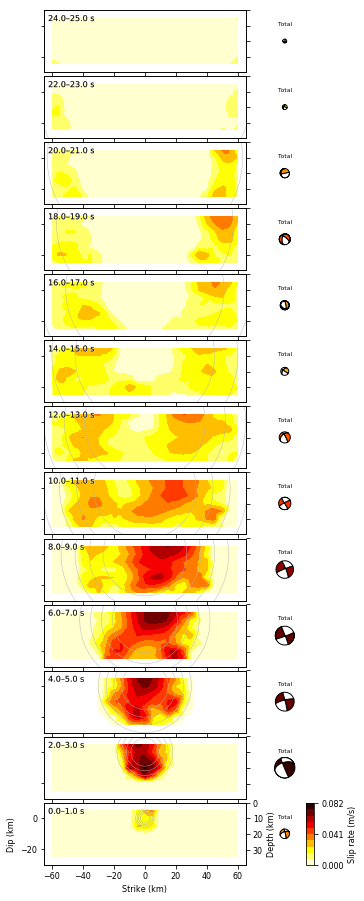

In [530]:
model=np.loadtxt('modellist.txt', dtype=int, usecols=0)
for j in np.arange(0, 1, 1):
    maxsliprateall = np.loadtxt('model_'+str(model[j])+'/snap_1sec_201.txt', usecols=8, skiprows=1)[0]
    h0, model_dip, model_icmn, model_str=load_setting_fort40('model_'+str(model[j])+'/fort.40')
    if model_icmn == 2.0:
        flag = 'Fixed'
    else:
        flag = 'Non-fixed'
    note_model='Model plane (Strike; '+str(model_str)+', Dip; '+str(model_dip)+')'+', '+flag


    data = np.loadtxt('model_'+str(model[j])+'/tw_mec.dat')
    snap_t, str_total, dip_total, rake_total = data[:,0], data[:,9], data[:,11], data[:,13]
    m1, m2, m3, m4, m5, m6 = data[:,3], data[:,4], data[:,5], data[:,6], data[:,7], data[:,8]

    fig=plt.figure(figsize=(5.6, 5.6))
    for snap in np.arange(1, 26, 2):
        print(snap)
        data=np.loadtxt('model_'+str(model[j])+'/snap_1sec_'+str(200+snap)+'.txt', skiprows=1)
        x, y, dep, avesliprate, maxsliprate=data[:,0], data[:,1], data[:,2], data[:,3], data[:,4]

        mecadata=np.loadtxt('model_'+str(model[j])+'/snap_1sec_meca_'+str(200+snap)+'.txt', skiprows=1)
        str_t, dip_t, rake_t=mecadata[:,9], mecadata[:,11], mecadata[:,13]
        
        xi=np.linspace(min(x)-5, max(x)+5, 100)
        yi=np.linspace(min(y)-5, max(y)+5, 100)
        
        
        #X,Y= np.meshgrid(xi,yi)
        #X, Y=m(X, Y)
        #m_lon, m_lat = m(*(lon, lat))
        #resampled=griddata((m_lon, m_lat), slip, (X, Y),'linear')

        
        X, Y=np.meshgrid(xi, yi)
        zi=griddata((x, y), avesliprate, (X, Y),'linear')
        interval=np.linspace(0, maxsliprateall, 11)
        
        axw=0.5
        axh=(max(yi)-min(yi)) / (max(xi)-min(xi)) * axw
        xloc=0.1
        if snap == 1:
            yloc = 0.1
        elif snap >= 2:
            yloc=axp.y1 + 0.01

        ax=fig.add_axes([xloc,yloc,axw,axh])
        axp=ax.get_position()
        note=str(data[0:1,6][0])+'–'+str(data[0:1,7][0]) + ' s'
        text=fig.text(axp.x0+0.01, axp.y1-0.01, note, va='top', ha='left', size=8)
        text.set_path_effects([path_effects.Stroke(linewidth=0.5, foreground='w'), path_effects.Normal()])
        sc=ax.contourf(X, Y, zi, interval, vmin=0, vmax=maxsliprateall, cmap='hot_r')
        if snap == 30:
            fig.text(axp.x0, axp.y1+0.01, note_model, va='bottom', ha='left', size=8)
        
        if model_icmn == 5:
            cmap=plt.get_cmap('hot_r')
            ax = plt.gca()
            for i in range(len(str_t)):
                focmecs=[str_t[i], dip_t[i], rake_t[i]]
                color=cmap(avesliprate[i]/maxsliprateall)
                b = beach(focmecs, xy=(x[i], y[i]), width=5, linewidth=0.5, facecolor=color, edgecolor='k', bgcolor='w')
                b.set_zorder(1); b.set_alpha(avesliprate[i]/maxsliprateall); b.set_clip_on(False)
                #ax.add_collection(b)
        elif model_icmn == 2:
            for k in np.arange(0, len(str_t), 1):
            #    #a=0.5*np.pi - strike[k]*np.pi/180.0
                a=rake_t[k]*np.pi/180.0
                length=avesliprate[k]/0.5*20
                x1=np.cos(a)*length
                y1=np.sin(a)*length
                ax.arrow(x[k], y[k], x1, y1, linewidth=0.5, head_width=1, head_length=1, overhang=-0.1, \
                         color='C0', clip_on=False, alpha=avesliprate[k]/maxsliprateall)

        for vr in np.arange(3, 7, 1):
            az = np.arange(-np.pi, np.pi, 0.01)
            x = np.cos(az) * data[0:1,7][0] * vr
            y = np.sin(az) * data[0:1,7][0] * vr
            ax.plot(x, y, color='C7', lw=0.5, alpha=0.85)
            if snap == 10:
                if vr == 6:
                    text=ax.text(np.cos(0) * data[0:1,7][0] * vr +1, np.sin(0) * data[0:1,7][0] * vr, \
                                 str(vr)+' km/s', size=8, color='C7')
                    text.set_path_effects([path_effects.Stroke(linewidth=0.5, foreground='w'), path_effects.Normal()])
                else:
                    text=ax.text(np.cos(0) * data[0:1,7][0] * vr +1, np.sin(0) * data[0:1,7][0] * vr, \
                                 str(vr), size=8, color='C7')
                    text.set_path_effects([path_effects.Stroke(linewidth=0.5, foreground='w'), path_effects.Normal()])
                            
        
        ax2 = ax.twinx()
        depmin=h0-np.sin(model_dip*np.pi/180.0)*min(yi)
        depmax=h0-np.sin(model_dip*np.pi/180.0)*max(yi)
        #ax2.set_yticks(np.arange(-5, 40, 10))
        ax2.set_ylim(depmin, depmax)
        if snap == 1:
            ax2.set_ylabel('Depth (km)')
            ax.set_xlabel('Strike (km)')
            ax.set_ylabel('Dip (km)')
            axp0=ax.get_position()
        else:
            ax.set_xticklabels([])
            ax2.set_yticklabels([])
            ax.set_yticklabels([])
        ax.set_xlim(min(xi), max(xi))
        ax.set_ylim(min(yi), max(yi))
        
        axheight = (axp.y1-axp.y0)*0.35
        axwidth = axheight
        axb = fig.add_axes([axp.x1+0.07, axp.y0+(axp.y1-axp.y0-axheight)/2, axwidth, axheight])
        axbp = axb.get_position()
        fig.text(axbp.x0+(axbp.x1-axbp.x0)/2, axbp.y1+0.01, 'Total', size=6, ha='center', va='bottom')
        focmecs=[str_total[snap-1], dip_total[snap-1], rake_total[snap-1]]
        #focmecs=[m1[snap-1], m2[snap-1], m3[snap-1], m4[snap-1], m5[snap-1], m6[snap-1]]
        color=cmap(np.max(avesliprate)/maxsliprateall)
        b = beach(focmecs, xy=(0.5, 0.5), width=np.max(avesliprate)/maxsliprateall, linewidth=1, facecolor=color, edgecolor='k', bgcolor='w')
        b.set_zorder(1); b.set_alpha(1); b.set_clip_on(False)
        axb.add_collection(b)
        axb.set_xticks([])
        axb.set_yticks([])
        axb.spines['top'].set_visible(False)
        axb.spines['right'].set_visible(False)
        axb.spines['bottom'].set_visible(False)
        axb.spines['left'].set_visible(False)

    cax=fig.add_axes([axp0.x1+0.15, axp0.y0, 0.02, axp0.y1-axp0.y0])
    cbar=plt.colorbar(sc, cax=cax, ticks=np.linspace(0, maxsliprateall, 3), \
                      format='%.3f', label='Slip rate (m/s)')

    plt.savefig('snap_'+str(model[j])+'.png', bbox_inches='tight', pad_inches=0.1)
    plt.show()

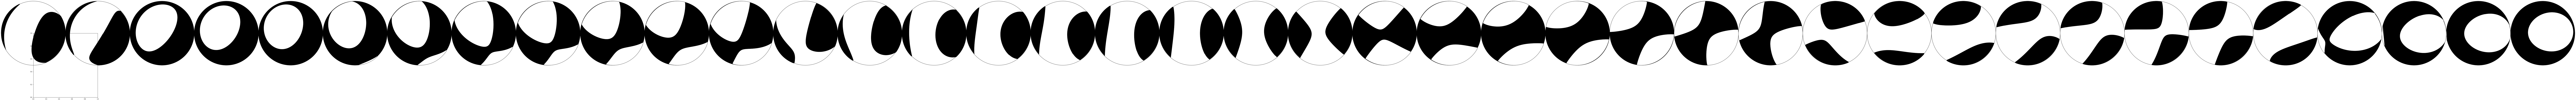

In [546]:
fig=plt.figure(figsize=figsize)
ax=fig.add_axes([0, 0, 1, 1])
cmap=plt.get_cmap('Spectral_r')
ax = plt.gca()

data = np.loadtxt('model_200622084419/tw_mec.dat')
t, str_t, dip_t, rake_t = data[:,0], data[:,9], data[:,11], data[:,13]
m1, m2, m3, m4, m5, m6 = data[:,3], data[:,4], data[:,5], data[:,6], data[:,7], data[:,8]

for i in range(len(str_t)):
    focmecs=[str_t[i], dip_t[i], rake_t[i]]
    focmecs=[m1[i], m2[i], m3[i], m4[i], m5[i], m6[i]]
    color=cmap(avesliprate[i]/maxsliprateall)
    b = beach(focmecs, xy=(i, 1), width=1, linewidth=1, facecolor='k', edgecolor='k', bgcolor='w')
    b.set_zorder(1); b.set_alpha(1); b.set_clip_on(False)
    ax.add_collection(b)


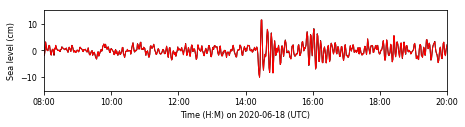

In [754]:
import obspy
from obspy.core.utcdatetime import UTCDateTime
import pandas as pd
import matplotlib.dates as mdates
from scipy import signal

from scipy.signal import butter, lfilter
from scipy.signal import freqs
from scipy.signal import butter, lfilter, sosfilt, zpk2sos

def butter_lowpass(cutOff, fs, order=5):
    nyq = 0.5 * fs
    normalCutoff = cutOff / nyq
    b, a = butter(order, normalCutoff, btype='low', analog = True)
    return b, a

def butter_lowpass_filter(data, cutOff, fs, order=4):
    b, a = butter_lowpass(cutOff, fs, order=order)
    y = lfilter(b, a, data)
    return y
from scipy.signal import (cheb2ord, cheby2, convolve, get_window, iirfilter,
                          remez)

def highpass(data, freq, df, corners=4, zerophase=False):
    """
    Butterworth-Highpass Filter.

    Filter data removing data below certain frequency ``freq`` using
    ``corners`` corners.
    The filter uses :func:`scipy.signal.iirfilter` (for design)
    and :func:`scipy.signal.sosfilt` (for applying the filter).

    :type data: numpy.ndarray
    :param data: Data to filter.
    :param freq: Filter corner frequency.
    :param df: Sampling rate in Hz.
    :param corners: Filter corners / order.
    :param zerophase: If True, apply filter once forwards and once backwards.
        This results in twice the number of corners but zero phase shift in
        the resulting filtered trace.
    :return: Filtered data.
    """
    fe = 0.5 * df
    f = freq / fe
    # raise for some bad scenarios
    if f > 1:
        msg = "Selected corner frequency is above Nyquist."
        raise ValueError(msg)
    z, p, k = iirfilter(corners, f, btype='highpass', ftype='butter',
                        output='zpk')
    sos = zpk2sos(z, p, k)
    if zerophase:
        firstpass = sosfilt(sos, data)
        return sosfilt(sos, firstpass[::-1])[::-1]
    else:
        return sosfilt(sos, data)
    
def lowpass(data, freq, df, corners=4, zerophase=False):
    """
    Butterworth-Lowpass Filter.

    Filter data removing data over certain frequency ``freq`` using ``corners``
    corners.
    The filter uses :func:`scipy.signal.iirfilter` (for design)
    and :func:`scipy.signal.sosfilt` (for applying the filter).

    :type data: numpy.ndarray
    :param data: Data to filter.
    :param freq: Filter corner frequency.
    :param df: Sampling rate in Hz.
    :param corners: Filter corners / order.
    :param zerophase: If True, apply filter once forwards and once backwards.
        This results in twice the number of corners but zero phase shift in
        the resulting filtered trace.
    :return: Filtered data.
    """
    fe = 0.5 * df
    f = freq / fe
    # raise for some bad scenarios
    if f > 1:
        f = 1.0
        msg = "Selected corner frequency is above Nyquist. " + \
              "Setting Nyquist as high corner."
        warnings.warn(msg)
    z, p, k = iirfilter(corners, f, btype='lowpass', ftype='butter',
                        output='zpk')
    sos = zpk2sos(z, p, k)
    if zerophase:
        firstpass = sosfilt(sos, data)
        return sosfilt(sos, firstpass[::-1])[::-1]
    else:
        return sosfilt(sos, data)
    
def bandpass(data, freqmin, freqmax, df, corners=4, zerophase=False):
    """
    Butterworth-Bandpass Filter.
    Filter data from ``freqmin`` to ``freqmax`` using ``corners``
    corners.
    The filter uses :func:`scipy.signal.iirfilter` (for design)
    and :func:`scipy.signal.sosfilt` (for applying the filter).
    :type data: numpy.ndarray
    :param data: Data to filter.
    :param freqmin: Pass band low corner frequency.
    :param freqmax: Pass band high corner frequency.
    :param df: Sampling rate in Hz.
    :param corners: Filter corners / order.
    :param zerophase: If True, apply filter once forwards and once backwards.
        This results in twice the filter order but zero phase shift in
        the resulting filtered trace.
    :return: Filtered data.
    """
    from scipy.signal import iirfilter 
    fe = 0.5 * df
    low = freqmin / fe
    high = freqmax / fe
    # raise for some bad scenarios
    if high - 1.0 > -1e-6:
        msg = ("Selected high corner frequency ({}) of bandpass is at or "
               "above Nyquist ({}). Applying a high-pass instead.").format(
            freqmax, fe)
        warnings.warn(msg)
        return highpass(data, freq=freqmin, df=df, corners=corners,
                        zerophase=zerophase)
    if low > 1:
        msg = "Selected low corner frequency is above Nyquist."
        raise ValueError(msg)
    z, p, k = iirfilter(corners, [low, high], btype='band',
                        ftype='butter', output='zpk')
    sos = zpk2sos(z, p, k)
    if zerophase:
        firstpass = sosfilt(sos, data)
        return sosfilt(sos, firstpass[::-1])[::-1]
    else:
        return sosfilt(sos, data)

# http://www.ioc-sealevelmonitoring.org/station.php?code=gbit
data=np.loadtxt('ioc_gauge_GBIT.txt', dtype=str, skiprows=2)
time = [ UTCDateTime(data[i,0]+'T'+data[i,1]) for i in range(len(data)) ]
time_d = [ pd.to_datetime(str(time[i])) for i in range(len(data)) ]
gauge = [ float(data[i,2]) for i in range(len(data)) ]

fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 0.2])
time_d = np.array(time_d)
gauge = np.array(gauge)
#ax.plot(time_d, gauge)
offset = 5.92 
gauge = gauge - offset
#ax.plot(time_d, gauge)

# samp. freq. sample / 60 s
fs = 1/60
cutOff = 1/10000
order=4

#y = butter_lowpass_filter(gauge, cutOff, fs, order)
freqmin, freqmax, df = 1/10000, 1/121, fs
#ax.plot(time_d, y*1e2, color='r', lw=1)

y = bandpass(gauge, freqmin, freqmax, df)
ax.plot(time_d, y*1e2, color='k', lw=1)
#ax.axhline(12)

import obspy.signal
y = highpass(gauge, 1/10000, df)
ax.plot(time_d, y*1e2, color='r', lw=1)

#ax.axvline(pd.to_datetime(str(UTCDateTime('2020-06-18T12:49:53'))))

major_ticks = [i * 2 for i in range(12)]
ax.xaxis.set_major_locator(mdates.HourLocator(major_ticks))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.set_xlim(pd.to_datetime('2020-06-18 08:00:00'), pd.to_datetime('2020-06-18 20:00:00'))
ax.set_xlabel('Time (H:M) on 2020-06-18 (UTC)')
ax.set_ylabel('Sea level (cm)')
ax.set_ylim([-15, 15])
plt.show()

In [79]:
#activefault_src = shapefile.Reader('/Users/ryo/Downloads/gem-global-active-faults/shapefile/gem_active_faults.shp')
sf = shapefile.Reader('/Users/ryo/Downloads/gem-global-active-faults/shapefile/gem_active_faults.shp')
fields = sf.fields[1:] 
field_names = [field[0] for field in fields] 
for r in sf.shapeRecords():  
    atr = dict(zip(field_names, r.record))
    if atr['catalog_na'] == 'EMME':
        print(atr)
            
        x = [i[0] for i in r.shape.points[:]]
        y = [i[1] for i in r.shape.points[:]]
        print(x, y)

{'WKT_GEOMET': '', 'accuracy': '', 'activity_c': '', 'average_di': '(60.0,50.0,70.0)', 'average_ra': '(-85,-100.0,-70.0)', 'catalog_id': 'ME_AF37', 'catalog_na': 'EMME', 'dip_dir': '', 'downthrown': '', 'downthro_1': '', 'epistemic_': '3', 'exposure_q': '', 'fs_name': '', 'is_active': '', 'last_movem': '', 'lower_seis': '(26.0,,)', 'name': '', 'net_slip_r': '(3.0,2.0,4.0)', 'notes': '', 'ogc_fid': '', 'reference': '', 'shortening': '', 'slip_type': 'Normal', 'strike_sli': '', 'upper_seis': '(0.0,,)', 'vert_sep_r': ''}
[71.358293, 71.120977, 70.885821, 70.751717, 70.83409, 70.847856, 70.738398, 70.314917, 69.517884] [38.268548, 38.007058, 37.606235, 37.104214, 36.909478, 36.577452, 36.348598, 35.841118, 35.30739]
{'WKT_GEOMET': '', 'accuracy': '', 'activity_c': '', 'average_di': '(70.0,60.0,80.0)', 'average_ra': '(-45,-60.0,-30.0)', 'catalog_id': 'ME_AS38', 'catalog_na': 'EMME', 'dip_dir': '', 'downthrown': '', 'downthro_1': '', 'epistemic_': '3', 'exposure_q': '', 'fs_name': '', 'is_ac

[-121.822899999999, -122.0388]

## Figure 2

In [3]:
def getModelBound(slat, slon, dl, dk, stk, dip, m):
    rblat, rblon = slat[np.argmin(slat)], slon[np.argmin(slat)]
    rtlat, rtlon = slat[np.argmax(slon)], slon[np.argmax(slon)]
    ltlat, ltlon = slat[np.argmax(slat)], slon[np.argmax(slat)]
    lblat, lblon = slat[np.argmin(slon)], slon[np.argmin(slon)]

    shiftk = dk/2 * np.cos(np.deg2rad(dip))
    shiftl = dl/2

    tmp0 = geod.Direct(rblat, rblon, stk-90, shiftk*1e3)
    tmp1 = geod.Direct(tmp0['lat2'], tmp0['lon2'], stk, shiftl*1e3)
    x, y = m(tmp1['lon2'], tmp1['lat2'])
    rbx, rby = x, y

    tmp0 = geod.Direct(rtlat, rtlon, stk-90, shiftk*1e3)
    tmp1 = geod.Direct(tmp0['lat2'], tmp0['lon2'], stk-180, shiftl*1e3)
    x, y = m(tmp1['lon2'], tmp1['lat2'])
    rtx, rty = x, y

    tmp0 = geod.Direct(ltlat, ltlon, stk+90, shiftk*1e3)
    tmp1 = geod.Direct(tmp0['lat2'], tmp0['lon2'], stk-180, shiftl*1e3)
    x, y = m(tmp1['lon2'], tmp1['lat2'])
    ltx, lty = x, y

    tmp0 = geod.Direct(lblat, lblon, stk+90, shiftk*1e3)
    tmp1 = geod.Direct(tmp0['lat2'], tmp0['lon2'], stk, shiftl*1e3)
    x, y = m(tmp1['lon2'], tmp1['lat2'])
    lbx, lby = x, y

    xlist = [lbx, rbx, rtx, ltx, lbx]
    ylist = [lby, rby, rty, lty, lby]
    return xlist, ylist

def getSlipCell(slat, slon, dl, dk, stk, dip, m):
    shiftk = dk/2 * np.cos(np.deg2rad(dip))
    shiftl = dl/2

    tmp0 = geod.Direct(slat, slon, stk-90, shiftk*1e3)
    tmp1 = geod.Direct(tmp0['lat2'], tmp0['lon2'], stk, shiftl*1e3)
    x, y = m(tmp1['lon2'], tmp1['lat2'])
    rbx, rby = x, y

    tmp0 = geod.Direct(slat, slon, stk-90, shiftk*1e3)
    tmp1 = geod.Direct(tmp0['lat2'], tmp0['lon2'], stk-180, shiftl*1e3)
    x, y = m(tmp1['lon2'], tmp1['lat2'])
    rtx, rty = x, y

    tmp0 = geod.Direct(slat, slon, stk+90, shiftk*1e3)
    tmp1 = geod.Direct(tmp0['lat2'], tmp0['lon2'], stk-180, shiftl*1e3)
    x, y = m(tmp1['lon2'], tmp1['lat2'])
    ltx, lty = x, y

    tmp0 = geod.Direct(slat, slon, stk+90, shiftk*1e3)
    tmp1 = geod.Direct(tmp0['lat2'], tmp0['lon2'], stk, shiftl*1e3)
    x, y = m(tmp1['lon2'], tmp1['lat2'])
    lbx, lby = x, y

    xlist = [lbx, rbx, rtx, ltx, lbx]
    ylist = [lby, rby, rty, lty, lby]
    return xlist, ylist

37.0847 41.0847 37.3922 39.3922
200822022922
Loading plate boundary...
`tectonicplates.git` is already cloned.


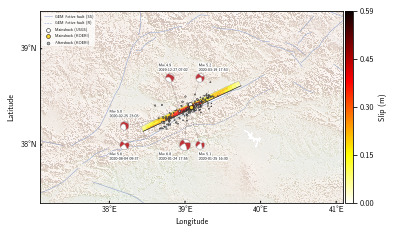

In [4]:
elat, elon = 38.3922, 39.0847 # KOERI
model=np.loadtxt('modellist.txt', dtype=int, usecols=0)
#lonmin=119.4; lonmax=120.4; latmin=-2.1; latmax=0.5
#lonmin=elon-4; lonmax=elon+4; latmin=elat-2; latmax=elat+2
lonmin=elon-2; lonmax=elon+2; latmin=elat-1; latmax=elat+1
print(lonmin, lonmax, latmin, latmax)
m=Basemap(llcrnrlon=lonmin,llcrnrlat=latmin,urcrnrlon=lonmax,urcrnrlat=latmax,\
          rsphere=(6378137.00,6356752.3142),resolution='i',projection='merc')
x, y=m([lonmin, lonmax], [latmin, latmax])
aspect=max(x)/max(y)
mapwidth=0.75; mapheight=mapwidth/aspect
fig=plt.figure(figsize=figsize)
j = 0 # optimal model
print(str(model[j]))
data=np.loadtxt('model_'+str(model[j])+'/FFM_DCpreferred.txt', skiprows=1)
lon, lat, slip, strike, dip, rake=data[:,2], data[:,3],data[:,1], data[:,7], data[:,8],data[:,9]
xloc, yloc = data[:,10], data[:,11]
data=np.loadtxt('model_'+str(model[j])+'/knot_value_'+str(model[j])+'.dat_rim', usecols=(2, 3))
limlon, limlat, limlontop, limlattop=data[:,1], data[:,0], data[2:4,1], data[2:4,0]


cmap=plt.get_cmap('hot_r')

ax=fig.add_axes([0.1, 0.1, mapwidth, mapheight])
axp=ax.get_position()
#m.drawmapboundary(fill_color='#f5f5f5')
#m.fillcontinents(color='none', alpha=0.05, lake_color='w', zorder=10)
m.drawparallels(np.arange(-80.,81.,1),labels=[1,0,0,0], fontsize=initfontsize, \
            dashes=(2,10000), color='k')        
m.drawmeridians(np.arange(-180.,181.,1),labels=[0,0,0,1], fontsize=initfontsize, \
            dashes=(2,10000), color='k')
#m.drawcoastlines(color='C7', linewidth=0.5, zorder=2)
ax.set_xlabel('Longitude', labelpad=15)
ax.set_ylabel('Latitude', labelpad=25)

#x, y=m(limlon, limlat)
#ax.plot(x, y, color='C7', zorder=50, lw=0.5, solid_joinstyle='miter')
#x, y=m(limlontop, limlattop)
#ax.plot(x, y, color='k', zorder=50, lw=0.5)

#x,y=m(lon,lat)
#ax.scatter(x,y,s=1,color='cyan',zorder=1000)

xi=np.linspace(lon.min(), lon.max(), 1000)
yi=np.linspace(lat.min(), lat.max(), 1000)
X,Y= np.meshgrid(xi,yi)
X, Y=m(X, Y)
m_lon, m_lat = m(*(lon, lat))
resampled=griddata((m_lon, m_lat), slip, (X, Y),'linear')
interval = np.linspace(0, max(slip), 11)
#sc=ax.contourf(X, Y, resampled, interval, cmap=cmap, vmin=0, vmax=max(slip), zorder=10, alpha=0.85)

dl, dk = 5, 5
stk, dip = 245, 80
for i in range(len(lat)):
    xslipcell, yslipcell = getSlipCell(lat[i], lon[i], dl, dk, stk, dip, m)
    ax.fill(xslipcell, yslipcell, facecolor=cmap(slip[i]/max(slip)), zorder=10, edgecolor='none')

xboundlist, yboundlist = getModelBound(lat, lon, dl, dk, stk, dip, m)
ax.plot(xboundlist, yboundlist, zorder=11, lw=0.5, color='C7', solid_capstyle='round')
# [lbx, rbx, rtx, ltx, lbx]
ax.plot([xboundlist[1], xboundlist[2]], [yboundlist[1], yboundlist[2]], color='k', zorder=11, lw=0.5)


x, y=m(39.061, 38.431)
#ax.scatter(x, y, s=50, marker='*', facecolor='none', edgecolor='k', alpha=1, zorder=101, lw=0.5, label='USGS')
ax.scatter(x, y, s=15, marker='o', facecolor='w', edgecolor='k', alpha=1, zorder=101, lw=0.5, label='Mainshock (USGS)')

#x, y = m(39.1, 38.3)
#ax.scatter(x, y, s=80, marker='*', facecolor='none', edgecolor=red, alpha=0.8, zorder=101, lw=1, label='USGS (used for FFM)')

# 000071 20200124175510 2020.01.24 17:55:10.61 38.3922 39.0847 005.0 6.7 0.0 6.7 6.5 0.0 0.0 Ke KALABA-SIVRICE (ELAZIG) [North West 2.5 km]
x, y = m(elon, elat)
ax.scatter(x, y, s=15, marker='o', facecolor='C5', edgecolor='k', alpha=1, zorder=101, lw=0.5, label='Mainshock (KOERI)')

# http://www.koeri.boun.edu.tr/sismo/2/earthquake-catalog/
data = np.loadtxt('20200123_20200131_3_9.0_57_985.txt', usecols=(4,5,7), skiprows=1)
x, y = m(data[:,1], data[:,0])
ax.scatter(x, y, s=np.exp(data[:,2])/20, marker='o', facecolor='C7', edgecolor='k', alpha=1, zorder=100, lw=0.35, label='Aftershock (KOERI)')

print('Loading plate boundary...')
try:
    git.Git('./').clone('https://github.com/fraxen/tectonicplates.git')
except git.GitCommandError as e: 
    print('`tectonicplates.git` is already cloned.')
src = shapefile.Reader('tectonicplates/PB2002_boundaries.shp')
for tmp in src.shapeRecords():
    x = [i[0] for i in tmp.shape.points[:]]
    y = [i[1] for i in tmp.shape.points[:]]
    x, y = m(x, y)
    #ax.plot(x, y, color='k', lw=0.5, zorder=0, alpha=0.5, linestyle='--')

#print('Loading plate boundary...')
#try:
#    git.Git('./').clone('https://github.com/cossatot/gem-global-active-faults')
#except git.GitCommandError as e: 
#    print('`tectonicplates.git` is already cloned.')
sf = shapefile.Reader('/Users/ryo/Downloads/gem-global-active-faults/shapefile/gem_active_faults.shp')
fields = sf.fields[1:] 
field_names = [field[0] for field in fields] 
for r in sf.shapeRecords():  
    atr = dict(zip(field_names, r.record))
    if atr['catalog_na'] == 'EMME':
        if atr['slip_type'] == 'Sinistral' or atr['slip_type'] == 'Dextral':
            x = [i[0] for i in r.shape.points[:]]
            y = [i[1] for i in r.shape.points[:]]
            x, y = m(x, y)
            ax.plot(x, y, color='C2', lw=0.5, zorder=0, alpha=1, linestyle='-')
        elif atr['slip_type'] == 'Reverse':
            x = [i[0] for i in r.shape.points[:]]
            y = [i[1] for i in r.shape.points[:]]
            x, y = m(x, y)
            ax.plot(x, y, color='C2', lw=0.5, zorder=0, alpha=1, linestyle='--')

ax.plot([], [], color='C2', lw=0.5, zorder=0, alpha=1, linestyle='-', label='GEM Active fault (SS)')
ax.plot([], [], color='C2', lw=0.5, zorder=0, alpha=1, linestyle='--', label='GEM Active fault (R)')
ax.legend(loc='upper left', fontsize=4)
#ax.legend(prop={'size':initfontsize-2}, loc='upper right')

#data=np.loadtxt('aftershockUSGS.txt', delimiter=',', skiprows=1, usecols=(1,2,3,4))
#lon, lat, depth, mag=data[:,1], data[:,0], data[:,2], data[:,3]
#x, y=m(lon, lat)
#ax.scatter(x, y, s=1, facecolor='#003f59', alpha=0.5, edgecolor='none')
#ax.scatter(x, y, s=mag*1.5, edgecolor='k', facecolor='C2', zorder=100, linewidth=0.5)

#m.etopo(zorder=-1, alpha=0.5)


#mecalist=np.loadtxt('gcmt_main_after.txt', usecols=(0,1,2,3,4,5,6,7,8,9))
mecalist=np.loadtxt('SPUD_PSMECA_bundle_2020-08-22T21.51.28.txt', usecols=(0,1,2,3,4,5,6,7,8,9))
maplatlist = [38, 38]
maplonlist = [39, 39.2]
taglist = ['Mw 6.8\n2020-01-24 17:55', 'Mw 5.1\n2020-01-25 16:30']
taglatlist = [37.925, 37.925]
taglonlist = [38.65, 39.18]
for k, data in enumerate(mecalist):
    lon, lat, mrr, mtt, mpp, mrt, mrp, mtp = data[0],data[1],data[3],data[4],data[5],data[6],data[7],data[8]
    power=data[9]
    depth=data[2]
    if lon < 0: 
        lon = 360 + lon
    x, y = m(maplonlist[k], maplatlist[k])
    x1, y1 = m(lon, lat)
    ax.scatter(x1, y1, s=0.2, facecolor='k', edgecolor='none', zorder=10000)
    x0, y0=x, y
    ax.plot([x0, x1], [y0, y1], lw=0.1, color='k', zorder=100)
    ax = plt.gca()
    focmecs=[mrr, mtt, mpp, mrt, mrp, mtp]
    color=cmap(depth/350)
    try:
        b = beach(focmecs, xy=(x0, y0), width=1800 * np.power(10, power/27), linewidth=0.5, facecolor=red, edgecolor='C7')
        b.set_zorder(110); b.set_alpha(1); b.set_clip_on(True)
        ax.add_collection(b)
    except ValueError:
        print(data)
    x2, y2 = m(taglonlist[k], taglatlist[k])
    text=ax.text(x2, y2, taglist[k], size=4, va='top', ha='left')
    text.set_path_effects([path_effects.Stroke(linewidth=2, foreground='w', alpha=1), path_effects.Normal()])

mecalist=np.loadtxt('SPUD_PSMECA_bundle_2020-08-22T22.32.09.txt', usecols=(0,1,2,3,4,5,6,7,8,9))
maplatlist = [38.7, 38.2, 38.7, 38.0]
maplonlist = [38.8, 38.2, 39.2, 38.2]
taglist = ['Mw 4.9\n2019-12-27 07:02', 'Mw 5.0\n2020-02-25 23:03', 'Mw 5.2\n2020-03-19 17:53', 'Mw 5.6\n2020-08-04 09:37']
#taglatlist = [37.925, 37.925]
#taglonlist = [38.65, 39.17]
taglatlist = [38.85, 38.37, 38.85, 37.925]
taglonlist = [38.65, 38., 39.18, 38.]
for k, data in enumerate(mecalist):
    lon, lat, mrr, mtt, mpp, mrt, mrp, mtp = data[0],data[1],data[3],data[4],data[5],data[6],data[7],data[8]
    power=data[9]
    depth=data[2]
    if lon < 0: 
        lon = 360 + lon
    x, y = m(maplonlist[k], maplatlist[k])
    x1, y1 = m(lon, lat)
    ax.scatter(x1, y1, s=0.2, facecolor='k', edgecolor='none', zorder=10000)
    x0, y0=x, y
    ax.plot([x0, x1], [y0, y1], lw=0.1, color='k', zorder=100)
    ax = plt.gca()
    focmecs=[mrr, mtt, mpp, mrt, mrp, mtp]
    color=cmap(depth/350)
    try:
        b = beach(focmecs, xy=(x0, y0), width=1800 * np.power(10, power/27), linewidth=0.5, facecolor=red, edgecolor='C7')
        b.set_zorder(110); b.set_alpha(1); b.set_clip_on(True)
        ax.add_collection(b)
    except ValueError:
        print(data)
    x2, y2 = m(taglonlist[k], taglatlist[k])
    text=ax.text(x2, y2, taglist[k], size=4, va='top', ha='left')
    text.set_path_effects([path_effects.Stroke(linewidth=2, foreground='w', alpha=1), path_effects.Normal()])

        
#'''
import matplotlib.image as mpimg
# the shaded topo/bathy image is made by GMT 
#   because matplotlib's imshow may not cooperate with map projection
# $ bash plotTopoBathyGMT.sh
#img = mpimg.imread('/Volumes/WDMyPassport4TB/SRTM/plotTopoBathyGMT.png') 
img = mpimg.imread('/Volumes/WDMyPassport4TB/SRTM/plotTopoBathyGMTclose.png') 
topoimg = ax.imshow(img, zorder=-1)
x, y=m([lonmin, lonmax], [latmin, latmax])
extent=(min(x),max(x),min(y),max(y))
topoimg.set_extent(extent)
topoimg.set_alpha(.3)

#m.fillcontinents(color='none', alpha=1, lake_color='w', zorder=2)


#'''
cax=fig.add_axes([axp.x1+0.005, axp.y0, 0.02, axp.y1-axp.y0])
#cbar=plt.colorbar(sc, cax=cax, ticks=np.linspace(0, max(slip), 5), format='%.2f', label='Slip (m)')

norm=mpl.colors.Normalize(vmin=0, vmax=max(slip))
cb=mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, ticks=np.linspace(0, max(slip), 5), format='%.2f', label='Slip (m)')

plt.savefig('map_'+str(model[j])+'close.pdf', bbox_inches='tight', pad_inches=0.1)
#plt.savefig('map_'+str(model[j])+'.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

## Figure 3

200822022922


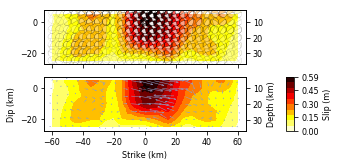

In [141]:
model=np.loadtxt('modellist.txt', dtype=int, usecols=0)
cmap=plt.get_cmap('hot_r')
j = 0
data=np.loadtxt('model_'+str(model[j])+'/FFM_DCpreferred.txt', skiprows=1)
print(str(model[j]))
x, y, slip, strike, dip, rake=data[:,10], data[:,11],data[:,1], data[:,7], data[:,8],data[:,9]

xi=np.linspace(min(x)-5, max(x)+5, 100)
yi=np.linspace(min(y)-2.5, max(y)+2.5, 100)
X, Y=np.meshgrid(xi, yi)
zi=griddata((x, y), slip, (X, Y),'linear')
maxslip = max(slip)
interval=np.linspace(0, maxslip, 11)

fig=plt.figure(figsize=figsize)
axw=0.5
axh=(abs(max(yi)-min(yi))) / (abs(max(xi)-min(xi))) * axw

for panel in [0, 1]:
    ax=fig.add_axes([0.1,0.1 - (axh + 0.03)*panel,axw,axh])
    axp=ax.get_position()

    h0, model_dip, model_icmn, model_str=load_setting_fort40('model_'+str(model[j])+'/fort.40')

    sc=ax.contourf(X, Y, zi, interval, vmin=0, vmax=maxslip, cmap='hot_r')
    #interval_50=np.linspace(0, maxslip, 3)
    #ax.contour(X, Y, zi, interval_50, colors='C7', linewidths=1, linestyles='--')

    if model_icmn == 5:
        ax = plt.gca()
        if panel == 0:
            for i in range(len(strike)):
                focmecs=[strike[i], dip[i], rake[i]]
                color=cmap(slip[i]/max(slip))
                b = beach(focmecs, xy=(x[i], y[i]), width=5, linewidth=0.3, facecolor=color, edgecolor='k', \
                          bgcolor='w')
                b.set_zorder(1); b.set_alpha(slip[i]/max(slip)); b.set_clip_on(False)
                ax.add_collection(b)
        elif panel == 1:
            for i in np.arange(0, len(strike), 1):
                a=rake[i]*np.pi/180.0
                length=slip[i] / maxslip * 15.0
                x1=np.cos(a)*length
                y1=np.sin(a)*length
                spoint = [x[i], y[i]]
                epoint = [x1+x[i], y1+y[i]]
                arrowstyle = ArrowStyle('->', head_length=0.4 * slip[i]/max(slip) * 0.75, head_width=0.2 * slip[i]/max(slip) * 0.5)
                ax.annotate('', xy=epoint, xytext=spoint, 
                            arrowprops=dict(arrowstyle=arrowstyle, color='C2', lw=0.5), annotation_clip=False)

    ax.scatter(0, 0, s=80, marker='*', facecolor='none', edgecolor='k', alpha=0.8, zorder=101, lw=1)
    if panel == 1:
        ax.set_xticks(np.arange(-180, 180, 20))
        ax.set_xlabel('Strike (km)')

    if panel == 0:
        ax.set_xticklabels('')
    ax.set_xlim(min(xi), max(xi))
    ax.set_ylim(min(yi), max(yi))

    ax2 = ax.twinx()
    depmin=h0-np.sin(model_dip*np.pi/180.0)*min(yi)
    depmax=h0-np.sin(model_dip*np.pi/180.0)*max(yi)
    #ax2.set_yticks(np.arange(-5, 40, 10))
    ax2.set_ylim(depmin, depmax)

    if panel == 1:
        ax.set_ylabel('Dip (km)')
        ax2.set_ylabel('Depth (km)')

        cax=fig.add_axes([axp.x1+0.1, axp.y0, 0.02, axp.y1-axp.y0])
        cbar=plt.colorbar(sc, cax=cax, ticks=np.linspace(0, maxslip, 5), format='%.2f', label='Slip (m)')    

plt.savefig('xy_'+str(model[j])+'.png', bbox_inches='tight', pad_inches=0.1)
#plt.savefig('pubFigure/xy_'+str(model[j])+'.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

In [524]:
def faultnormalvec(stk, dip):
    nn = -np.sin(np.deg2rad(stk)) * np.sin(np.deg2rad(dip))
    ne =  np.cos(np.deg2rad(stk)) * np.sin(np.deg2rad(dip))
    nd = -np.cos(np.deg2rad(dip))
    return np.array([ne, nn, nd])
    
def selectplane(modelstk, modeldip, stk0, dip0, rake0, stk1, dip1, rake1):
    vecmodelplane = faultnormalvec(modelstk, modeldip)
    vecplane0 = faultnormalvec(stk0, dip0)
    vecplane1 = faultnormalvec(stk1, dip1)
    tmp0 = np.inner(vecmodelplane, vecplane0)
    tmp1 = np.inner(vecmodelplane, vecplane1)
    if abs(tmp0) > abs(tmp1):
        stk_s = stk0
        dip_s = dip0
        rake_s = rake0
    elif abs(tmp0) < abs(tmp1):
        stk_s = stk1
        dip_s = dip1
        rake_s = rake1
    else:
        stk_s = stk0
        dip_s = dip0        
        rake_s = rake0
        
    return stk_s, dip_s, rake_s


200822022922
10.0 80.0 5.0 245.0
10.0 80.0 5.0 245.0


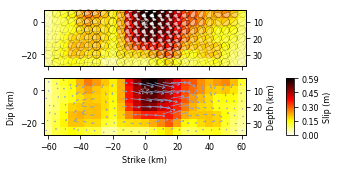

In [492]:
model=np.loadtxt('modellist.txt', dtype=int, usecols=0)
cmap=plt.get_cmap('hot_r')
j = 0

#data=np.loadtxt('model_'+str(model[j])+'/FFM_DCpreferred.txt', skiprows=1)
#print(str(model[j]))
#x, y, slip, strike, dip, rake=data[:,10], data[:,11],data[:,1], data[:,7], data[:,8],data[:,9]

data=np.loadtxt('model_'+str(model[j])+'/FFM_DCall.txt', skiprows=1)
print(str(model[j]))
x, y, slip, stk0, dip0, rake0, stk1, dip1, rake1 = data[:,11], data[:,12],data[:,4], data[:,5], data[:,6],data[:,7], data[:,8], data[:,9],data[:,10]

dx, dy = 5, 5
xi=np.linspace(min(x)-2.5, max(x)+2.5, 100)
yi=np.linspace(min(y)-2.5, max(y)+2.5, 100)

fig=plt.figure(figsize=figsize)
axw=0.5
axh=(abs(max(yi)-min(yi))) / (abs(max(xi)-min(xi))) * axw

cmap = plt.get_cmap('hot_r')
for panel in [0, 1]:
    ax=fig.add_axes([0.1,0.1 - (axh + 0.03)*panel,axw,axh])
    axp=ax.get_position()
    
    for i in np.arange(0, len(slip), 1):
        tmpx, tmpy = x[i], y[i]
        tmpxlist = [tmpx-dx/2, tmpx+dx/2, tmpx+dx/2, tmpx-dx/2, tmpx-dx/2]
        tmpylist = [tmpy-dy/2, tmpy-dy/2, tmpy+dy/2, tmpy+dy/2, tmpy-dy/2]
        ax.fill(tmpxlist, tmpylist, facecolor=cmap(slip[i]/max(slip)), edgecolor='none', zorder=0)

    h0, model_dip, model_icmn, model_str=load_setting_fort40('model_'+str(model[j])+'/fort.40')
    print(h0, model_dip, model_icmn, model_str)
    
    strike, dip, rake = [],[],[]
    for i in range(len(stk0)):
        tmpstr, tmpdip, tmprake = selectplane(model_str, model_dip, stk0[i], dip0[i], rake0[i], stk1[i], dip1[i], rake1[i])
        strike.append(tmpstr)
        dip.append(tmpdip)
        rake.append(tmprake)

    if model_icmn == 5:
        ax = plt.gca()
        if panel == 0:
            for i in range(len(strike)):
                focmecs=[strike[i], dip[i], rake[i]]
                color=cmap(slip[i]/max(slip))
                b = beach(focmecs, xy=(x[i], y[i]), width=5, linewidth=0.3, facecolor=color, edgecolor='k', \
                          bgcolor='w')
                b.set_zorder(1); b.set_alpha(slip[i]/max(slip)); b.set_clip_on(False)
                ax.add_collection(b)
        elif panel == 1:
            for i in np.arange(0, len(strike), 1):
                #a=(-strike[i]+90)*np.pi/180.0
                a=rake[i]*np.pi/180.0
                #a=(dip[i]-180)*np.pi/180
                length=slip[i] / max(slip) * 15.0
                x1=np.cos(a)*length
                y1=np.sin(a)*length
                
                spoint = [x[i], y[i]] # for dip, rake

                #spoint = [x[i]-x1, y[i]-y1] # for strike

                epoint = [x1+x[i], y1+y[i]]
                
                #arrowstyle = ArrowStyle('->', head_length=0.001, head_width=0.001) # for dip
                arrowstyle = ArrowStyle('->', head_length=0.4 * slip[i]/max(slip) * 0.75, head_width=0.4 * slip[i]/max(slip) * 0.5)
                ax.annotate('', xy=epoint, xytext=spoint, 
                            arrowprops=dict(arrowstyle=arrowstyle, color='C2', lw=0.75), annotation_clip=False)
                
                #ax.plot([x[i], x1+x[i]], [y[i], y1+y[i]], color='C2', lw=0.75)
                #ax.text(x[i], y[i], str('{:.1f}'.format(dip[i])), size=2, va='center', ha='center')

    ax.scatter(0, 0, s=80, marker='*', facecolor='none', edgecolor='C7', alpha=1, zorder=101, lw=0.5)
    if panel == 1:
        ax.set_xticks(np.arange(-180, 180, 20))
        ax.set_xlabel('Strike (km)')

    if panel == 0:
        ax.set_xticklabels('')
    ax.set_xlim(min(xi), max(xi))
    ax.set_ylim(min(yi), max(yi))

    ax2 = ax.twinx()
    depmin=h0-np.sin(model_dip*np.pi/180.0)*min(yi)
    depmax=h0-np.sin(model_dip*np.pi/180.0)*max(yi)
    #ax2.set_yticks(np.arange(-5, 40, 10))
    ax2.set_ylim(depmin, depmax)

    if panel == 1:
        ax.set_ylabel('Dip (km)')
        ax2.set_ylabel('Depth (km)')

        cax=fig.add_axes([axp.x1+0.1, axp.y0, 0.02, axp.y1-axp.y0])
        #cbar=plt.colorbar(sc, cax=cax, ticks=np.linspace(0, maxslip, 5), format='%.2f', label='Slip (m)')
        norm=mpl.colors.Normalize(vmin=0, vmax=max(slip))
        cb=mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, label='Slip (m)', ticks=np.linspace(0, max(slip), 5), format='%.2f')


plt.savefig('xy_'+str(model[j])+'.png', bbox_inches='tight', pad_inches=0.1)
#plt.savefig('pubFigure/xy_'+str(model[j])+'.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

In [522]:
def faultnormalvec(stk, dip):
    nn = -np.sin(np.deg2rad(stk)) * np.sin(np.deg2rad(dip))
    ne =  np.cos(np.deg2rad(stk)) * np.sin(np.deg2rad(dip))
    nd = -np.cos(np.deg2rad(dip))
    return np.array([ne, nn, nd])
    
def selectplane(modelstk, modeldip, stk0, dip0, stk1, dip1):
    vecmodelplane = faultnormalvec(modelstk, modeldip)
    vecplane0 = faultnormalvec(stk0, dip0)
    vecplane1 = faultnormalvec(stk1, dip1)
    tmp0 = np.inner(vecmodelplane, vecplane0)
    tmp1 = np.inner(vecmodelplane, vecplane1)
    if abs(tmp0) > abs(tmp1):
        stk_s = stk0
        dip_s = dip0
    elif abs(tmp0) < abs(tmp1):
        stk_s = stk1
        dip_s = dip1
    else:
        stk_s = stk0
        dip_s = dip0        
    print(tmp0, tmp1)
    return stk_s, dip_s
    
modelstk, modeldip = 245, 80
stk0, dip0 = 327, 70
stk1, dip1 = 65, 65
stk_s, dip_s = selectplane(modelstk, modeldip, stk0, dip0, stk1, dip1)
print(stk_s, dip_s)

0.1881842695094331 -0.8191520442889917
65 65


(0, 32)

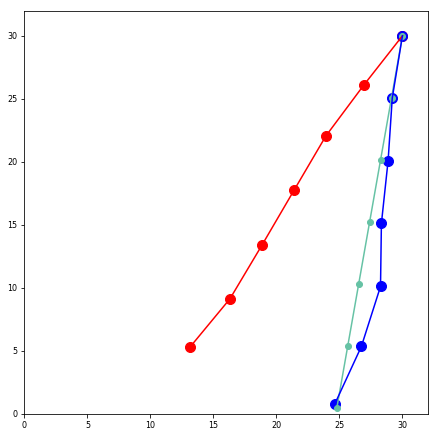

In [227]:
fig = plt.figure(figsize=figsize)
ax=fig.add_axes([0.1,0.1,1,1])
axp=ax.get_position()

d0 = 80
k = np.arange(0, 7, 1)
dk = 5
refy = 30 - np.sin(np.deg2rad(d0)) * k * dk
refx = 30 - np.cos(np.deg2rad(d0)) * k * dk
d = np.ones(len(refx)) * d0
ax.plot(refx, refy, 'o-')

x, y = refx[0], refy[0]
d = [51.9, 53.3, 59.6, 59.7, 59.2, 50.4, 41.6]
ux, uy = [], []
ux.append(x)
uy.append(y)
ax.scatter(x, y, color='r', s=100)
for j in np.arange(1, len(d), 1):
    x = x - np.cos(np.deg2rad(d[j-1])) * dk
    y = y - np.sin(np.deg2rad(d[j-1])) * dk
    ax.scatter(x, y, color='r', s=100)
    ux.append(x)
    uy.append(y)
ax.plot(ux, uy, color='r')
x, y = refx[0], refy[0]
d = [80.7, 86.2, 83.9, 89.2, 72.3, 65.2, 51.0]
ux, uy = [], []
ux.append(x)
uy.append(y)
ax.scatter(x, y, color='b', s=100)
for j in np.arange(1, len(d), 1):
    x = x - np.cos(np.deg2rad(d[j-1])) * dk
    y = y - np.sin(np.deg2rad(d[j-1])) * dk
    ax.scatter(x, y, color='b', s=100)
    ux.append(x)
    uy.append(y)
ax.plot(ux, uy, color='b')


ax.set_xlim(0, 32)
ax.set_ylim(0, 32)

200822022922


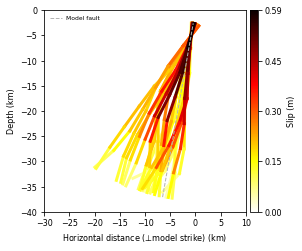

In [595]:
elat, elon = 38.3922, 39.0847

fig = plt.figure(figsize=figsize)
ax=fig.add_axes([0.1,0.1,0.5,0.5])
axp=ax.get_position()

model=np.loadtxt('modellist.txt', dtype=int, usecols=0)
j = 0 # optimal model
#data=np.loadtxt('model_'+str(model[j])+'/FFM_DCpreferred.txt', skiprows=1)
#lon, lat, slip, strike, dip, rake=data[:,2], data[:,3],data[:,1], data[:,7], data[:,8],data[:,9]
#xloc, yloc = data[:,10], data[:,11]

data=np.loadtxt('model_'+str(model[j])+'/FFM_DCall.txt', skiprows=1)
print(str(model[j]))
xloc, yloc, slip, stk0, dip0, rake0, stk1, dip1, rake1 = data[:,11], data[:,12],data[:,4], data[:,5], data[:,6],data[:,7], data[:,8], data[:,9],data[:,10]
lon, lat = data[:,1], data[:,2]
depth = data[:,3] * -1

cmap = plt.get_cmap('hot_r')

dl, dk = 5, 5
stk, dipplane = 245, 80
strike, dip, rake = [],[],[]
for i in range(len(stk0)):
    tmpstr, tmpdip, tmprake = selectplane(stk, dipplane, stk0[i], dip0[i], rake0[i], stk1[i], dip1[i], rake1[i])
    strike.append(tmpstr)
    dip.append(tmpdip)
    rake.append(tmprake)

x0 = 0
y0 = -5.075960
x0 = x0 - np.cos(np.deg2rad(dipplane)) * dk

xl = x0 + np.cos(np.deg2rad(dipplane)) * dk/2
yl = y0 + np.sin(np.deg2rad(dipplane)) * dk/2
xu = x0 - np.cos(np.deg2rad(dipplane)) * (dk*6+dk/2)
yu = y0 - np.sin(np.deg2rad(dipplane)) * (dk*6+dk/2)           
ax.plot([xu,xl],[yu,yl], color='C7', zorder=1000, lw=1, linestyle='--', label='Model fault')


cmap = plt.get_cmap('hot_r')
for l in np.arange(0, 25, 1):
#for l in np.arange(10, 11, 1):
    x0 = 0
    y0 = -5.075960
    #ax.scatter(x0, y0)
    for k in np.arange(l, len(data), 25):
        #print(depth[::-1][k], k)
        #print(l, k)
        
        #ax.scatter(lon[k], lat[k], color=cmap(slip[k]/max(slip)), edgecolor='C7')
        #shiftk = dk/2 * np.cos(np.deg2rad(dip))
        #tmp = geod.Direct(lat[k], lon[k], stk-90, shiftk*1e3)
        #x0, y0 = tmp['lon2'], tmp['lat2']
        #tmp = geod.Direct(lat[k], lon[k], stk+90, shiftk*1e3)
        #x1, y1 = tmp['lon2'], tmp['lat2']
        #ax.plot([x0, x1], [y0, y1], lw=1)
        
        if k == l:
            dipref = dip[::-1][k]
            xref = x0 - np.cos(np.deg2rad(dipplane)) * dk
            yref = depth[::-1][k]
            #ax.scatter(xref, yref, color='k')

            xl = xref - np.cos(np.deg2rad(dipref)) * dk/2
            yl = yref - np.sin(np.deg2rad(dipref)) * dk/2
            #ax.scatter(xl, yl, color='r')

            xu = xref + np.cos(np.deg2rad(dipref)) * dk/2
            yu = yref + np.sin(np.deg2rad(dipref)) * dk/2
            #ax.scatter(xu, yu, color='r')

            #ax.plot([xl,xu],[yl,yu], color='k', alpha=slip[::-1][l]/max(slip), lw=2)
            ax.plot([xl,xu],[yl,yu], color=cmap(slip[::-1][k]/max(slip)), zorder=int(slip[::-1][k]/max(slip)*10), lw=3)
            x0 = xl
            y0 = yl

        else:
            xu = x0
            yu = y0
            
            dipref = dip[::-1][k]

            xl = xu - np.cos(np.deg2rad(dipref)) * dk
            yl = yu - np.sin(np.deg2rad(dipref)) * dk
            #ax.plot([xu, xl], [yu, yl], color='k', alpha=slip[::-1][l]/max(slip), lw=2)
            ax.plot([xu, xl], [yu, yl], color=cmap(slip[::-1][k]/max(slip)), zorder=int(slip[::-1][k]/max(slip)*10), lw=3)
            
            xref = xu - np.cos(np.deg2rad(dipref)) * dk/2
            yref = yu - np.sin(np.deg2rad(dipref)) * dk/2
            #ax.scatter(xref, yref, color='k')
            
            x0 = xl
            y0 = yl
        
        #ax.scatter(yloc[k], depth[k])
        
        #ldep = depth[k] - np.sin(np.deg2rad(dip)) * dk/2
        #lyloc = yloc[k] - np.cos(np.deg2rad(dip)) * dk/2
        #ax.scatter(lyloc, ldep, color='k')
ax.legend(loc='upper left', fontsize=6)
ax.set_xlim(-30, 10)
ax.set_ylim(-40, 0)
ax.set_xlabel(r'Horizontal distance ($\bot$model strike) (km)')
ax.set_ylabel('Depth (km)')
axp=ax.get_position()
cax=fig.add_axes([axp.x1+0.01, axp.y0, 0.02, axp.y1-axp.y0])
#cbar=plt.colorbar(sc, cax=cax, ticks=np.linspace(0, maxslip, 5), format='%.2f', label='Slip (m)')
norm=mpl.colors.Normalize(vmin=0, vmax=max(slip))
cb=mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, label='Slip (m)', ticks=np.linspace(0, max(slip), 5), format='%.2f')
plt.savefig('depth.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

200822022922


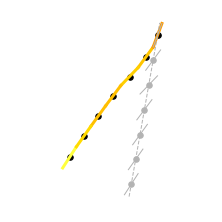

In [632]:
elat, elon = 38.3922, 39.0847

fig = plt.figure(figsize=figsize)
ax=fig.add_axes([0.1,0.1,0.5,0.5])
axp=ax.get_position()

model=np.loadtxt('modellist.txt', dtype=int, usecols=0)
j = 0 # optimal model
#data=np.loadtxt('model_'+str(model[j])+'/FFM_DCpreferred.txt', skiprows=1)
#lon, lat, slip, strike, dip, rake=data[:,2], data[:,3],data[:,1], data[:,7], data[:,8],data[:,9]
#xloc, yloc = data[:,10], data[:,11]

data=np.loadtxt('model_'+str(model[j])+'/FFM_DCall.txt', skiprows=1)
print(str(model[j]))
xloc, yloc, slip, stk0, dip0, rake0, stk1, dip1, rake1 = data[:,11], data[:,12],data[:,4], data[:,5], data[:,6],data[:,7], data[:,8], data[:,9],data[:,10]
lon, lat = data[:,1], data[:,2]
depth = data[:,3] * -1

cmap = plt.get_cmap('hot_r')

dl, dk = 5, 5
stk, dipplane = 245, 80
strike, dip, rake = [],[],[]
for i in range(len(stk0)):
    tmpstr, tmpdip, tmprake = selectplane(stk, dipplane, stk0[i], dip0[i], rake0[i], stk1[i], dip1[i], rake1[i])
    strike.append(tmpstr)
    dip.append(tmpdip)
    rake.append(tmprake)

x0 = 0
y0 = -5.075960
x0 = x0 - np.cos(np.deg2rad(dipplane)) * dk

xl = x0 + np.cos(np.deg2rad(dipplane)) * dk/2
yl = y0 + np.sin(np.deg2rad(dipplane)) * dk/2
xu = x0 - np.cos(np.deg2rad(dipplane)) * (dk*6+dk/2)
yu = y0 - np.sin(np.deg2rad(dipplane)) * (dk*6+dk/2)           
ax.plot([xu,xl],[yu,yl], color='C7', zorder=1000, lw=1, linestyle='--', label='Model fault')
for l in np.arange(18, 19, 1):
    x0 = 0
    y0 = -5.075960
    #ax.scatter(x0, y0)
    for k in np.arange(l, len(data), 25):
        x0 = x0 - np.cos(np.deg2rad(dipplane)) * dk
        y0 = depth[::-1][k]
        ax.scatter(x0, y0, color='C7', s=30)

        xl = x0 + np.cos(np.deg2rad(dip[::-1][k])) * dk/2
        yl = y0 + np.sin(np.deg2rad(dip[::-1][k])) * dk/2
        xu = x0 - np.cos(np.deg2rad(dip[::-1][k])) * dk/2
        yu = y0 - np.sin(np.deg2rad(dip[::-1][k])) * dk/2
        ax.plot([xu,xl],[yu,yl], color='C7', zorder=1000, lw=1, linestyle='-')
        


cmap = plt.get_cmap('hot_r')
#for l in np.arange(0, 25, 1):
for l in np.arange(18, 19, 1):
    x0 = 0
    y0 = -5.075960
    #ax.scatter(x0, y0)
    for k in np.arange(l, len(data), 25):
        #print(depth[::-1][k], k)
        #print(l, k)
        
        #ax.scatter(lon[k], lat[k], color=cmap(slip[k]/max(slip)), edgecolor='C7')
        #shiftk = dk/2 * np.cos(np.deg2rad(dip))
        #tmp = geod.Direct(lat[k], lon[k], stk-90, shiftk*1e3)
        #x0, y0 = tmp['lon2'], tmp['lat2']
        #tmp = geod.Direct(lat[k], lon[k], stk+90, shiftk*1e3)
        #x1, y1 = tmp['lon2'], tmp['lat2']
        #ax.plot([x0, x1], [y0, y1], lw=1)
        
        if k == l:
            dipref = dip[::-1][k]
            xref = x0 - np.cos(np.deg2rad(dipplane)) * dk
            yref = depth[::-1][k]
            ax.scatter(xref, yref, color='k', s=30)

            xl = xref - np.cos(np.deg2rad(dipref)) * dk/2
            yl = yref - np.sin(np.deg2rad(dipref)) * dk/2
            #ax.scatter(xl, yl, color='r')

            xu = xref + np.cos(np.deg2rad(dipref)) * dk/2
            yu = yref + np.sin(np.deg2rad(dipref)) * dk/2
            #ax.scatter(xu, yu, color='r')

            #ax.plot([xl,xu],[yl,yu], color='k', alpha=slip[::-1][l]/max(slip), lw=2)
            ax.plot([xl,xu],[yl,yu], color=cmap(slip[::-1][k]/max(slip)), zorder=int(slip[::-1][k]/max(slip)*10), lw=3)
            x0 = xl
            y0 = yl

        else:
            xu = x0
            yu = y0
            
            dipref = dip[::-1][k]

            xl = xu - np.cos(np.deg2rad(dipref)) * dk
            yl = yu - np.sin(np.deg2rad(dipref)) * dk
            #ax.plot([xu, xl], [yu, yl], color='k', alpha=slip[::-1][l]/max(slip), lw=2)
            ax.plot([xu, xl], [yu, yl], color=cmap(slip[::-1][k]/max(slip)), zorder=int(slip[::-1][k]/max(slip)*10), lw=3)
            
            xref = xu - np.cos(np.deg2rad(dipref)) * dk/2
            yref = yu - np.sin(np.deg2rad(dipref)) * dk/2
            ax.scatter(xref, yref, color='k', s=30)
            
            x0 = xl
            y0 = yl
        
        #ax.scatter(yloc[k], depth[k])
        
        #ldep = depth[k] - np.sin(np.deg2rad(dip)) * dk/2
        #lyloc = yloc[k] - np.cos(np.deg2rad(dip)) * dk/2
        #ax.scatter(lyloc, ldep, color='k')
#ax.legend(loc='upper left', fontsize=6)
ax.set_xlim(-30, 10)
ax.set_ylim(-40, 0)
ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False); ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False); ax.get_xaxis().set_ticks([]); ax.get_yaxis().set_ticks([])
#ax.set_xlabel(r'Horizontal distance ($\bot$model strike) (km)')
#ax.set_ylabel('Depth (km)')
plt.savefig('depthSchematic.pdf', bbox_inches='tight', pad_inches=0.1, transparent=True)
plt.show()

37.0847 41.0847 37.3922 39.3922
200822022922
200822022922


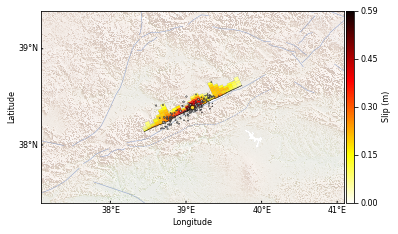

In [504]:
elat, elon = 38.3922, 39.0847 # KOERI
model=np.loadtxt('modellist.txt', dtype=int, usecols=0)
#lonmin=119.4; lonmax=120.4; latmin=-2.1; latmax=0.5
#lonmin=elon-4; lonmax=elon+4; latmin=elat-2; latmax=elat+2
lonmin=elon-2; lonmax=elon+2; latmin=elat-1; latmax=elat+1
print(lonmin, lonmax, latmin, latmax)
m=Basemap(llcrnrlon=lonmin,llcrnrlat=latmin,urcrnrlon=lonmax,urcrnrlat=latmax,\
          rsphere=(6378137.00,6356752.3142),resolution='i',projection='merc')
x, y=m([lonmin, lonmax], [latmin, latmax])
aspect=max(x)/max(y)
mapwidth=0.75; mapheight=mapwidth/aspect
fig=plt.figure(figsize=figsize)
j = 0 # optimal model
print(str(model[j]))
data=np.loadtxt('model_'+str(model[j])+'/FFM_DCpreferred.txt', skiprows=1)
lon, lat, slip, strike, dip, rake=data[:,2], data[:,3],data[:,1], data[:,7], data[:,8],data[:,9]
xloc, yloc = data[:,10], data[:,11]

cmap=plt.get_cmap('hot_r')

ax=fig.add_axes([0.1, 0.1, mapwidth, mapheight])
axp=ax.get_position()
#m.drawmapboundary(fill_color='#f5f5f5')
#m.fillcontinents(color='none', alpha=0.05, lake_color='w', zorder=10)
m.drawparallels(np.arange(-80.,81.,1),labels=[1,0,0,0], fontsize=initfontsize, \
            dashes=(2,10000), color='k')        
m.drawmeridians(np.arange(-180.,181.,1),labels=[0,0,0,1], fontsize=initfontsize, \
            dashes=(2,10000), color='k')
#m.drawcoastlines(color='C7', linewidth=0.5, zorder=2)
ax.set_xlabel('Longitude', labelpad=15)
ax.set_ylabel('Latitude', labelpad=25)

x, y = m(elon, elat)
ax.scatter(x, y, s=15, marker='o', facecolor='C5', edgecolor='k', alpha=1, zorder=101, lw=0.5, label='Mainshock (KOERI)')

model=np.loadtxt('modellist.txt', dtype=int, usecols=0)
j = 0 # optimal model

#data=np.loadtxt('model_'+str(model[j])+'/FFM_DCpreferred.txt', skiprows=1)
#lon, lat, slip, strike, dip, rake=data[:,2], data[:,3],data[:,1], data[:,7], data[:,8],data[:,9]
#xloc, yloc = data[:,10], data[:,11]
#depth = data[:,4] * -1
#cmap = plt.get_cmap('hot_r')

data=np.loadtxt('model_'+str(model[j])+'/FFM_DCall.txt', skiprows=1)
print(str(model[j]))
xloc, yloc, slip, stk0, dip0, rake0, stk1, dip1, rake1 = data[:,11], data[:,12],data[:,4], data[:,5], data[:,6],data[:,7], data[:,8], data[:,9],data[:,10]
lon, lat = data[:,1], data[:,2]
depth = data[:,3] * -1

cmap = plt.get_cmap('hot_r')

dl, dk = 5, 5
stk, dipplane = 245, 80
strike, dip, rake = [],[],[]
for i in range(len(stk0)):
    tmpstr, tmpdip, tmprake = selectplane(stk, dipplane, stk0[i], dip0[i], rake0[i], stk1[i], dip1[i], rake1[i])
    strike.append(tmpstr)
    dip.append(tmpdip)
    rake.append(tmprake)


#x, y = m(lon, lat)
#ax.scatter(x, y, zorder=1000, edgecolor='none', facecolor=blue, s=2)

#dl, dk = 5, 5
#stk, dipplane = 245, 80

cmap = plt.get_cmap('hot_r')
for l in np.arange(0, 25, 1):
#for l in np.arange(10, 11, 1):
    for k in np.arange(l, len(data), 25):
        
        if k == l:
            dipref = dip[::-1][k]
            #dipref = dipplane
            xref = x0 - np.cos(np.deg2rad(dipplane)) * dk
            yref = depth[::-1][k]
            #ax.scatter(xref, yref, color='k')
            
            lonref, latref = lon[::-1][k], lat[::-1][k]
            x, y = m(lonref, latref)
            #ax.scatter(x, y, color=cmap(slip[::-1][k]/max(slip)), s=5, zorder=1000)
            
            shiftk = dk/2 * np.cos(np.deg2rad(dipref))
            tmp = geod.Direct(latref, lonref, stk-90, shiftk*1e3)
            lonu, latu = tmp['lon2'], tmp['lat2']
            x, y = m(lonu, latu)
            #ax.scatter(x, y, color='r', s=1)
            
            xslipcell, yslipcell = getSlipCell(latref, lonref, dl, dk, stk, dipref, m)
            ax.fill(xslipcell, yslipcell, facecolor=cmap(slip[::-1][k]/max(slip)), zorder=0, edgecolor='none', alpha=1)
            ax.fill(xslipcell, yslipcell, facecolor='none', zorder=-1, edgecolor='C7', lw=0.5)
            ax.plot([xslipcell[1], xslipcell[2]],[yslipcell[1], yslipcell[2]], color='k', lw=0.5)

            shiftk = dk/2 * np.cos(np.deg2rad(dipref))
            tmp = geod.Direct(latref, lonref, stk+90, shiftk*1e3)
            lonl, latl = tmp['lon2'], tmp['lat2']
            x, y = m(lonl, latl)
            #ax.scatter(x, y, color='b', s=1.5)

            xl = xref - np.cos(np.deg2rad(dipref)) * dk/2
            yl = yref - np.sin(np.deg2rad(dipref)) * dk/2
            #ax.scatter(xl, yl, color='r')

            xu = xref + np.cos(np.deg2rad(dipref)) * dk/2
            yu = yref + np.sin(np.deg2rad(dipref)) * dk/2
            #ax.scatter(xu, yu, color='r')

            #ax.plot([xl,xu],[yl,yu], color='k', alpha=slip[::-1][l]/max(slip), lw=2)
            #ax.plot([xl,xu],[yl,yu], color=cmap(slip[::-1][k]/max(slip)), zorder=int(slip[::-1][k]/max(slip)*10), lw=2)
            
            
            tmp0 = geod.Direct(lat[::-1][k], lon[::-1][k], strike[::-1][k], slip[::-1][k]/max(slip) * 10 * 1e3)
            tmp1 = geod.Direct(lat[::-1][k], lon[::-1][k], strike[::-1][k]+180, slip[::-1][k]/max(slip) * 10 * 1e3)
            x0, y0 = m(tmp0['lon2'], tmp0['lat2'])
            x1, y1 = m(tmp1['lon2'], tmp1['lat2'])
            #ax.plot([x0, x1], [y0, y1], lw=0.5, color='cyan', solid_capstyle='round', zorder=2000, alpha=0.85)
            
            x0 = xl
            y0 = yl
        else:
            xu = x0
            yu = y0
            
            dipref = dip[::-1][k]
            #dipref = dipplane

            lonref = lonl
            latref = latl
            
            lonu, latu = lonref, latref
            x, y = m(lonu, latu)
            #ax.scatter(x, y, color='r', s=1)

            shiftk = dk * np.cos(np.deg2rad(dipref))
            tmp = geod.Direct(latref, lonref, stk+90, shiftk*1e3)
            lonl, latl = tmp['lon2'], tmp['lat2']
            x, y = m(lonl, latl)
            #ax.scatter(x, y, color='b', s=1.5)
            
            shiftk = dk/2 * np.cos(np.deg2rad(dipref))
            tmp = geod.Direct(latl, lonl, stk-90, shiftk*1e3)
            lonref, latref = tmp['lon2'], tmp['lat2']
            x, y = m(lonref, latref)
            #ax.scatter(x, y, color=cmap(slip[::-1][k]/max(slip)), s=5, zorder=1000)
            
            xslipcell, yslipcell = getSlipCell(latref, lonref, dl, dk, stk, dipref, m)
            ax.fill(xslipcell, yslipcell, facecolor=cmap(slip[::-1][k]/max(slip)), zorder=0, edgecolor='none', alpha=1)
            ax.fill(xslipcell, yslipcell, facecolor='none', zorder=-1, edgecolor='C7', lw=0.5)


            
            xl = xu - np.cos(np.deg2rad(dipref)) * dk
            yl = yu - np.sin(np.deg2rad(dipref)) * dk
            #ax.plot([xu, xl], [yu, yl], color='k', alpha=slip[::-1][l]/max(slip), lw=2)
            #ax.plot([xu, xl], [yu, yl], color=cmap(slip[::-1][k]/max(slip)), zorder=int(slip[::-1][k]/max(slip)*10), lw=2)
            
            xref = xu - np.cos(np.deg2rad(dipref)) * dk/2
            yref = yu - np.sin(np.deg2rad(dipref)) * dk/2
            #ax.scatter(xref, yref, color='k')
            
            x0 = xl
            y0 = yl
        
        #ax.scatter(yloc[k], depth[k])
        
        #ldep = depth[k] - np.sin(np.deg2rad(dip)) * dk/2
        #lyloc = yloc[k] - np.cos(np.deg2rad(dip)) * dk/2
        #ax.scatter(lyloc, ldep, color='k')

sf = shapefile.Reader('/Users/ryo/Downloads/gem-global-active-faults/shapefile/gem_active_faults.shp')
fields = sf.fields[1:] 
field_names = [field[0] for field in fields] 
for r in sf.shapeRecords():  
    atr = dict(zip(field_names, r.record))
    if atr['catalog_na'] == 'EMME':
        if atr['slip_type'] == 'Sinistral' or atr['slip_type'] == 'Dextral':
            x = [i[0] for i in r.shape.points[:]]
            y = [i[1] for i in r.shape.points[:]]
            x, y = m(x, y)
            ax.plot(x, y, color='C2', lw=0.5, zorder=0, alpha=1, linestyle='-')
        elif atr['slip_type'] == 'Reverse':
            x = [i[0] for i in r.shape.points[:]]
            y = [i[1] for i in r.shape.points[:]]
            x, y = m(x, y)
            ax.plot(x, y, color='C2', lw=0.5, zorder=0, alpha=1, linestyle='--')

# http://www.koeri.boun.edu.tr/sismo/2/earthquake-catalog/
data = np.loadtxt('20200123_20200131_3_9.0_57_985.txt', usecols=(4,5,7), skiprows=1)
x, y = m(data[:,1], data[:,0])
ax.scatter(x, y, s=np.exp(data[:,2])/20, marker='o', facecolor='C7', edgecolor='k', alpha=1, zorder=100, lw=0.35, label='Aftershock (KOERI)')

import matplotlib.image as mpimg
# the shaded topo/bathy image is made by GMT 
#   because matplotlib's imshow may not cooperate with map projection
# $ bash plotTopoBathyGMT.sh
#img = mpimg.imread('/Volumes/WDMyPassport4TB/SRTM/plotTopoBathyGMT.png') 
img = mpimg.imread('/Volumes/WDMyPassport4TB/SRTM/plotTopoBathyGMTclose.png') 
topoimg = ax.imshow(img, zorder=-2)
x, y=m([lonmin, lonmax], [latmin, latmax])
extent=(min(x),max(x),min(y),max(y))
topoimg.set_extent(extent)
topoimg.set_alpha(.3)

axp=ax.get_position()
cax=fig.add_axes([axp.x1+0.005, axp.y0, 0.02, axp.y1-axp.y0])
#cbar=plt.colorbar(sc, cax=cax, ticks=np.linspace(0, maxslip, 5), format='%.2f', label='Slip (m)')
norm=mpl.colors.Normalize(vmin=0, vmax=max(slip))
cb=mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, label='Slip (m)', ticks=np.linspace(0, max(slip), 5), format='%.2f', alpha=1)

plt.savefig('map.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

37.0847 41.0847 37.3922 39.3922
200822022922


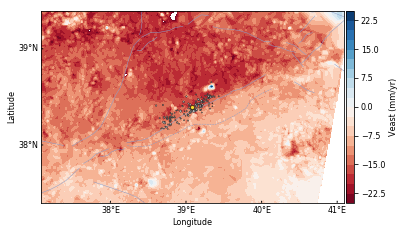

In [655]:
elat, elon = 38.3922, 39.0847 # KOERI
model=np.loadtxt('modellist.txt', dtype=int, usecols=0)
#lonmin=119.4; lonmax=120.4; latmin=-2.1; latmax=0.5
#lonmin=elon-4; lonmax=elon+4; latmin=elat-2; latmax=elat+2
lonmin=elon-2; lonmax=elon+2; latmin=elat-1; latmax=elat+1
print(lonmin, lonmax, latmin, latmax)
m=Basemap(llcrnrlon=lonmin,llcrnrlat=latmin,urcrnrlon=lonmax,urcrnrlat=latmax,\
          rsphere=(6378137.00,6356752.3142),resolution='i',projection='merc')
x, y=m([lonmin, lonmax], [latmin, latmax])
aspect=max(x)/max(y)
mapwidth=0.75; mapheight=mapwidth/aspect
fig=plt.figure(figsize=figsize)
j = 0 # optimal model
print(str(model[j]))
data=np.loadtxt('model_'+str(model[j])+'/FFM_DCpreferred.txt', skiprows=1)
lon, lat, slip, strike, dip, rake=data[:,2], data[:,3],data[:,1], data[:,7], data[:,8],data[:,9]
xloc, yloc = data[:,10], data[:,11]

cmap=plt.get_cmap('hot_r')

ax=fig.add_axes([0.1, 0.1, mapwidth, mapheight])
axp=ax.get_position()
#m.drawmapboundary(fill_color='#f5f5f5')
#m.fillcontinents(color='none', alpha=0.05, lake_color='w', zorder=10)
m.drawparallels(np.arange(-80.,81.,1),labels=[1,0,0,0], fontsize=initfontsize, \
            dashes=(2,10000), color='k')        
m.drawmeridians(np.arange(-180.,181.,1),labels=[0,0,0,1], fontsize=initfontsize, \
            dashes=(2,10000), color='k')
#m.drawcoastlines(color='C7', linewidth=0.5, zorder=2)
ax.set_xlabel('Longitude', labelpad=15)
ax.set_ylabel('Latitude', labelpad=25)

x, y = m(elon, elat)
ax.scatter(x, y, s=15, marker='o', facecolor='C5', edgecolor='k', alpha=1, zorder=101, lw=0.5, label='Mainshock (KOERI)')


sf = shapefile.Reader('/Users/ryo/Downloads/gem-global-active-faults/shapefile/gem_active_faults.shp')
fields = sf.fields[1:] 
field_names = [field[0] for field in fields] 
for r in sf.shapeRecords():  
    atr = dict(zip(field_names, r.record))
    if atr['catalog_na'] == 'EMME':
        if atr['slip_type'] == 'Sinistral' or atr['slip_type'] == 'Dextral':
            x = [i[0] for i in r.shape.points[:]]
            y = [i[1] for i in r.shape.points[:]]
            x, y = m(x, y)
            ax.plot(x, y, color='C2', lw=0.5, zorder=0, alpha=1, linestyle='-')
        elif atr['slip_type'] == 'Reverse':
            x = [i[0] for i in r.shape.points[:]]
            y = [i[1] for i in r.shape.points[:]]
            x, y = m(x, y)
            ax.plot(x, y, color='C2', lw=0.5, zorder=0, alpha=1, linestyle='--')

# http://www.koeri.boun.edu.tr/sismo/2/earthquake-catalog/
data = np.loadtxt('20200123_20200131_3_9.0_57_985.txt', usecols=(4,5,7), skiprows=1)
x, y = m(data[:,1], data[:,0])
ax.scatter(x, y, s=np.exp(data[:,2])/20, marker='o', facecolor='C7', edgecolor='k', alpha=1, zorder=100, lw=0.35, label='Aftershock (KOERI)')

data = np.loadtxt('/Users/ryo/Downloads/Weiss_etal_Anatolia_SI_data1/Venu.LiCSBASv2.mod.xyz')
lon, lat, v_east, v_north, v_up = data[:,0], data[:,1], data[:,2], data[:,3], data[:,4]
x, y = m(lon, lat)
xs=np.linspace(min(x), max(x), 1000)
ys=np.linspace(min(y), max(y), 1000)
X, Y = np.meshgrid(xs, ys)
Z = griddata((x, y), v_east, (X, Y),'linear')
vmin, vmax = -25, 25
levels = np.linspace(vmin, vmax, 21)
sc = ax.contourf(X, Y, Z, levels=levels, cmap='RdBu', vmin=vmin, vmax=vmax, zorder=0)

axp=ax.get_position()
cax=fig.add_axes([axp.x1+0.005, axp.y0, 0.02, axp.y1-axp.y0])
cbar=plt.colorbar(sc, cax=cax, label='Veast (mm/yr)')
#cbar=plt.colorbar(sc, cax=cax, label='Vnorth (mm/yr)')

plt.savefig('mapVelEast.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

37.0847 41.0847 37.3922 39.3922
200822022922


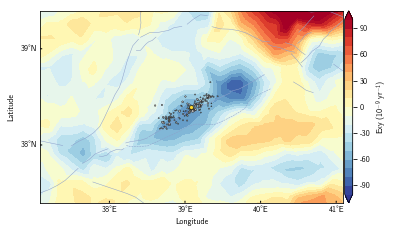

In [3]:
elat, elon = 38.3922, 39.0847 # KOERI
model=np.loadtxt('modellist.txt', dtype=int, usecols=0)
#lonmin=119.4; lonmax=120.4; latmin=-2.1; latmax=0.5
#lonmin=elon-4; lonmax=elon+4; latmin=elat-2; latmax=elat+2
lonmin=elon-2; lonmax=elon+2; latmin=elat-1; latmax=elat+1
print(lonmin, lonmax, latmin, latmax)
m=Basemap(llcrnrlon=lonmin,llcrnrlat=latmin,urcrnrlon=lonmax,urcrnrlat=latmax,\
          rsphere=(6378137.00,6356752.3142),resolution='i',projection='merc')
x, y=m([lonmin, lonmax], [latmin, latmax])
aspect=max(x)/max(y)
mapwidth=0.75; mapheight=mapwidth/aspect
fig=plt.figure(figsize=figsize)
j = 0 # optimal model
print(str(model[j]))
data=np.loadtxt('model_'+str(model[j])+'/FFM_DCpreferred.txt', skiprows=1)
lon, lat, slip, strike, dip, rake=data[:,2], data[:,3],data[:,1], data[:,7], data[:,8],data[:,9]
xloc, yloc = data[:,10], data[:,11]

cmap=plt.get_cmap('hot_r')

ax=fig.add_axes([0.1, 0.1, mapwidth, mapheight])
axp=ax.get_position()
#m.drawmapboundary(fill_color='#f5f5f5')
#m.fillcontinents(color='none', alpha=0.05, lake_color='w', zorder=10)
m.drawparallels(np.arange(-80.,81.,1),labels=[1,0,0,0], fontsize=initfontsize, \
            dashes=(2,10000), color='k')        
m.drawmeridians(np.arange(-180.,181.,1),labels=[0,0,0,1], fontsize=initfontsize, \
            dashes=(2,10000), color='k')
#m.drawcoastlines(color='C7', linewidth=0.5, zorder=2)
ax.set_xlabel('Longitude', labelpad=15)
ax.set_ylabel('Latitude', labelpad=25)

x, y = m(elon, elat)
ax.scatter(x, y, s=15, marker='o', facecolor='C5', edgecolor='k', alpha=1, zorder=101, lw=0.5, label='Mainshock (KOERI)')


sf = shapefile.Reader('/Users/ryo/Downloads/gem-global-active-faults/shapefile/gem_active_faults.shp')
fields = sf.fields[1:] 
field_names = [field[0] for field in fields] 
for r in sf.shapeRecords():  
    atr = dict(zip(field_names, r.record))
    if atr['catalog_na'] == 'EMME':
        if atr['slip_type'] == 'Sinistral' or atr['slip_type'] == 'Dextral':
            x = [i[0] for i in r.shape.points[:]]
            y = [i[1] for i in r.shape.points[:]]
            x, y = m(x, y)
            ax.plot(x, y, color='C2', lw=0.5, zorder=0, alpha=1, linestyle='-')
        elif atr['slip_type'] == 'Reverse':
            x = [i[0] for i in r.shape.points[:]]
            y = [i[1] for i in r.shape.points[:]]
            x, y = m(x, y)
            ax.plot(x, y, color='C2', lw=0.5, zorder=0, alpha=1, linestyle='--')

# http://www.koeri.boun.edu.tr/sismo/2/earthquake-catalog/
data = np.loadtxt('20200123_20200131_3_9.0_57_985.txt', usecols=(4,5,7), skiprows=1)
x, y = m(data[:,1], data[:,0])
ax.scatter(x, y, s=np.exp(data[:,2])/20, marker='o', facecolor='C7', edgecolor='k', alpha=1, zorder=100, lw=0.35, label='Aftershock (KOERI)')

data = np.loadtxt('/Users/ryo/Downloads/Weiss_etal_Anatolia_SI_data1/strain_savage_nring1.dat')
lon, lat, e_xx, e_yy, e_xy = data[:,0], data[:,1], data[:,2] * 1e9, data[:,3] * 1e9, data[:,4] * 1e9
x, y = m(lon, lat)
xs=np.linspace(min(x), max(x), 1000)
ys=np.linspace(min(y), max(y), 1000)
X, Y = np.meshgrid(xs, ys)
Z = griddata((x, y), e_xy, (X, Y),'linear')
vmin, vmax = -100, 100
levels = np.linspace(vmin, vmax, 21)
sc = ax.contourf(X, Y, Z, levels=levels, cmap='RdYlBu_r', vmin=vmin, vmax=vmax, zorder=0, extend='both')

axp=ax.get_position()
cax=fig.add_axes([axp.x1+0.005, axp.y0, 0.02, axp.y1-axp.y0])
cbar=plt.colorbar(sc, cax=cax, label='Exy ($10^{-9}$ yr$^{-1}$)')
#cbar=plt.colorbar(sc, cax=cax, label='Vnorth (mm/yr)')

plt.savefig('mapStrainExy.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

25 42 35.5 42.5
200822022922


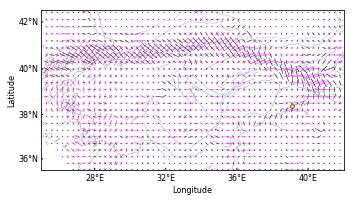

In [751]:
elat, elon = 38.3922, 39.0847 # KOERI
model=np.loadtxt('modellist.txt', dtype=int, usecols=0)
#lonmin=119.4; lonmax=120.4; latmin=-2.1; latmax=0.5
#lonmin=elon-4; lonmax=elon+4; latmin=elat-2; latmax=elat+2
lonmin=elon-2; lonmax=elon+2; latmin=elat-1; latmax=elat+1
lonmin=25; lonmax=42; latmin=35.5; latmax=42.5
print(lonmin, lonmax, latmin, latmax)
m=Basemap(llcrnrlon=lonmin,llcrnrlat=latmin,urcrnrlon=lonmax,urcrnrlat=latmax,\
          rsphere=(6378137.00,6356752.3142),resolution='i',projection='merc')
x, y=m([lonmin, lonmax], [latmin, latmax])
aspect=max(x)/max(y)
mapwidth=0.75; mapheight=mapwidth/aspect
fig=plt.figure(figsize=figsize)
j = 0 # optimal model
print(str(model[j]))
data=np.loadtxt('model_'+str(model[j])+'/FFM_DCpreferred.txt', skiprows=1)
lon, lat, slip, strike, dip, rake=data[:,2], data[:,3],data[:,1], data[:,7], data[:,8],data[:,9]
xloc, yloc = data[:,10], data[:,11]

cmap=plt.get_cmap('hot_r')

ax=fig.add_axes([0.1, 0.1, mapwidth, mapheight])
axp=ax.get_position()
#m.fillcontinents(color='none', alpha=1, lake_color='w', zorder=10)
#m.drawlsmask(land_color='none', ocean_color='w', resolution='f', grid=1.25)
#m.drawmapboundary(fill_color='#f5f5f5')
#m.fillcontinents(color='none', alpha=0.05, lake_color='w', zorder=10)
m.drawparallels(np.arange(-80.,81.,2),labels=[1,0,0,0], fontsize=initfontsize, \
            dashes=(2,10000), color='k')        
m.drawmeridians(np.arange(-180.,181.,4),labels=[0,0,0,1], fontsize=initfontsize, \
            dashes=(2,10000), color='k')
m.drawcoastlines(color='C7', linewidth=0.5, zorder=2)
ax.set_xlabel('Longitude', labelpad=15)
ax.set_ylabel('Latitude', labelpad=25)

x, y = m(elon, elat)
ax.scatter(x, y, s=15, marker='o', facecolor='C5', edgecolor='k', alpha=1, zorder=101, lw=0.5, label='Mainshock (KOERI)')


sf = shapefile.Reader('/Users/ryo/Downloads/gem-global-active-faults/shapefile/gem_active_faults.shp')
fields = sf.fields[1:] 
field_names = [field[0] for field in fields] 
for r in sf.shapeRecords():  
    atr = dict(zip(field_names, r.record))
    if atr['catalog_na'] == 'EMME':
        if atr['slip_type'] == 'Sinistral' or atr['slip_type'] == 'Dextral':
            x = [i[0] for i in r.shape.points[:]]
            y = [i[1] for i in r.shape.points[:]]
            x, y = m(x, y)
            ax.plot(x, y, color='C2', lw=0.5, zorder=0, alpha=1, linestyle='-')
        elif atr['slip_type'] == 'Reverse':
            x = [i[0] for i in r.shape.points[:]]
            y = [i[1] for i in r.shape.points[:]]
            x, y = m(x, y)
            ax.plot(x, y, color='C2', lw=0.5, zorder=0, alpha=1, linestyle='--')

# http://www.koeri.boun.edu.tr/sismo/2/earthquake-catalog/
data = np.loadtxt('20200123_20200131_3_9.0_57_985.txt', usecols=(4,5,7), skiprows=1)
x, y = m(data[:,1], data[:,0])
#ax.scatter(x, y, s=np.exp(data[:,2])/20, marker='o', facecolor='C7', edgecolor='k', alpha=1, zorder=100, lw=0.35, label='Aftershock (KOERI)')

data = np.loadtxt('/Users/ryo/Downloads/Weiss_etal_Anatolia_SI_data1/strain_savage_nring1.dat')
lon, lat, e_xx, e_yy, e_xy = data[:,0], data[:,1], data[:,2] * 1e9, data[:,3] * 1e9, data[:,4] * 1e9
eps1, eps2, alpha = data[:,7]*1e9, data[:,8]*1e9, data[:,9]
x, y = m(lon, lat)

xs=np.linspace(min(x), max(x), 1000)
ys=np.linspace(min(y), max(y), 1000)
X, Y = np.meshgrid(xs, ys)
Z = griddata((x, y), e_xy, (X, Y),'linear')
vmin, vmax = -100, 100
levels = np.linspace(vmin, vmax, 21)
#sc = ax.contourf(X, Y, Z, levels=levels, cmap='RdYlBu_r', vmin=vmin, vmax=vmax, zorder=-1, extend='both')

tmp1 = np.sin((alpha+360)%180 * np.pi / 90)
tmp2 = np.cos((alpha+360)%180 * np.pi / 90)
tmp3 = np.arctan2(tmp1, tmp2) / 2
tmp3 = np.rad2deg(tmp3)

#xs=np.arange(min(lon), max(lon)+0.3, 0.3)
#ys=np.arange(min(lat), max(lat)+0.3, 0.3)
xs=np.arange(lonmin, lonmax+0.3, 0.3)
ys=np.arange(latmin, latmax+0.3, 0.3)
#xs, ys = m(xs, ys)
#xs=np.arange(min(x), max(x)+0.3, 0.3)
#ys=np.arange(min(y), max(y)+0.3, 0.3)
X, Y = np.meshgrid(xs, ys)
X, Y = m(X, Y)
Z = griddata((x, y), tmp3, (X, Y),'linear')
Zeps1 = griddata((x, y), eps1, (X, Y),'linear')
Zeps2 = griddata((x, y), eps2, (X, Y),'linear')
#vmin, vmax = -100, 100
#levels = np.linspace(vmin, vmax, 21)
#sc = ax.contourf(X, Y, Z, levels=levels, cmap='RdYlBu_r', vmin=vmin, vmax=vmax, zorder=-1, extend='both')
#ax.scatter(X,Y,c=Z, s=10, cmap='RdBu', vmin=-90, vmax=90, edgecolor='k', linewidth=0.5)

for k in range(len(X)):
    xe = np.cos(np.deg2rad(90-Z[k])) * 200 * Zeps2[k] + X[k]
    ye = np.sin(np.deg2rad(90-Z[k])) * 200 * Zeps2[k] + Y[k]
    ax.plot([X[k],xe], [Y[k],ye], lw=0.5, color='k')

    xe = np.cos(np.deg2rad(90-Z[k]+180)) * 200 * Zeps2[k] + X[k]
    ye = np.sin(np.deg2rad(90-Z[k]+180)) * 200 * Zeps2[k] + Y[k]
    ax.plot([X[k],xe], [Y[k],ye], lw=0.5, color='k')

    xe = np.cos(np.deg2rad(90-Z[k]+90)) * 200 * Zeps1[k] + X[k]
    ye = np.sin(np.deg2rad(90-Z[k]+90)) * 200 * Zeps1[k] + Y[k]
    ax.plot([X[k],xe], [Y[k],ye], lw=0.5, color='magenta')

    xe = np.cos(np.deg2rad(90-Z[k]+180+90)) * 200 * Zeps1[k] + X[k]
    ye = np.sin(np.deg2rad(90-Z[k]+180+90)) * 200 * Zeps1[k] + Y[k]
    ax.plot([X[k],xe], [Y[k],ye], lw=0.5, color='magenta')

#axp=ax.get_position()
#cax=fig.add_axes([axp.x1+0.005, axp.y0, 0.02, axp.y1-axp.y0])
#cbar=plt.colorbar(sc, cax=cax, label='Exy ($10^{-9}$ yr$^{-1}$)')
#cbar=plt.colorbar(sc, cax=cax, label='Vnorth (mm/yr)')

plt.savefig('mapStrainExy.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

In [744]:
min(eps1)

-49.178501000000004

-89.91189300000003 89.99212999999999


(35.5, 42.5)

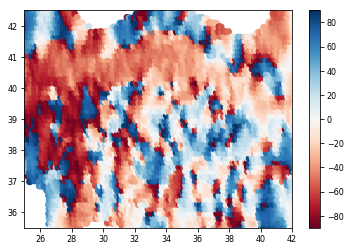

In [732]:
data = np.loadtxt('/Users/ryo/Downloads/Weiss_etal_Anatolia_SI_data1/strain_savage_nring1.dat')
lon, lat, e_xx, e_yy, e_xy = data[:,0], data[:,1], data[:,2] * 1e9, data[:,3] * 1e9, data[:,4] * 1e9
eps1, eps2, alpha = data[:,7]*1e9, data[:,8]*1e9, data[:,9]

tmp1 = np.sin((alpha+360)%180 * np.pi / 90)
tmp2 = np.cos((alpha+360)%180 * np.pi / 90)

tmp3 = np.arctan2(tmp1, tmp2) / 2
tmp3 = np.rad2deg(tmp3)
print(min(tmp3), max(tmp3))
sc=plt.scatter(lon, lat, c=tmp3, cmap='RdBu')
plt.colorbar(sc)
plt.xlim(25, 42)
plt.ylim(35.5, 42.5)


-218.76076 241.09661999999997
-89.99213066158856 89.91189282180797


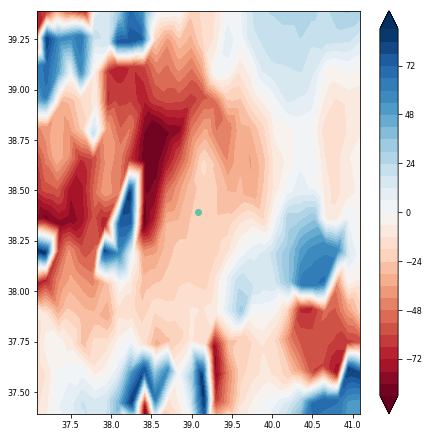

In [682]:
data = np.loadtxt('/Users/ryo/Downloads/Weiss_etal_Anatolia_SI_data1/strain_savage_nring1.dat')
lon, lat, e_xx, e_yy, e_xy = data[:,0], data[:,1], data[:,2] * 1e9, data[:,3] * 1e9, data[:,4] * 1e9
print(min(e_xx), max(e_xx))
#t, x, amp = data[:,0], data[:,1], data[:,3]
# 37.0847 41.0847 37.3922 39.3922

tmp = np.arctan2(2*e_xy, (e_xx-e_yy)) / 2
tmp = np.rad2deg(tmp)
print(min(tmp), max(tmp))

xs=np.linspace(min(lon), max(lon), 1000)
ys=np.linspace(min(lat), max(lat), 1000)
X, Y = np.meshgrid(xs, ys)
Z = griddata((lon, lat), tmp, (X, Y),'linear')
levels = np.linspace(-90, 90, 31)


fig=plt.figure(figsize=figsize)
ax=fig.add_axes([0.1, 0.1, 1, 1])
axp=ax.get_position()

sc = ax.contourf(X, Y, Z, levels=levels, cmap='RdBu', vmin=-90, vmax=90, extend='both')

elat, elon = 38.3922, 39.0847 # KOERI

ax.scatter(elon, elat)
ax.set_xlim([37.0847, 41.0847])
ax.set_ylim([37.3922, 39.3922])

plt.colorbar(sc)
plt.show()

In [684]:
data = np.loadtxt('/Users/ryo/Downloads/Weiss_etal_Anatolia_SI_data1/Venu.LiCSBASv2.mod.xyz')
lon, lat, v_east, v_north, v_up = data[:,0], data[:,1], data[:,2], data[:,3], data[:,4]


-89.96905820955527 89.97999618687436


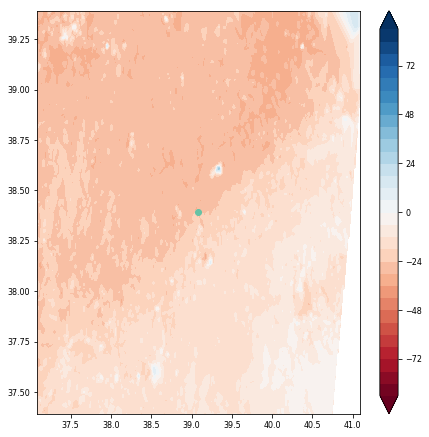

In [685]:
e_xx = v_east
e_yy = v_north

#tmp = np.arctan2(2*e_xy, (e_xx-e_yy)) / 2
tmp = np.arctan2(e_xx, e_yy) / 2
tmp = np.rad2deg(tmp)
print(min(tmp), max(tmp))

xs=np.linspace(min(lon), max(lon), 1000)
ys=np.linspace(min(lat), max(lat), 1000)
X, Y = np.meshgrid(xs, ys)
Z = griddata((lon, lat), tmp, (X, Y),'linear')
levels = np.linspace(-90, 90, 31)


fig=plt.figure(figsize=figsize)
ax=fig.add_axes([0.1, 0.1, 1, 1])
axp=ax.get_position()

sc = ax.contourf(X, Y, Z, levels=levels, cmap='RdBu', vmin=-90, vmax=90, extend='both')

elat, elon = 38.3922, 39.0847 # KOERI

ax.scatter(elon, elat)
ax.set_xlim([37.0847, 41.0847])
ax.set_ylim([37.3922, 39.3922])

plt.colorbar(sc)
plt.show()

In [683]:
exx, exy, eyy = 0.5, 0.3, -0.2
tmp = np.arctan2(2*exy, (exx-eyy)) / 2
np.rad2deg(tmp)

20.300647322502236

38.2847 39.884699999999995 38.092200000000005 38.6922
200822022922
200822022922


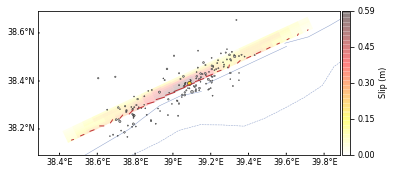

In [640]:
elat, elon = 38.3922, 39.0847 # KOERI
model=np.loadtxt('modellist.txt', dtype=int, usecols=0)
#lonmin=119.4; lonmax=120.4; latmin=-2.1; latmax=0.5
#lonmin=elon-4; lonmax=elon+4; latmin=elat-2; latmax=elat+2
lonmin=elon-0.8; lonmax=elon+0.8; latmin=elat-0.3; latmax=elat+0.3
print(lonmin, lonmax, latmin, latmax)
m=Basemap(llcrnrlon=lonmin,llcrnrlat=latmin,urcrnrlon=lonmax,urcrnrlat=latmax,\
          rsphere=(6378137.00,6356752.3142),resolution='i',projection='merc')
x, y=m([lonmin, lonmax], [latmin, latmax])
aspect=max(x)/max(y)
mapwidth=0.75; mapheight=mapwidth/aspect
fig=plt.figure(figsize=figsize)
j = 0 # optimal model
print(str(model[j]))
data=np.loadtxt('model_'+str(model[j])+'/FFM_DCpreferred.txt', skiprows=1)
lon, lat, slip, strike, dip, rake=data[:,2], data[:,3],data[:,1], data[:,7], data[:,8],data[:,9]
xloc, yloc = data[:,10], data[:,11]

cmap=plt.get_cmap('hot_r')

ax=fig.add_axes([0.1, 0.1, mapwidth, mapheight])
axp=ax.get_position()
#m.drawmapboundary(fill_color='#f5f5f5')
#m.fillcontinents(color='none', alpha=0.05, lake_color='w', zorder=10)
m.drawparallels(np.arange(-80.,81.,0.2),labels=[1,0,0,0], fontsize=initfontsize, \
            dashes=(2,10000), color='k')        
m.drawmeridians(np.arange(-180.,181.,0.2),labels=[0,0,0,1], fontsize=initfontsize, \
            dashes=(2,10000), color='k')
#m.drawcoastlines(color='C7', linewidth=0.5, zorder=2)

x, y = m(elon, elat)
ax.scatter(x, y, s=15, marker='o', facecolor='C5', edgecolor='k', alpha=1, zorder=101, lw=0.5, label='Mainshock (KOERI)')

model=np.loadtxt('modellist.txt', dtype=int, usecols=0)
j = 0 # optimal model

#data=np.loadtxt('model_'+str(model[j])+'/FFM_DCpreferred.txt', skiprows=1)
#lon, lat, slip, strike, dip, rake=data[:,2], data[:,3],data[:,1], data[:,7], data[:,8],data[:,9]
#xloc, yloc = data[:,10], data[:,11]
#depth = data[:,4] * -1
#cmap = plt.get_cmap('hot_r')

data=np.loadtxt('model_'+str(model[j])+'/FFM_DCall.txt', skiprows=1)
print(str(model[j]))
xloc, yloc, slip, stk0, dip0, rake0, stk1, dip1, rake1 = data[:,11], data[:,12],data[:,4], data[:,5], data[:,6],data[:,7], data[:,8], data[:,9],data[:,10]
lon, lat = data[:,1], data[:,2]
depth = data[:,3] * -1

cmap = plt.get_cmap('hot_r')

dl, dk = 5, 5
stk, dipplane = 245, 80
strike, dip, rake = [],[],[]
for i in range(len(stk0)):
    tmpstr, tmpdip, tmprake = selectplane(stk, dipplane, stk0[i], dip0[i], rake0[i], stk1[i], dip1[i], rake1[i])
    strike.append(tmpstr)
    dip.append(tmpdip)
    rake.append(tmprake)


#x, y = m(lon, lat)
#ax.scatter(x, y, zorder=1000, edgecolor='none', facecolor=blue, s=2)

#dl, dk = 5, 5
#stk, dipplane = 245, 80

cmap = plt.get_cmap('hot_r')
for l in np.arange(0, 25, 1):
#for l in np.arange(10, 11, 1):
    for k in np.arange(l, len(data), 25):
        
        if k == l:
            dipref = dip[::-1][k]
            #dipref = dipplane
            xref = x0 - np.cos(np.deg2rad(dipplane)) * dk
            yref = depth[::-1][k]
            #ax.scatter(xref, yref, color='k')
            
            lonref, latref = lon[::-1][k], lat[::-1][k]
            x, y = m(lonref, latref)
            #ax.scatter(x, y, color=cmap(slip[::-1][k]/max(slip)), s=5, zorder=1000)
            
            shiftk = dk/2 * np.cos(np.deg2rad(dipref))
            tmp = geod.Direct(latref, lonref, stk-90, shiftk*1e3)
            lonu, latu = tmp['lon2'], tmp['lat2']
            x, y = m(lonu, latu)
            #ax.scatter(x, y, color='r', s=1)
            
            xslipcell, yslipcell = getSlipCell(latref, lonref, dl, dk, stk, dipref, m)
            #ax.fill(xslipcell, yslipcell, facecolor=cmap(slip[::-1][k]/max(slip)), zorder=0, edgecolor='none', alpha=0.1)
            #ax.fill(xslipcell, yslipcell, facecolor='none', zorder=-1, edgecolor='C7', lw=0.5)
            #ax.plot([xslipcell[1], xslipcell[2]],[yslipcell[1], yslipcell[2]], color='k', lw=0.5)

            shiftk = dk/2 * np.cos(np.deg2rad(dipref))
            tmp = geod.Direct(latref, lonref, stk+90, shiftk*1e3)
            lonl, latl = tmp['lon2'], tmp['lat2']
            x, y = m(lonl, latl)
            #ax.scatter(x, y, color='b', s=1.5)

            xl = xref - np.cos(np.deg2rad(dipref)) * dk/2
            yl = yref - np.sin(np.deg2rad(dipref)) * dk/2
            #ax.scatter(xl, yl, color='r')

            xu = xref + np.cos(np.deg2rad(dipref)) * dk/2
            yu = yref + np.sin(np.deg2rad(dipref)) * dk/2
            #ax.scatter(xu, yu, color='r')

            #ax.plot([xl,xu],[yl,yu], color='k', alpha=slip[::-1][l]/max(slip), lw=2)
            #ax.plot([xl,xu],[yl,yu], color=cmap(slip[::-1][k]/max(slip)), zorder=int(slip[::-1][k]/max(slip)*10), lw=2)
            
            
            tmp0 = geod.Direct(lat[::-1][k], lon[::-1][k], strike[::-1][k], slip[::-1][k]/max(slip) * 5/2 * 1e3)
            tmp1 = geod.Direct(lat[::-1][k], lon[::-1][k], strike[::-1][k]+180, slip[::-1][k]/max(slip) * 5/2 * 1e3)
            x0, y0 = m(tmp0['lon2'], tmp0['lat2'])
            x1, y1 = m(tmp1['lon2'], tmp1['lat2'])
            ax.plot([x0, x1], [y0, y1], lw=1, color=red, solid_capstyle='round', zorder=2000, alpha=1)
            
            x0 = xl
            y0 = yl
        else:
            xu = x0
            yu = y0
            
            dipref = dip[::-1][k]
            #dipref = dipplane

            lonref = lonl
            latref = latl
            
            lonu, latu = lonref, latref
            x, y = m(lonu, latu)
            #ax.scatter(x, y, color='r', s=1)

            shiftk = dk * np.cos(np.deg2rad(dipref))
            tmp = geod.Direct(latref, lonref, stk+90, shiftk*1e3)
            lonl, latl = tmp['lon2'], tmp['lat2']
            x, y = m(lonl, latl)
            #ax.scatter(x, y, color='b', s=1.5)
            
            shiftk = dk/2 * np.cos(np.deg2rad(dipref))
            tmp = geod.Direct(latl, lonl, stk-90, shiftk*1e3)
            lonref, latref = tmp['lon2'], tmp['lat2']
            x, y = m(lonref, latref)
            #ax.scatter(x, y, color=cmap(slip[::-1][k]/max(slip)), s=5, zorder=1000)
            
            xslipcell, yslipcell = getSlipCell(latref, lonref, dl, dk, stk, dipref, m)
            #ax.fill(xslipcell, yslipcell, facecolor=cmap(slip[::-1][k]/max(slip)), zorder=0, edgecolor='none', alpha=0.1)
            #ax.fill(xslipcell, yslipcell, facecolor='none', zorder=-1, edgecolor='C7', lw=0.5)


            
            xl = xu - np.cos(np.deg2rad(dipref)) * dk
            yl = yu - np.sin(np.deg2rad(dipref)) * dk
            #ax.plot([xu, xl], [yu, yl], color='k', alpha=slip[::-1][l]/max(slip), lw=2)
            #ax.plot([xu, xl], [yu, yl], color=cmap(slip[::-1][k]/max(slip)), zorder=int(slip[::-1][k]/max(slip)*10), lw=2)
            
            xref = xu - np.cos(np.deg2rad(dipref)) * dk/2
            yref = yu - np.sin(np.deg2rad(dipref)) * dk/2
            #ax.scatter(xref, yref, color='k')
            
            x0 = xl
            y0 = yl
        
        #ax.scatter(yloc[k], depth[k])
        
        #ldep = depth[k] - np.sin(np.deg2rad(dip)) * dk/2
        #lyloc = yloc[k] - np.cos(np.deg2rad(dip)) * dk/2
        #ax.scatter(lyloc, ldep, color='k')

sf = shapefile.Reader('/Users/ryo/Downloads/gem-global-active-faults/shapefile/gem_active_faults.shp')
fields = sf.fields[1:] 
field_names = [field[0] for field in fields] 
for r in sf.shapeRecords():  
    atr = dict(zip(field_names, r.record))
    if atr['catalog_na'] == 'EMME':
        if atr['slip_type'] == 'Sinistral' or atr['slip_type'] == 'Dextral':
            x = [i[0] for i in r.shape.points[:]]
            y = [i[1] for i in r.shape.points[:]]
            x, y = m(x, y)
            ax.plot(x, y, color='C2', lw=0.5, zorder=0, alpha=1, linestyle='-')
        elif atr['slip_type'] == 'Reverse':
            x = [i[0] for i in r.shape.points[:]]
            y = [i[1] for i in r.shape.points[:]]
            x, y = m(x, y)
            ax.plot(x, y, color='C2', lw=0.5, zorder=0, alpha=1, linestyle='--')

# http://www.koeri.boun.edu.tr/sismo/2/earthquake-catalog/
data = np.loadtxt('20200123_20200131_3_9.0_57_985.txt', usecols=(4,5,7), skiprows=1)
x, y = m(data[:,1], data[:,0])
ax.scatter(x, y, s=np.exp(data[:,2])/20, marker='o', facecolor='C7', edgecolor='k', alpha=1, zorder=100, lw=0.35, label='Aftershock (KOERI)')

# AFAD
#data = np.loadtxt('afad.txt', usecols=(3,4,6,7), skiprows=1, delimiter=',')
#x, y = m(data[:,0], data[:,1])
#ax.scatter(x, y, s=np.exp(data[:,2])/20, marker='o', facecolor='r', edgecolor='k', alpha=1, zorder=100, lw=0.35, label='Aftershock (AFAD)')


for i in range(len(lat)):
    xslipcell, yslipcell = getSlipCell(lat[i], lon[i], dl, dk, stk, dipplane, m)
    ax.fill(xslipcell, yslipcell, facecolor=cmap(slip[i]/max(slip)), zorder=0, edgecolor='none', alpha=0.2)

axp=ax.get_position()
cax=fig.add_axes([axp.x1+0.005, axp.y0, 0.02, axp.y1-axp.y0])
#cbar=plt.colorbar(sc, cax=cax, ticks=np.linspace(0, maxslip, 5), format='%.2f', label='Slip (m)')
norm=mpl.colors.Normalize(vmin=0, vmax=max(slip))
cb=mpl.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, label='Slip (m)', ticks=np.linspace(0, max(slip), 5), format='%.2f', alpha=0.2)

plt.savefig('mapStr.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

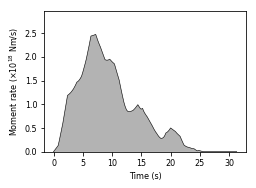

In [588]:
model=np.loadtxt('modellist.txt', dtype=int, usecols=0)
for i in np.arange(0, 1, 1):
    fig=plt.figure(figsize=figsize)
    ax=fig.add_axes([0.1, 0.1, 0.5, 0.35])
    data=np.loadtxt('model_'+str(model[i])+'/st_'+str(model[i])+'.dat')
    t, amp=data[:,0], data[:,1]
    ax.plot(t, amp, color='k', lw=0.5)
    ax.fill(t, amp, color='C7')
    ax.set_ylabel('Moment rate '+r'($\times 10^{18}$ Nm/s)')
    ax.set_xlabel('Time (s)')
    #ax.set_xlim([0, 50])
    ax.set_ylim([0, max(amp)+0.5])
    plt.savefig('st_'+str(model[i])+'.pdf', bbox_inches='tight', pad_inches=0.1, transparent=True)
    plt.savefig('st_'+str(model[i])+'.png', bbox_inches='tight', pad_inches=0.1, transparent=True)
    plt.show()

['IL31' 'KDAK' 'BILL' 'TIXI' 'MA2' 'YAK' 'YSS' 'HIA' 'TLY' 'MDJ' 'KURK'
 'MAJO' 'ULN' 'INU' 'INCN' 'MAKZ' 'BJT' 'WUS' 'ENH' 'HKPS' 'LSA' 'QIZ'
 'CHTO' 'KAPI' 'PSI' 'PALK' 'COCO' 'MSEY' 'ABPO' 'LSZ' 'MBAR' 'LBTB'
 'TSUM' 'SHEL' 'ASCN' 'DBIC' 'TAM' 'MBO' 'SACV' 'MACI' 'PAB' 'ANWB' 'BBSR'
 'DRLN' 'ESK' 'HRV' 'SSPA' 'WCI' 'ALE' 'INK']


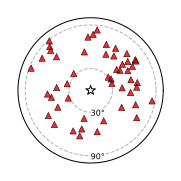

In [637]:
def aziequi(ax, stalist):
    data = np.loadtxt(stalist, usecols=(5, 4))
    d, a = (data[:, 0], 90-data[:,1])
    x, y=(d*np.cos(a*np.pi/180.0), d*np.sin(a*np.pi/180.0))
    sc=ax.scatter(x, y, s=40, marker='^', edgecolor='none', facecolor='r', alpha=0.85)
    sc=ax.scatter(x, y, s=40, marker='^', edgecolor='k', facecolor='none', alpha=1, lw=0.5)
    stalist=np.loadtxt(stalist, usecols=(0), dtype=str)
    print(stalist)
    #for (i, staname) in enumerate(stalist):
        #text = ax.text(x[i], y[i], staname, size=4, va='center')
        #text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='w', alpha=0.85), path_effects.Normal()])
    ax.scatter(0, 0, s=100, marker='*', edgecolor='k', facecolor='none')
    theta=np.linspace(0, 360, 360)
    for i in [30, 90]:
        x, y=(i*np.cos(theta*np.pi/180.0), i*np.sin(theta*np.pi/180.0))
        ax.plot(x, y, color='C7', zorder=0, solid_capstyle='round', lw=1, linestyle='--')
        x, y=(i*np.cos(-90*np.pi/180.0), i*np.sin(-90*np.pi/180.0))
        text = ax.text(x, y, str(i)+'$\degree$', size=initfontsize, va='center')
        text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='w', alpha=1), path_effects.Normal()])

    x, y=(100*np.cos(theta*np.pi/180.0), 100*np.sin(theta*np.pi/180.0))
    ax.plot(x, y, color='k', solid_capstyle='round', lw=1)
    ax.fill(x, y, edgecolor='none', facecolor='w', zorder=0)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_yticks([]) 
    return sc

model=np.loadtxt('modellist.txt', dtype=int, usecols=0)
for k in np.arange(0, 1, 1):
    w = 7.4; h = 7.4; wh=w/h
    fig=plt.figure(figsize=(w, h))
    ax=fig.add_axes([0.1, 0.1, 0.3, 0.3])
    axp=ax.get_position()
    modelid = str(model[k])
    sc = aziequi(ax, 'model_'+modelid+'/station_'+modelid+'.list')
    #sc = aziequi(ax, 'station.list')

    #plt.savefig('fitting_'+str(model[k])+'.png', bbox_inches="tight", pad_inches=0.1)
    #plt.savefig('station_'+str(model[k])+'.pdf', bbox_inches="tight", pad_inches=0.1)
    plt.savefig('station.pdf', bbox_inches="tight", pad_inches=0.1, transparent=True)
    plt.show()

200822022922


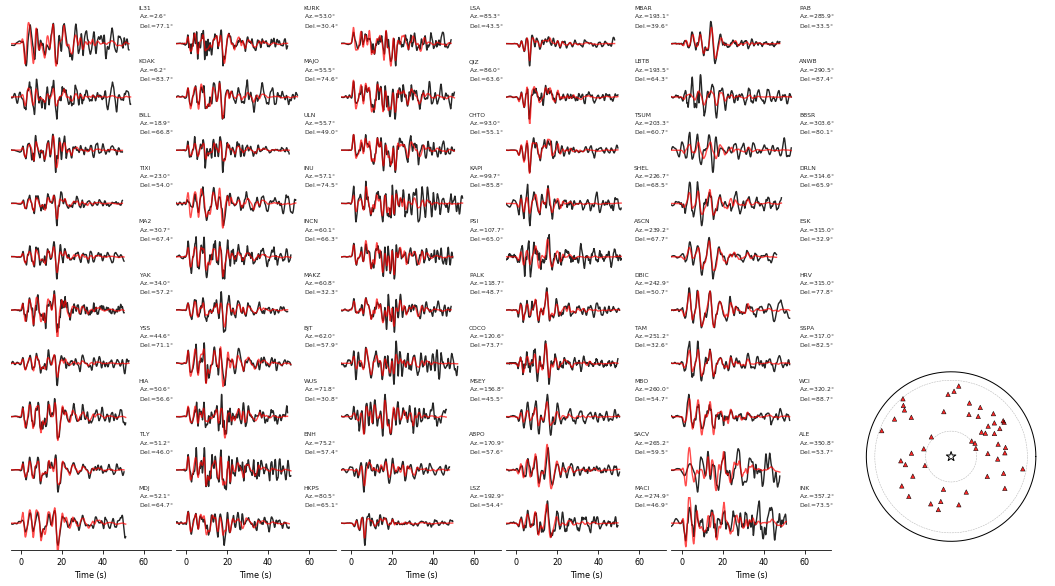

In [143]:
def aziequi(ax, stalist):
    data = np.loadtxt(stalist, usecols=(5, 4))
    d, a = (data[:, 0], 90-data[:,1])
    x, y=(d*np.cos(a*np.pi/180.0), d*np.sin(a*np.pi/180.0))
    sc=ax.scatter(x, y, s=20, marker='^', edgecolor='none', facecolor='r', alpha=0.85)
    sc=ax.scatter(x, y, s=20, marker='^', edgecolor='k', facecolor='none', alpha=1, lw=0.5)
    stalist=np.loadtxt(stalist, usecols=(0), dtype=str)
    #for (i, staname) in enumerate(stalist):
        #text = ax.text(x[i], y[i], staname, size=2, va='center')
        #text.set_path_effects([path_effects.Stroke(linewidth=0.5, foreground='w', alpha=0.85), path_effects.Normal()])
    ax.scatter(0, 0, s=100, marker='*', edgecolor='k', facecolor='none')
    theta=np.linspace(0, 360, 360)
    for i in [30, 90]:
        x, y=(i*np.cos(theta*np.pi/180.0), i*np.sin(theta*np.pi/180.0))
        ax.plot(x, y, color='C7', zorder=0, solid_capstyle='round', lw=0.5, linestyle='--')
    x, y=(100*np.cos(theta*np.pi/180.0), 100*np.sin(theta*np.pi/180.0))
    ax.plot(x, y, color='k', solid_capstyle='round', lw=1)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_yticks([]) 
    return sc

def drawobssyn(ax, obsdata, syndata, alpha):
    data=np.loadtxt(obsdata, usecols=(0, 1))
    t, amp=(data[:,0]-5, data[:,1])
    ax.plot(t, amp, color='C7', lw=0.2, alpha=alpha)
    data=np.loadtxt(syndata, usecols=(0, 1))
    t, amp=(data[:,0]-5, data[:,1])
    ax.plot(t, amp, color='C3', lw=0.2, alpha=alpha)
def fittings(sta, x0, y1, width, height, modelid, dep, mint, maxt, numwave, cmap, maxdepofcolor, flag, azi, dis):
    j=0
    for i in np.arange(0, len(modelid), 1):
        ax=fig.add_axes([x0,y1-height*j,width,height])
        drawobssyn(ax, 'model_'+modelid+'/obssyn/obs_'+sta+'.txt', \
                   'model_'+modelid+'/obssyn/syn_'+sta+'.txt', 0.85)
        cmap=plt.get_cmap('RdYlBu')
        color = cmap(dep[i]/maxdepofcolor)
        if flag == 1:
            ax.scatter(mint, 0, s=20, marker='*', edgecolor='C7', lw=0.3, zorder=20, color=color, clip_on=False)
            #ax.text(-5, -0.3, r'$h_{0}$='+str('%.1f' % dep[i]), ha='left', va='top', size=6, color='C7')
        ax.set_xlim([mint, maxt])
        ax.set_ylim([-1, 1])
#        ax.plot([0, 0],[-1, 1], lw=0.1)
        if i==0:
            ax.text(mint, 1, sta+'\nAz.='+str(azi)+'$\degree$\nDel.='+str(dis)+'$\degree$', \
                    va='bottom', ha='left', size=6, color='C7', clip_on=False)
        #if i==numwave-1:
        if i==12:
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(True)
            ax.spines['left'].set_visible(False)
            ax.set_xticks([0, 30, 60])
            ax.set_xticklabels([0, 30, 60], size=6)
            ax.set_xlabel('Time (s)', size=6)
            ax.set_yticklabels([])
            ax.set_yticks([])
        else:
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.set_xticks([])
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            ax.set_yticks([])
        j+=1
    return ax, cmap

model=np.loadtxt('modellist.txt', dtype=int, usecols=0)
for k in np.arange(0, 1, 1):
    w = 7.4; h = 7.4; wh=w/h
    fig=plt.figure(figsize=(w, h))
    modelid=str(model[k])
    print(modelid)
    alpha=0.85
    axw=0.3
    axh=0.1
    stalist=np.loadtxt('model_'+str(model[k])+'/station_'+str(model[k])+'.list', usecols=(0), dtype=str)
    stadata=np.loadtxt('model_'+str(model[k])+'/station_'+str(model[k])+'.list', usecols=(4, 5))
    datalen = np.loadtxt('model_'+str(model[k])+'/'+str(model[k])+'.station.abic', skiprows=1, usecols=5)
    #datalen = np.loadtxt('.station.abic', skiprows=1, usecols=5)
    maxdatalen = max(datalen)
    azi, dis=(stadata[:,0], stadata[:,1])
    for i in np.arange(0, len(stalist), 1):
        num = 10
        mod = i // num
        if i == 0:
            ax=fig.add_axes([0.1, 0.1, axw, axh])
            axp=ax.get_position()
            axp0=ax.get_position()
            #fig.text(axp.x0, axp.y1+0.03, str(pwd)+', '+modelid, va='bottom', ha='left')
        elif i == num*(mod):
            ax=fig.add_axes([axp0.x1+axw*(mod-1)+0.01*(mod), axp0.y0, axw, axh])
            axp=ax.get_position()
        elif i > num*(mod) and i < num*(mod+1):
            ax=fig.add_axes([axp.x0, axp.y0-axh, axw, axh])
            axp=ax.get_position()

        if i == num*(mod+1)-1:
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(True)
            ax.spines['left'].set_visible(False)
            #ax.set_xticks(np.arange(0, 80, 20))
            #ax.set_xticklabels(np.arange(0, 80, 20), size=8)
            ax.set_xlabel('Time (s)', size=8)
            ax.set_yticklabels([])
            ax.set_yticks([])
            axpbottom = ax.get_position()
        else:
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.set_xticks([])
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            ax.set_yticks([]) 

        sta=stalist[i]
        obsdata='model_'+modelid+'/obssyn/obs_'+sta+'.txt'
        syndata='model_'+modelid+'/obssyn/syn_'+sta+'.txt'

        data=np.loadtxt(obsdata, usecols=(0, 1))
        t, amp=(data[:,0]-5, data[:,1])
        ax.plot(t, amp, color='k', lw=1.4, alpha=alpha)
        data=np.loadtxt(syndata, usecols=(0, 1))
        t, amp=(data[:,0]-5, data[:,1])
        ax.plot(t, amp, color='r', lw=1.4, alpha=0.7)
        fig.text(axp.x1-0.06, axp.y1+0.02, sta+'\nAz.='+str(azi[i])+'$\degree$\nDel.='+str(dis[i])+'$\degree$', \
                            va='top', ha='left', size=6, color='k', clip_on=False, alpha=alpha)
        ax.set_ylim([-1.2, 1.2])
        ax.set_xlim([-5, maxdatalen+10])
        
    ax=fig.add_axes([axp.x1+0.05, axpbottom.y0, 0.35, 0.35])
    axp=ax.get_position()
    sc = aziequi(ax, 'model_'+modelid+'/station_'+modelid+'.list')

    #plt.savefig('fitting_'+str(model[k])+'.png', bbox_inches="tight", pad_inches=0.1)
    plt.savefig('fitting_'+str(model[k])+'.pdf', bbox_inches="tight", pad_inches=0.1)
    plt.show()

In [168]:
arrivals = model.get_ray_paths(source_depth_in_km=0.0, distance_in_degree=100)
print(arrivals[0])
print(arrivals[0].takeoff_angle)

Pdiff phase arrival at 827.021 seconds
13.408311367558841


ValueError: Unknown projection 'stereonet'

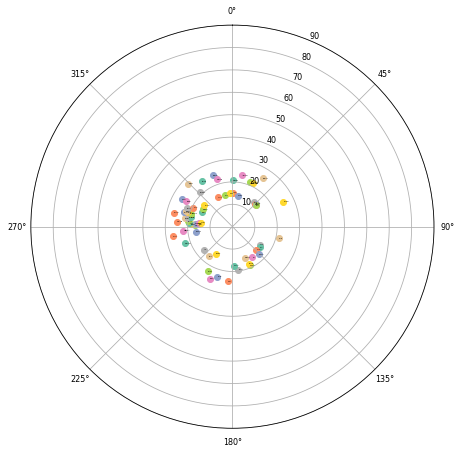

In [179]:
from obspy.taup import TauPyModel
model = TauPyModel(model="ak135")

stdata = np.loadtxt('model_200620212135/station_200620212135.list', usecols=(4,5))
stdis, stazi = stdata[:,1], stdata[:,0]
stname = np.loadtxt('model_200620212135/station_200620212135.list', usecols=(0), dtype=str)

fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1], projection='polar')

for j in range(len(stdis)):
    arrivals = model.get_ray_paths(source_depth_in_km=10.0, distance_in_degree=stdis[j], phase_list=['P'])
    theta = stazi[j] * np.pi/180
    r = arrivals[0].takeoff_angle
    ax.scatter(theta, r)
    ax.text(theta, r, stname[j], size=2)
    
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_rmax(90)

ax = fig.add_subplot([0, 0, 1, 1], projection='stereonet')
ax.plane(26, 74, c='b', label='Bedding %03d/%02d' % (strike1, dip1))

plt.savefig('test.pdf', bbox_inches="tight", pad_inches=0.1)

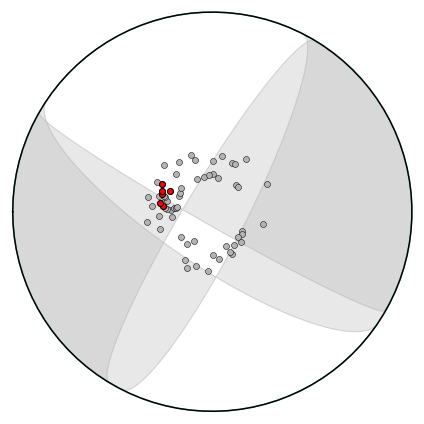

In [124]:
fig = plt.figure(figsize=figsize)
ax = fig.add_axes([0, 0, 1, 1])

from obspy.taup import TauPyModel
model = TauPyModel(model="ak135")

stdata = np.loadtxt('station.list', usecols=(4,5))
stdis, stazi = stdata[:,1], stdata[:,0]
stname = np.loadtxt('station.list', usecols=(0), dtype=str)
pe=([path_effects.Stroke(linewidth=1, foreground='w', alpha=0.95), path_effects.Normal()])

for j in range(len(stdis)):
    arrivals = model.get_ray_paths(source_depth_in_km=10.0, distance_in_degree=stdis[j], phase_list=['P'])
    azi = stazi[j]
    take_off = arrivals[0].takeoff_angle
    r = 1.0 * np.sqrt(1-np.cos(take_off*np.pi/180))
    x = r * np.cos((90-azi)*np.pi/180) 
    y = r * np.sin((90-azi)*np.pi/180) 
    ax.scatter(x, y, facecolor='C7', edgecolor='k', lw=0.5)
    
    if stname[j] == 'DAV' or stname[j] == 'PLAI' or stname[j] == 'FAKI' or stname[j] == 'BNDI' or stname[j] == 'GENI' or stname[j] == 'SOEI':
        ax.scatter(x, y, facecolor='r', edgecolor='k', zorder=100)
        #ax.text(x, y, stname[j], size=8, zorder=200, ha='left', va='top').set_path_effects(pe)

azi = np.linspace(-np.pi, np.pi, 100)
x = np.cos(azi)
y = np.sin(azi)
ax.plot(x, y)
    
ax.plot(x, y, color='k')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

#focmecs=[mrr, mtt, mpp, mrt, mrp, mtp]
usgs = [211, 78, 6]
gcmt = [124, 66, -163]
scardec = [21, 72, -44]
geofon = [126, 67, -148]
normal = [200, 50, -90]

ax = plt.gca()
#for np1 in [ usgs, gcmt, scardec, geofon ]:
for np1 in [ usgs, gcmt ]:
    b = beach(np1, xy=(0, 0), width=2, linewidth=1, facecolor='C7', edgecolor='C7', bgcolor='none')
    b.set_zorder(0); b.set_alpha(0.3); b.set_clip_on(True)
    ax.add_collection(b)

#ax.set_xlim([-0.4, 0.4])
#ax.set_ylim([-0.4, 0.4])
ax.set_xlim([-1.01, 1.01])
ax.set_ylim([-1.01, 1.01])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_yticks([]) 

plt.savefig('polarity.pdf', bbox_inches="tight", pad_inches=0.1)

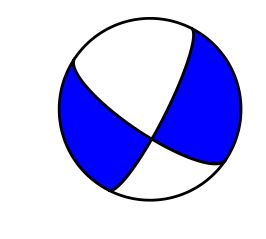

In [235]:
from obspy.imaging.beachball import beachball
np1 = [124, 66, -163]
fig = beachball(np1)  

## Figure 4

200622203200


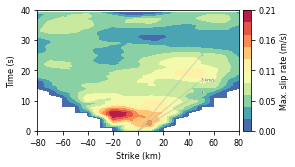

200622195838


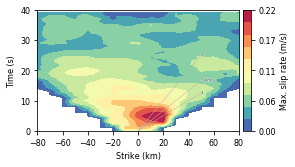

In [591]:
model=np.loadtxt('modellist.txt', dtype=int, usecols=0)
for i in [0,1]:
    print(str(model[i]))
    data=np.loadtxt('model_'+str(model[i])+'/slip-rate-time_along_strike.txt', skiprows=1)
    t, x, amp = data[:,0], data[:,1], data[:,3]
    xs=np.linspace(min(x), max(x), 1000)
    ys=np.linspace(min(t), max(t), 1000)
    X, Y = np.meshgrid(xs, ys)
    Z = griddata((x, t), amp, (X, Y),'linear')
    levels = np.linspace(0, max(amp), 11)

    fig=plt.figure(figsize=figsize)
    ax=fig.add_axes([0.1, 0.1, 0.5, 0.3])
    axp=ax.get_position()

    sc = ax.contourf(X, Y, Z, levels=levels, cmap='Spectral_r', vmin=0, vmax=max(amp))

    #ax.axvspan(bx[0], bx[1], edgecolor='none', facecolor='k', zorder=10, alpha=0.2)
    #ax.text(bx[1] - (bx[1]-bx[0])/2, 40.5, 'B1', va='bottom', ha='center', color='k', size=6, weight='bold')
    #ax.axvspan(bx[2], bx[3], edgecolor='none', facecolor='C2', zorder=10, alpha=0.2)
    #ax.text(bx[3] - (bx[3]-bx[2])/2, 40.5, 'Palu bay', va='bottom', ha='center', color='k', size=6, weight='bold')
    #ax.axvspan(bx[4], bx[5], edgecolor='none', facecolor='k', zorder=10, alpha=0.2)
    #ax.text(bx[5] - (bx[5]-bx[4])/2, 40.5, 'B2', va='bottom', ha='center', color='k', size=6, weight='bold')

    for j in np.arange(2, 5, 1):
        x0, x1 = 0, 50
        y0, y1 = 0, abs((x1-x0)/j)
        ax.plot([x0, x1], [y0, y1], color='C7', lw=1, alpha=0.5)
        if j == 3:
            text=ax.text(x1, y1, str(j)+' km/s', alpha=0.5, size=4, color='k', ha='left', va='center', zorder=10)     
        else:
            text=ax.text(x1, y1, str(j), alpha=0.5, size=4, color='k', ha='left', va='center', zorder=10)
        text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='w', alpha=0.5), path_effects.Normal()])
        
    #pick_t = []
    #pick_x = []
    #for j in np.arange(0, 40, 1):
    #    tmpamp = [amp[i] for i in range(len(amp)) if t[i] == j]
    #    tmpx = [x[i] for i in range(len(amp)) if t[i] == j]
    #    tmpt = [t[i] for i in range(len(amp)) if t[i] == j]
    #    pick_t.append(tmpt[0])
    #    pick_x.append(tmpx[np.argmax(tmpamp)])
    #ax.plot(pick_x, pick_t, color='C0', label='Slip-rate ridge', lw=0.5)

    #plt.legend(loc='lower left', fontsize=4)

    ax.set_xlabel('Strike (km)')
    ax.set_ylabel('Time (s)')
    #ax.set_xticks(np.arange(-180, 120, 30))
    ax.set_xlim(min(x), max(x))
    ax.set_ylim(0, max(t)+1)
    axp=ax.get_position()
    cbar_ax=fig.add_axes([axp.x1+0.01, axp.y0, 0.02, axp.y1-axp.y0])
    cbar=plt.colorbar(sc, cax=cbar_ax, label='Max. slip rate (m/s)', ticks=np.linspace(0, max(amp), 5), format='%.2f')
    plt.savefig('evo_'+str(model[i])+'.png', bbox_inches="tight", pad_inches=0.1)
    plt.show()

## Figure 5

190830175253
t = 1 s
t = 8 s
t = 11 s
t = 14 s
t = 17 s
t = 18 s
t = 21 s
t = 24 s
t = 27 s
t = 28 s
t = 31 s
t = 34 s
t = 37 s


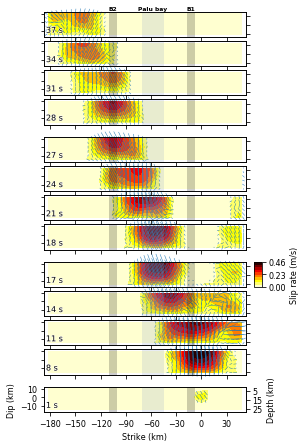

In [29]:
model=np.loadtxt('modellist.txt', dtype=int, usecols=0)
for j in np.arange(4, 5, 1):
    print(str(model[j]))
    maxsliprateall = np.loadtxt('model_'+str(model[j])+'/snap_1s_201.txt', usecols=8, skiprows=1)[0]
    lines=linecache.getlines('model_'+str(model[j])+'/fort.40')
    fort40=np.genfromtxt('model_'+str(model[j])+'/fort.40', skip_header=3, skip_footer=len(lines)-4)
    model_str, model_dip=fort40[0], fort40[1]

    fig=plt.figure(figsize=(5.6, 5.6))
    for snap in [1, 8, 11, 14, 17, 18, 21, 24, 27, 28, 31, 34, 37]:
        print('t =', snap, 's')
        data=np.loadtxt('model_'+str(model[j])+'/snap_1s_'+str(200+snap)+'.txt', skiprows=1)
        x, y, dep, avesliprate, maxsliprate=data[:,0], data[:,1], data[:,2], data[:,3], data[:,4]
        strike, dip, rake=data[:,9], data[:,10], data[:,11]

        xi=np.linspace(min(x)-2.5, max(x)+2.5, 100)
        yi=np.linspace(min(y)-2.5, max(y)+2.5, 100)
        X, Y=np.meshgrid(xi, yi)
        zi=griddata((x, y), avesliprate, (X, Y),'linear')
        interval=np.linspace(0, maxsliprateall, 11)
        
        axw=0.5
        axh=(max(yi)-min(yi)) / (max(xi)-min(xi)) * axw
        xloc=0.1
        if snap == 1:
            yloc = 0.1
        elif snap == 8:
            yloc=axp.y1 + 0.03
        elif snap == 18:
            yloc=axp.y1 + 0.03
        elif snap == 28:
            yloc=axp.y1 + 0.03
        else:
            yloc=axp.y1 + 0.01

        ax=fig.add_axes([xloc,yloc,axw,axh])
        axp=ax.get_position()
        note=str(int(data[0:1,7][0])) + ' s'
        text=fig.text(axp.x0+0.005, axp.y0+0.005, note, va='bottom', ha='left', size=8)
        text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='w'), path_effects.Normal()])
        sc=ax.contourf(X, Y, zi, interval, vmin=0, vmax=maxsliprateall, cmap='hot_r')

        if j < 6:
            for k in np.arange(0, len(strike), 1):
                a=0.5*np.pi - strike[k]*np.pi/180.0
                length=avesliprate[k]/2.0*60
                x1=x[k]+np.cos(a)*length
                y1=y[k]+np.sin(a)*length
                x2=x[k]+np.cos(-(np.pi - a))*length
                y2=y[k]+np.sin(-(np.pi - a))*length
                if avesliprate[k] > 0:
                    ax.plot([x1, x2], [y1, y2], alpha=1, lw=0.5, clip_on=False, color='#1f77b4')        
        axp0=ax.get_position()
        ax2 = ax.twinx()
        depmin=h0-np.sin(model_dip*np.pi/180.0)*min(yi)
        depmax=h0-np.sin(model_dip*np.pi/180.0)*max(yi)
        ax2.set_yticks(np.arange(-5, 40, 10))
        ax2.set_ylim(depmin, depmax)

        if snap == 1:
            ax.set_xlabel('Strike (km)')
            ax.set_ylabel('Dip (km)')
            ax2.set_ylabel('Depth (km)')

        else:
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            ax2.set_xticklabels([])
            ax2.set_yticklabels([])

        ax.set_xticks(np.arange(-180, 180, 30))
        ax.set_xlim(min(xi), max(xi))
        ax.set_ylim(min(yi), max(yi))
        
        ax.axvspan(bx[0], bx[1], edgecolor='none', facecolor='k', zorder=10, alpha=0.2)
        ax.axvspan(bx[2], bx[3], edgecolor='none', facecolor='C2', zorder=10, alpha=0.2)
        ax.axvspan(bx[4], bx[5], edgecolor='none', facecolor='k', zorder=10, alpha=0.2)
        if snap == 37:
            ax.text(bx[1] - (bx[1]-bx[0])/2, 13, 'B1', va='bottom', ha='center', color='k', size=6, weight='bold')
            ax.text(bx[3] - (bx[3]-bx[2])/2, 13, 'Palu bay', va='bottom', ha='center', color='k', size=6, weight='bold')
            ax.text(bx[5] - (bx[5]-bx[4])/2, 13, 'B2', va='bottom', ha='center', color='k', size=6, weight='bold')

        if snap == 17:
            axp0=ax.get_position()
            cax=fig.add_axes([axp0.x1+0.02, axp0.y0, 0.02, axp0.y1-axp0.y0])
            cbar=plt.colorbar(sc, cax=cax, ticks=np.linspace(0, maxsliprateall, 3), \
                              format='%.2f', label='Slip rate (m/s)')
    
    plt.savefig('../pubFigure/figure5.png', bbox_inches='tight', pad_inches=0.1)
    plt.savefig('../pubFigure/figure5.pdf', bbox_inches='tight', pad_inches=0.1)
    plt.show()

## Figure 6

190830175253


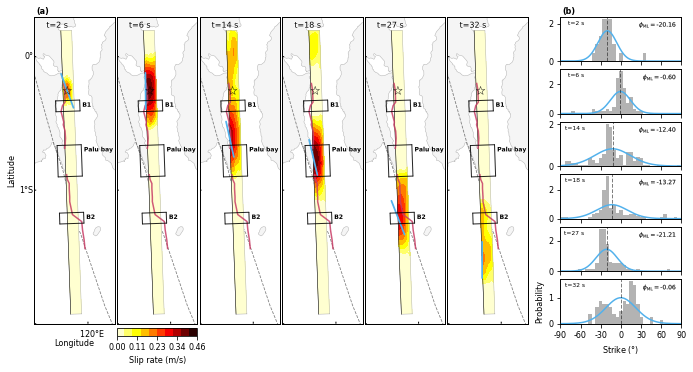

In [30]:
model=np.loadtxt('modellist.txt', dtype=int, usecols=0)
data=np.loadtxt('epicenter.dat')
elon, elat=(data[1], data[0])
j = 4 # main model
print(str(model[j]))
m_mllist = []; m_mllist_weight = []
latlist = []
figlocind = 0
figlochori = 0

fig=plt.figure(figsize=figsize)
for panel in [2, 6, 14, 18, 27, 32]:
    data=np.loadtxt('model_'+str(model[j])+'/snap_1s_'+str(200+panel)+'.txt', skiprows=1)
    lon, lat, slip = data[:,13], data[:,14], data[:,4]
    strike = data[:,9]; maxslip = data[0,8]
    argmaxslip = np.argmax(slip)
    latlist.append(lat[argmaxslip])
    tmp = []; slipHist = []
    for i in range(len(strike)):
        tmp0 = strike[i]
        if tmp0 > 88 and tmp0 < 268:
            tmp0 = tmp0 + 180
        if slip[i] > 0:
            tmp.append(tmp0)
            slipHist.append(slip[i])
    for i in range(len(tmp)):
        if tmp[i] > 180:
            tmp[i] = tmp[i] - 360
        
    tmp = np.array(tmp)
    theta = tmp * np.pi/180.0
    theta_ml = calc_theta_ml(theta)
    A_m_ml = calc_A_m_ml(theta, theta_ml)
    m_ml_scipy = search_m_ml_scipy(A_m_ml, 1.0)
    
    if panel == 1 or panel == 11 or panel == 21 or panel == 31:
        figlocind = 1
        figlochori += 1
        
    initialyloc = 0.8616710895255245 - 0.1102785149
    ax=fig.add_axes([1.3250000000000002 + 0.08, initialyloc - 0.1302785149 * (figlocind), 0.3, 0.1102785149])
    figlocind += 1
    axp=ax.get_position()
    ax2 = ax.twiny()

    bins=np.linspace(-np.pi, np.pi, 72)
    ax2.hist(theta, density=True, bins=bins, color='C7')
    x = np.linspace(-np.pi, np.pi, 1000)
    ax2.plot(x, vonmises.pdf(x, m_ml_scipy, loc=theta_ml), color='#52b1ec', lw=1.5)
    ax2.axvline(theta_ml, color='k', linestyle='--', lw=1, zorder=10, alpha=0.5)
    
    ## Numpy style weight
    #w_hist, bin_edges = np.histogram(theta, bins=bins, density=True, weights=slipHist)
    #x = [ (bin_edges[i-1]+bin_edges[i])/2 for i in range(1, len(bin_edges)) ]
    #ax2.bar(x, w_hist, color='C7', width=0.085)

    #tmp_ml = calc_theta_ml_numpyHist(x, w_hist)
    #tmp_A_m_ml = calc_A_m_ml_numpyHist(x, w_hist, tmp_ml)
    #tmp_m_ml_scipy = search_m_ml_scipy(tmp_A_m_ml, 1.0)
    #x = np.linspace(-np.pi, np.pi, 1000)
    #ax2.plot(x, vonmises.pdf(x, tmp_m_ml_scipy, loc=tmp_ml), color='#52b1ec', lw=1)
    #ax2.axvline(tmp_ml, color='k', linestyle='--', lw=1, zorder=100, alpha=0.5)
    ##
    
    ax2.set_xlim(-np.pi / 2, np.pi / 2)
    ax2.set_xticklabels([])
    ax2.set_xticks([])

    xdeg=np.arange(-90, 90+30, 30)
    ax.set_xticks(xdeg)
    ax.set_xticklabels([])
    if panel == 32:
        ax.set_xlabel('Strike ($\degree$)')
        ax.set_ylabel('Probability')
        ax.set_xticklabels(xdeg)
    tmp1 = theta_ml*180/np.pi
    m_mllist.append(tmp1)
    #tmp2 = tmp_ml*180/np.pi
    #m_mllist_weight.append(tmp2)
    textbody = r'$\phi_{\rm{ML}}=$'+'{:1.2f}'.format(tmp1)
    #textbody2 = r'$\phi_{\rm{ML}}=$'+'{:1.2f}'.format(tmp2)
    fig.text(axp.x0+0.06, axp.y1-0.01, 't='+str(panel)+' s', va='top', ha='right', size=6)
    text = fig.text(axp.x1-0.01, axp.y1-0.01, textbody, va='top', ha='right', size=6)
    text.set_path_effects([path_effects.Stroke(linewidth=0.5, foreground='w', alpha=0.85), path_effects.Normal()])
    #text = fig.text(axp.x1-0.01, axp.y1-0.01, textbody2, va='top', ha='right', size=6)
    #text.set_path_effects([path_effects.Stroke(linewidth=0.5, foreground='w', alpha=0.85), path_effects.Normal()])
    if panel == 2:
        axp = ax.get_position()
        fig.text(axp.x0+0.005, axp.y1+0.001, '(b)', ha='left', va='bottom', weight='bold')
############################################################################
model=np.loadtxt('modellist.txt', dtype=int, usecols=0)
strike_flag=0; slip_flag=0; beach_flag=0
fignums = ['(a)', '(b)', '(c)']
data=np.loadtxt('epicenter.dat')
elon, elat=(data[1], data[0])
lonmin=119.6; lonmax=120.2; latmin=-2; latmax=0.3
m=Basemap(llcrnrlon=lonmin,llcrnrlat=latmin,urcrnrlon=lonmax,urcrnrlat=latmax,\
          rsphere=(6378137.00,6356752.3142),resolution='h',projection='merc')
x, y=m([lonmin, lonmax], [latmin, latmax])
aspect=max(x)/max(y)
mapwidth=0.2; mapheight=mapwidth/aspect
j = 4 # main model
data=np.loadtxt('model_'+str(model[j])+'/FFM_DCpreferred.txt', skiprows=1)
lon, lat, slip, strike, dip, rake=data[:,2], data[:,3],data[:,1], data[:,7], data[:,8],data[:,9]
xloc, yloc = data[:,10], data[:,11]
data=np.loadtxt('model_'+str(model[j])+'/knot_value_'+str(model[j])+'.dat_rim', usecols=(2, 3))
limlon, limlat, limlontop, limlattop=data[:,1], data[:,0], data[2:4,1], data[2:4,0]

cmap=plt.get_cmap('hot_r')

dataInSARnorth=np.loadtxt('Bao+2019NatGeosci/Rupture_pick_ALOS2_A126-A127_azoff_north.gmt', comments='#')
dataInSARsouth=np.loadtxt('Bao+2019NatGeosci/Rupture_pick_ALOS2_A126-A127_azoff_south.gmt', comments='#')
#snapind = [202, 206, 214, 218, 227, 232]
timeind = [2, 6, 14, 18, 27, 32]
for panel in [0, 1, 2, 3, 4, 5]:
    ax=fig.add_axes([0.1+(mapwidth + 0.005)*panel, 0.1, mapwidth, mapheight])
    axp=ax.get_position()
    text = fig.text(axp.x0+0.03, axp.y1-0.01, 't='+str(timeind[panel])+' s', ha='left', va='top')
    text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='w', alpha=1), path_effects.Normal()])
    m.drawmapboundary(fill_color='#f5f5f5')
    m.fillcontinents(color='w')
    if panel == 0:
        m.drawparallels(np.arange(-80.,81.,1),labels=[1,0,0,0], fontsize=initfontsize, \
                    dashes=(2,10000), color='k')        
        m.drawmeridians(np.arange(-180.,181.,0.5),labels=[0,0,0,0], fontsize=initfontsize, \
                    dashes=(2,10000), color='k')
        ax.set_xlabel('Longitude', labelpad=18)
        fig.text(axp.x0+0.11, axp.y0-0.01, '120$\degree$E', va='top')        
        axp = ax.get_position()
        fig.text(axp.x0+0.005, axp.y1+0.001, '(a)', ha='left', va='bottom', weight='bold')

        ax.set_ylabel('Latitude', labelpad=18)
        ax.set_xlabel('Longitude', labelpad=15)
    else:
        m.drawparallels(np.arange(-80.,81.,1),labels=[0,0,0,0], fontsize=initfontsize, \
                    dashes=(2,10000), color='k')        
        m.drawmeridians(np.arange(-180.,181.,0.5),labels=[0,0,0,0], fontsize=initfontsize, \
                    dashes=(2,10000), color='k')
    m.drawcoastlines(color='C7', linewidth=0.5, zorder=2)

    x, y=m(limlon, limlat)
    ax.plot(x, y, color='C7', zorder=50, lw=0.5, solid_joinstyle='miter')
    x, y=m(limlontop, limlattop)
    ax.plot(x, y, color='k', zorder=50, lw=0.5)

    ax = plt.gca()

    snapind = str(int(200+timeind[panel]))
    data=np.loadtxt('model_'+str(model[j])+'/snap_1s_'+snapind+'.txt', skiprows=1)
    lon, lat, slip = data[:,13], data[:,14], data[:,4]
    strike = data[:,9]
    maxslip = data[0,8]
    argmaxslip = np.argmax(slip)
    xi=np.linspace(lon.min(), lon.max(), 1000)
    yi=np.linspace(lat.min(), lat.max(), 1000)
    X,Y= np.meshgrid(xi,yi)
    X, Y=m(X, Y)
    m_lon, m_lat = m(*(lon, lat))
    resampled=griddata((m_lon, m_lat), slip, (X, Y),'linear')
    interval = np.linspace(0, maxslip, 11)
    sc=ax.contourf(X, Y, resampled, interval, cmap=cmap, vmin=0, vmax=maxslip, zorder=10, alpha=1)

    x, y=m(elon, elat)
    ax.scatter(x, y, s=80, marker='*', facecolor='none', edgecolor='k', alpha=0.8, zorder=101, lw=0.5)
    
    x, y =m(dataInSARnorth[:,0], dataInSARnorth[:,1])
    ax.plot(x, y, color='#c83c65', lw=1.5, alpha=0.85, zorder=100, label='Surface-rupture trace (Bao et al. 2019)')
    x, y =m(dataInSARsouth[:,0], dataInSARsouth[:,1])
    ax.plot(x, y, color='#c83c65', lw=1.5, alpha=0.85, zorder=100)

    data=np.loadtxt('Belleir2006Tectono_PKF_MF_traced.txt', comments='#')
    sx, sy = 49.35, 49.277
    tmplon, tmplat = data[:,0] / sx + 119.0, - data[:,1] / sy
    tmplon = np.insert(tmplon, 0, 119.346)
    tmplat = np.insert(tmplat, 0, 0.834)
    x, y=m(tmplon, tmplat)
    ax.plot(x, y, zorder=2, lw=0.8, color='k', alpha=0.5, linestyle='--', 
            label='Palu-Koro fault (Bellier et al. 2006)')

    arrow_params = {'shape': 'full', 'overhang':0.5, 'head_width':0, 'head_length':0}
    '''
    for pm in [0, 180]:
        a = strike[argmaxslip] + pm
        g = geod.Direct(lat[argmaxslip], lon[argmaxslip], a, 20*1e3)
        x, y = m(lon[argmaxslip], lat[argmaxslip])
        ax.scatter(x, y, s=2, color='C0', zorder=100)
        spoint = [x, y]
        x, y = m(g['lon2'], g['lat2'])
        epoint = [x, y]
        ax.arrow(spoint[0], spoint[1], epoint[0]-spoint[0], epoint[1]-spoint[1], 
                 **arrow_params, color='C0', lw=1.5, zorder=100, alpha=0.85)
    '''
    for pm in [0, 180]:
        a = m_mllist[panel] + pm
        g = geod.Direct(lat[argmaxslip], lon[argmaxslip], a, 15*1e3)
        x, y = m(lon[argmaxslip], lat[argmaxslip])
        #ax.scatter(x, y, s=2, color='#52b1ec', zorder=10000)
        spoint = [x, y]
        x, y = m(g['lon2'], g['lat2'])
        epoint = [x, y]
        ax.plot([spoint[0], epoint[0]], [spoint[1], epoint[1]], color='#52b1ec', lw=1.75, zorder=100, alpha=1, solid_capstyle='round')

    ## Numpy style weight
    #for pm in [0, 180]:
    #    a = m_mllist_weight[panel] + pm
    #    g = geod.Direct(lat[argmaxslip], lon[argmaxslip], a, 15*1e3)
    #    x, y = m(lon[argmaxslip], lat[argmaxslip])
    #    #ax.scatter(x, y, s=2, color='#52b1ec', zorder=10000)
    #    spoint = [x, y]
    #    x, y = m(g['lon2'], g['lat2'])
    #    epoint = [x, y]
    #    #ax.arrow(spoint[0], spoint[1], epoint[0]-spoint[0], epoint[1]-spoint[1], 
    #    #         **arrow_params, color='#52b1ec', lw=1.75, zorder=100, alpha=1)
    ##
        
    bend_index = 0
    for k, distance in enumerate(bx):
        g=geod.Direct(elat, elon, 358.0, distance*1e3)
        gx, gy = m(g['lon2'], g['lat2'])
        g_p=geod.Direct(g['lat2'], g['lon2'], 358.0-90.0, 10.0*1e3)
        g_m=geod.Direct(g['lat2'], g['lon2'], 358.0-90.0, -10.0*1e3)
        glon = g_p['lon2'], g_m['lon2']
        glat = g_p['lat2'], g_m['lat2']
        gx, gy = m(glon, glat)
        ax.plot(gx, gy, color='k', linewidth=1, alpha=0.85, zorder=100, solid_capstyle='round')
        if k%2 == 0:
            g=geod.Direct(g_m['lat2'], g_m['lon2'], 358.0, -(bx[k]-bx[k+1])*1e3)
            glon = g['lon1'], g['lon2']
            glat = g['lat1'], g['lat2']
            gx, gy = m(glon, glat)
            ax.plot(gx, gy, color='k', linewidth=1, alpha=0.85, zorder=100, solid_capstyle='round')
            x, y = m(g['lon1']+0.02, g['lat1']-0.02)
            if distance >= -69 and distance <= -45:
                text=ax.text(x, y, 'Palu bay', size=6, weight='bold', color='k', va='top', ha='left')
                text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='w'), path_effects.Normal()])
            else:
                bend_index += 1
                text=ax.text(x, y, 'B'+str(bend_index), size=6, weight='bold', color='k', va='top', ha='left')
                text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='w'), path_effects.Normal()])
            g=geod.Direct(g_p['lat2'], g_p['lon2'], 358.0, -(bx[k]-bx[k+1])*1e3)
            glon = g['lon1'], g['lon2']
            glat = g['lat1'], g['lat2']
            gx, gy = m(glon, glat)
            ax.plot(gx, gy, color='k', linewidth=1, alpha=0.85, zorder=1020, solid_capstyle='round')

    if panel == 1:
        cax=fig.add_axes([axp.x0, axp.y0-0.03, axp.x1-axp.x0, 0.02])
        cbar=plt.colorbar(sc, cax=cax, ticks=np.linspace(0, maxslip, 5), format='%.2f', label='Slip rate (m/s)', orientation='horizontal')
plt.savefig('../pubFigure/figure6.png', bbox_inches='tight', pad_inches=0.1)
plt.savefig('../pubFigure/figure6.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

## Figure S1

In [156]:
def aziequi(ax, stalist):
    data = np.loadtxt(stalist, usecols=(5, 4))
    d, a = (data[:, 0], 90-data[:,1])
    x, y=(d*np.cos(a*np.pi/180.0), d*np.sin(a*np.pi/180.0))
    sc=ax.scatter(x, y, s=20, marker='^', edgecolor='none', facecolor='r', alpha=0.85)
    sc=ax.scatter(x, y, s=20, marker='^', edgecolor='k', facecolor='none', alpha=1, lw=0.2)
    stalist=np.loadtxt(stalist, usecols=(0), dtype=str)
    #for (i, staname) in enumerate(stalist):
        #text = ax.text(x[i], y[i], staname, size=2, va='center')
        #text.set_path_effects([path_effects.Stroke(linewidth=0.5, foreground='w', alpha=0.85), path_effects.Normal()])
    ax.scatter(0, 0, s=100, marker='*', edgecolor='k', facecolor='none')
    theta=np.linspace(0, 360, 360)
    for i in [30, 90]:
        x, y=(i*np.cos(theta*np.pi/180.0), i*np.sin(theta*np.pi/180.0))
        ax.plot(x, y, color='C7', zorder=0, solid_capstyle='round', lw=0.5, linestyle='--')
    x, y=(100*np.cos(theta*np.pi/180.0), 100*np.sin(theta*np.pi/180.0))
    ax.plot(x, y, color='k', solid_capstyle='round', lw=1)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_yticks([]) 
    return sc

def drawobssyn(ax, obsdata, syndata, alpha):
    data=np.loadtxt(obsdata, usecols=(0, 1))
    t, amp=(data[:,0]-5, data[:,1])
    ax.plot(t, amp, color='C7', lw=0.2, alpha=alpha)
    data=np.loadtxt(syndata, usecols=(0, 1))
    t, amp=(data[:,0]-5, data[:,1])
    ax.plot(t, amp, color='C3', lw=0.2, alpha=alpha)
def fittings(sta, x0, y1, width, height, modelid, dep, mint, maxt, numwave, cmap, maxdepofcolor, flag, azi, dis):
    j=0
    for i in np.arange(0, len(modelid), 1):
        ax=fig.add_axes([x0,y1-height*j,width,height])
        drawobssyn(ax, 'model_'+modelid+'/obssyn/obs_'+sta+'.txt', \
                   'model_'+modelid+'/obssyn/syn_'+sta+'.txt', 0.85)
        cmap=plt.get_cmap('RdYlBu')
        color = cmap(dep[i]/maxdepofcolor)
        if flag == 1:
            ax.scatter(mint, 0, s=20, marker='*', edgecolor='C7', lw=0.3, zorder=20, color=color, clip_on=False)
            #ax.text(-5, -0.3, r'$h_{0}$='+str('%.1f' % dep[i]), ha='left', va='top', size=6, color='C7')
        ax.set_xlim([mint, maxt])
        ax.set_ylim([-1, 1])
#        ax.plot([0, 0],[-1, 1], lw=0.1)
        if i==0:
            ax.text(mint, 1, sta+'\nAz.='+str(azi)+'$\degree$\nDel.='+str(dis)+'$\degree$', \
                    va='bottom', ha='left', size=6, color='C7', clip_on=False)
        #if i==numwave-1:
        if i==12:
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(True)
            ax.spines['left'].set_visible(False)
            ax.set_xticks([0, 30, 60])
            ax.set_xticklabels([0, 30, 60], size=6)
            ax.set_xlabel('Time (s)', size=6)
            ax.set_yticklabels([])
            ax.set_yticks([])
        else:
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.set_xticks([])
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            ax.set_yticks([])
        j+=1
    return ax, cmap

model=np.loadtxt('modellist.txt', dtype=int, usecols=0)
for k in np.arange(4, 5, 1):
    w = 7.4; h = 7.4; wh=w/h
    fig=plt.figure(figsize=(w, h))
    modelid=str(model[k])
    print(modelid)
    alpha=0.85
    axw=0.3
    axh=0.1
    stalist=np.loadtxt('model_'+str(model[k])+'/station_'+str(model[k])+'.list', usecols=(0), dtype=str)
    stadata=np.loadtxt('model_'+str(model[k])+'/station_'+str(model[k])+'.list', usecols=(4, 5))
    azi, dis=(stadata[:,0], stadata[:,1])
    for i in np.arange(0, len(stalist), 1):
        num = 10
        mod = i // num
        if i == 0:
            ax=fig.add_axes([0.1, 0.1, axw, axh])
            axp=ax.get_position()
            axp0=ax.get_position()
            #fig.text(axp.x0, axp.y1+0.03, str(pwd)+', '+modelid, va='bottom', ha='left')
        elif i == num*(mod):
            ax=fig.add_axes([axp0.x1+axw*(mod-1)+0.01*(mod), axp0.y0, axw, axh])
            axp=ax.get_position()
        elif i > num*(mod) and i < num*(mod+1):
            ax=fig.add_axes([axp.x0, axp.y0-axh, axw, axh])
            axp=ax.get_position()

        if i == num*(mod+1)-1:
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(True)
            ax.spines['left'].set_visible(False)
            ax.set_xticks(np.arange(0, 80, 20))
            ax.set_xticklabels(np.arange(0, 80, 20), size=8)
            ax.set_xlabel('Time (s)', size=8)
            ax.set_yticklabels([])
            ax.set_yticks([])
        else:
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.set_xticks([])
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            ax.set_yticks([]) 

        sta=stalist[i]
        obsdata='model_'+modelid+'/obssyn/obs_'+sta+'.txt'
        syndata='model_'+modelid+'/obssyn/syn_'+sta+'.txt'

        data=np.loadtxt(obsdata, usecols=(0, 1))
        t, amp=(data[:,0]-5, data[:,1])
        ax.plot(t, amp, color='k', lw=1.4, alpha=alpha)
        data=np.loadtxt(syndata, usecols=(0, 1))
        t, amp=(data[:,0]-5, data[:,1])
        ax.plot(t, amp, color='r', lw=1.4, alpha=0.7)
        fig.text(axp.x1-0.06, axp.y1+0.02, sta+'\nAz.='+str(azi[i])+'$\degree$\nDel.='+str(dis[i])+'$\degree$', \
                            va='top', ha='left', size=6, color='k', clip_on=False, alpha=alpha)
        ax.set_ylim([-1.2, 1.2])
        ax.set_xlim([-5, 60])
        
    ax=fig.add_axes([axp.x0+0.05, axp.y0-0.2, 0.2, 0.2])
    axp=ax.get_position()
    sc = aziequi(ax, 'model_'+modelid+'/station_'+modelid+'.list')

    plt.savefig('../pubFigure/figureS1.png', bbox_inches="tight", pad_inches=0.1)
    plt.savefig('../pubFigure/figureS1.pdf', bbox_inches="tight", pad_inches=0.1)
    plt.show()

IndexError: index 4 is out of bounds for axis 0 with size 2

<Figure size 532.8x532.8 with 0 Axes>

## Figure S2

190904092511
190904092534


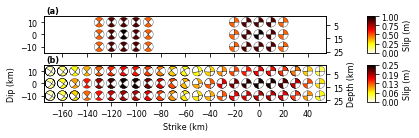

In [6]:
model=np.loadtxt('modellist.txt', dtype=int, usecols=0)

strike_flag = 0
rake_flag = 0
beach_flag = 1
fignums = ['(a)', '(b)', '(c)']
fig=plt.figure(figsize=figsize)

#for j in np.arange(0, 5, 1):
panel = 0
for j in [11, 12]:
    data=np.loadtxt('model_'+str(model[j])+'/FFM_DCpreferred.txt', skiprows=1)
    print(str(model[j]))
    x, y, slip, strike, dip, rake=data[:,10], data[:,11],data[:,1], data[:,7], data[:,8],data[:,9]

    if model[j] == 190904092511 or model[j] == 190904092534:
        xi=np.linspace(min(x)-5, max(x)+5, 100)
        yi=np.linspace(min(y)-5, max(y)+5, 100)
    else:
        xi=np.linspace(min(x)-2.5, max(x)+2.5, 100)
        yi=np.linspace(min(y)-2.5, max(y)+2.5, 100)
    X, Y=np.meshgrid(xi, yi)
    zi=griddata((x, y), slip, (X, Y),'linear')
    maxslip = max(slip)
    interval=np.linspace(0, maxslip, 11)

    axw=0.7
    axh=(abs(max(yi)-min(yi))) / (abs(max(xi)-min(xi))) * axw
    
    ax=fig.add_axes([0.1,0.1 - (axh + 0.03)*panel,axw,axh])
    axp=ax.get_position()
    fig.text(axp.x0+0.005, axp.y1+0.002, fignums[panel], ha='left', va='bottom', weight='bold')

    h0, model_dip, model_icmn, model_str=load_setting_fort40('model_'+str(model[j])+'/fort.40')
    if model_icmn == 2.0:
        flag = 'Fixed'
    else:
        flag = 'Non-fixed'
    note='Model plane (Strike; '+str(model_str)+', Dip; '+str(model_dip)+')'+', '+flag
    #fig.text(axp.x0, axp.y1+0.01, note, va='bottom', ha='left', size=8)

    if model[j] == 190904092511 or model[j] == 190904092534:
        pass
    else: 
        sc=ax.contourf(X, Y, zi, interval, vmin=0, vmax=maxslip, cmap='hot_r')

    if model_icmn == 5:
        cmap=plt.get_cmap('hot_r')
        ax = plt.gca()
        if beach_flag == 1:
            for i in range(len(strike)):
                focmecs=[strike[i], dip[i], rake[i]]
                color=cmap(slip[i]/max(slip))
                if model[j] == 190904092511 or model[j] == 190904092534:
                    if slip[i] > 0:
                        b = beach(focmecs, xy=(x[i], y[i]), width=8, linewidth=0.3, facecolor=color, edgecolor='k', \
                                  bgcolor='w')
                        b.set_zorder(1); b.set_alpha(1); b.set_clip_on(False)
                        ax.add_collection(b)
                else:
                    b = beach(focmecs, xy=(x[i], y[i]), width=5, linewidth=0.3, facecolor=color, edgecolor='k', \
                              bgcolor='w')
                    b.set_zorder(1); b.set_alpha(slip[i]/max(slip)); b.set_clip_on(False)
                    ax.add_collection(b)
        elif strike_flag == 1:
            for k in np.arange(0, len(strike), 1):
                length=slip[k]/maxslip*5.0
                a=0.5*np.pi - strike[k]*np.pi/180.0
                x1=x[k]+np.cos(a)*length
                y1=y[k]+np.sin(a)*length
                x2=x[k]+np.cos(-(np.pi - a))*length
                y2=y[k]+np.sin(-(np.pi - a))*length
                #ax.plot([x1, x2], [y1, y2], alpha=slip[k]/maxslip, lw=1.5, clip_on=False, color='C4', zorder=1000)  #rake angle
                ax.plot([x1, x2], [y1, y2], alpha=slip[k]/maxslip, lw=1.2, clip_on=False, color='#1f77b4', zorder=1000) #strike orientation
        elif rake_flag == 1:
            for i in np.arange(0, len(strike), 1):
                a=rake[i]*np.pi/180.0
                length=slip[i] / maxslip * 15.0
                x1=np.cos(a)*length
                y1=np.sin(a)*length
                spoint = [x[i], y[i]]
                epoint = [x1+x[i], y1+y[i]]
                arrowstyle = ArrowStyle('->', head_length=0.4 * slip[i]/max(slip) * 0.75, head_width=0.2 * slip[i]/max(slip) * 0.5)
                ax.annotate('', xy=epoint, xytext=spoint, 
                            arrowprops=dict(arrowstyle=arrowstyle, color='C2', lw=0.5), annotation_clip=False)


    elif model_icmn == 2:
        for i in np.arange(0, len(strike), 1):
            a=rake[i]*np.pi/180.0
            length=slip[i] / maxslip * 20.0
            x1=np.cos(a)*length
            y1=np.sin(a)*length
            spoint = [x[i], y[i]]
            epoint = [x1+x[i], y1+y[i]]
            arrowstyle = ArrowStyle('->', head_length=0.4 * slip[i]/max(slip) * 0.75, head_width=0.2 * slip[i]/max(slip) * 0.5)
            ax.annotate('', xy=epoint, xytext=spoint, 
                        arrowprops=dict(arrowstyle=arrowstyle, color='C2', lw=0.5), annotation_clip=False)


    ax.set_xticks(np.arange(-180, 180, 20))
    if panel == 0:
        ax.set_xticklabels([])
    if panel == 1:
        ax.set_xlabel('Strike (km)')
    ax.set_xlim(min(xi), max(xi))
    ax.set_ylim(min(yi), max(yi))

    ax2 = ax.twinx()
    depmin=h0-np.sin(model_dip*np.pi/180.0)*min(yi)
    depmax=h0-np.sin(model_dip*np.pi/180.0)*max(yi)
    ax2.set_yticks(np.arange(-5, 40, 10))
    ax2.set_ylim(depmin, depmax)

    if panel == 1:
        ax.set_ylabel('Dip (km)')
        ax2.set_ylabel('Depth (km)')

    cax=fig.add_axes([axp.x1+0.1, axp.y0, 0.02, axp.y1-axp.y0])
    if model[j] == 190904092511 or model[j] == 190904092534:
        bounds = interval
        norm = mpl.colors.Normalize(vmin=0, vmax=max(slip))
        cb1 = mpl.colorbar.ColorbarBase(cax, cmap='hot_r',norm=norm, ticks=np.linspace(0, maxslip, 5), format='%.2f', label='Slip (m)')
    else:
        cbar=plt.colorbar(sc, cax=cax, ticks=np.linspace(0, maxslip, 5), format='%.2f', label='Slip (m)') 
        
    panel += 1

plt.savefig('../pubFigure/figureS2.png', bbox_inches='tight', pad_inches=0.1)
plt.savefig('../pubFigure/figureS2.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

## Figure S3

190827153432
190903103328


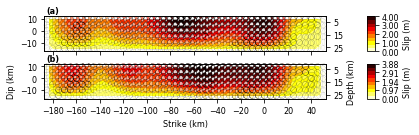

In [31]:
model=np.loadtxt('modellist.txt', dtype=int, usecols=0)

strike_flag = 0
rake_flag = 0
beach_flag = 1
fignums = ['(a)', '(b)', '(c)']
fig=plt.figure(figsize=figsize)

#for j in np.arange(0, 5, 1):
panel = 0
for j in [5, 13]:
    data=np.loadtxt('model_'+str(model[j])+'/FFM_DCpreferred.txt', skiprows=1)
    print(str(model[j]))
    x, y, slip, strike, dip, rake=data[:,10], data[:,11],data[:,1], data[:,7], data[:,8],data[:,9]

    if model[j] == 190904092511 or model[j] == 190904092534:
        xi=np.linspace(min(x)-5, max(x)+5, 100)
        yi=np.linspace(min(y)-5, max(y)+5, 100)
    else:
        xi=np.linspace(min(x)-2.5, max(x)+2.5, 100)
        yi=np.linspace(min(y)-2.5, max(y)+2.5, 100)
    X, Y=np.meshgrid(xi, yi)
    zi=griddata((x, y), slip, (X, Y),'linear')
    maxslip = max(slip)
    interval=np.linspace(0, maxslip, 11)

    axw=0.7
    axh=(abs(max(yi)-min(yi))) / (abs(max(xi)-min(xi))) * axw
    
    ax=fig.add_axes([0.1,0.1 - (axh + 0.03)*panel,axw,axh])
    axp=ax.get_position()
    fig.text(axp.x0+0.005, axp.y1+0.002, fignums[panel], ha='left', va='bottom', weight='bold')

    h0, model_dip, model_icmn, model_str=load_setting_fort40('model_'+str(model[j])+'/fort.40')
    if model_icmn == 2.0:
        flag = 'Fixed'
    else:
        flag = 'Non-fixed'
    note='Model plane (Strike; '+str(model_str)+', Dip; '+str(model_dip)+')'+', '+flag
    #fig.text(axp.x0, axp.y1+0.01, note, va='bottom', ha='left', size=8)

    if model[j] == 190904092511 or model[j] == 190904092534:
        pass
    else: 
        sc=ax.contourf(X, Y, zi, interval, vmin=0, vmax=maxslip, cmap='hot_r')

    if model_icmn == 5:
        cmap=plt.get_cmap('hot_r')
        ax = plt.gca()
        if beach_flag == 1:
            for i in range(len(strike)):
                focmecs=[strike[i], dip[i], rake[i]]
                color=cmap(slip[i]/max(slip))
                if model[j] == 190904092511 or model[j] == 190904092534:
                    if slip[i] > 0:
                        b = beach(focmecs, xy=(x[i], y[i]), width=8, linewidth=0.3, facecolor=color, edgecolor='k', \
                                  bgcolor='w')
                        b.set_zorder(1); b.set_alpha(1); b.set_clip_on(False)
                        ax.add_collection(b)
                else:
                    b = beach(focmecs, xy=(x[i], y[i]), width=5, linewidth=0.3, facecolor=color, edgecolor='k', \
                              bgcolor='w')
                    b.set_zorder(1); b.set_alpha(slip[i]/max(slip)); b.set_clip_on(False)
                    ax.add_collection(b)
        elif strike_flag == 1:
            for k in np.arange(0, len(strike), 1):
                length=slip[k]/maxslip*5.0
                a=0.5*np.pi - strike[k]*np.pi/180.0
                x1=x[k]+np.cos(a)*length
                y1=y[k]+np.sin(a)*length
                x2=x[k]+np.cos(-(np.pi - a))*length
                y2=y[k]+np.sin(-(np.pi - a))*length
                #ax.plot([x1, x2], [y1, y2], alpha=slip[k]/maxslip, lw=1.5, clip_on=False, color='C4', zorder=1000)  #rake angle
                ax.plot([x1, x2], [y1, y2], alpha=slip[k]/maxslip, lw=1.2, clip_on=False, color='#1f77b4', zorder=1000) #strike orientation
        elif rake_flag == 1:
            for i in np.arange(0, len(strike), 1):
                a=rake[i]*np.pi/180.0
                length=slip[i] / maxslip * 15.0
                x1=np.cos(a)*length
                y1=np.sin(a)*length
                spoint = [x[i], y[i]]
                epoint = [x1+x[i], y1+y[i]]
                arrowstyle = ArrowStyle('->', head_length=0.4 * slip[i]/max(slip) * 0.75, head_width=0.2 * slip[i]/max(slip) * 0.5)
                ax.annotate('', xy=epoint, xytext=spoint, 
                            arrowprops=dict(arrowstyle=arrowstyle, color='C2', lw=0.5), annotation_clip=False)


    elif model_icmn == 2:
        for i in np.arange(0, len(strike), 1):
            a=rake[i]*np.pi/180.0
            length=slip[i] / maxslip * 20.0
            x1=np.cos(a)*length
            y1=np.sin(a)*length
            spoint = [x[i], y[i]]
            epoint = [x1+x[i], y1+y[i]]
            arrowstyle = ArrowStyle('->', head_length=0.4 * slip[i]/max(slip) * 0.75, head_width=0.2 * slip[i]/max(slip) * 0.5)
            ax.annotate('', xy=epoint, xytext=spoint, 
                        arrowprops=dict(arrowstyle=arrowstyle, color='C2', lw=0.5), annotation_clip=False)


    ax.set_xticks(np.arange(-180, 180, 20))
    if panel == 0:
        ax.set_xticklabels([])
    if panel == 1:
        ax.set_xlabel('Strike (km)')
    ax.set_xlim(min(xi), max(xi))
    ax.set_ylim(min(yi), max(yi))

    ax2 = ax.twinx()
    depmin=h0-np.sin(model_dip*np.pi/180.0)*min(yi)
    depmax=h0-np.sin(model_dip*np.pi/180.0)*max(yi)
    ax2.set_yticks(np.arange(-5, 40, 10))
    ax2.set_ylim(depmin, depmax)

    if panel == 1:
        ax.set_ylabel('Dip (km)')
        ax2.set_ylabel('Depth (km)')

    cax=fig.add_axes([axp.x1+0.1, axp.y0, 0.02, axp.y1-axp.y0])
    if model[j] == 190904092511 or model[j] == 190904092534:
        bounds = interval
        norm = mpl.colors.Normalize(vmin=0, vmax=max(slip))
        cb1 = mpl.colorbar.ColorbarBase(cax, cmap='hot_r',norm=norm, ticks=np.linspace(0, maxslip, 5), format='%.2f', label='Slip (m)')
    else:
        cbar=plt.colorbar(sc, cax=cax, ticks=np.linspace(0, maxslip, 5), format='%.2f', label='Slip (m)') 
        
    panel += 1

plt.savefig('../pubFigure/figureS3.png', bbox_inches='tight', pad_inches=0.1)
plt.savefig('../pubFigure/figureS3.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

## Figure S4

200108095516
190830175253


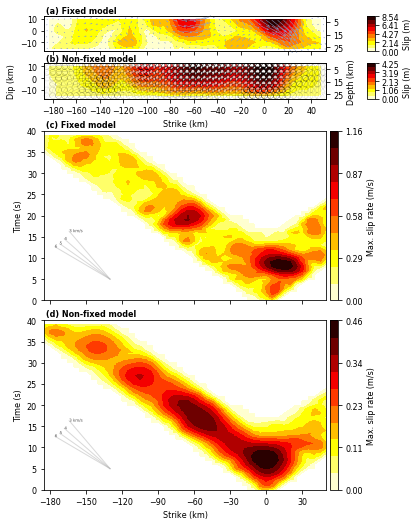

In [33]:
model=np.loadtxt('modellist.txt', dtype=int, usecols=0)

strike_flag = 0
rake_flag = 0
beach_flag = 1
fignums = ['(a) Fixed model', '(b) Non-fixed model', '(c) Fixed model', '(d) Non-fixed model']
fig=plt.figure(figsize=figsize)

panel = 0
for j in [10, 4]:
    data=np.loadtxt('model_'+str(model[j])+'/FFM_DCpreferred.txt', skiprows=1)
    print(str(model[j]))
    x, y, slip, strike, dip, rake=data[:,10], data[:,11],data[:,1], data[:,7], data[:,8],data[:,9]

    if model[j] == 190904092511 or model[j] == 190904092534:
        xi=np.linspace(min(x)-5, max(x)+5, 100)
        yi=np.linspace(min(y)-5, max(y)+5, 100)
    else:
        xi=np.linspace(min(x)-2.5, max(x)+2.5, 100)
        yi=np.linspace(min(y)-2.5, max(y)+2.5, 100)
    X, Y=np.meshgrid(xi, yi)
    zi=griddata((x, y), slip, (X, Y),'linear')
    maxslip = max(slip)
    interval=np.linspace(0, maxslip, 11)

    axw=0.7
    axh=(abs(max(yi)-min(yi))) / (abs(max(xi)-min(xi))) * axw
    
    ax=fig.add_axes([0.1,0.1 - (axh + 0.03)*panel,axw,axh])
    axp=ax.get_position()
    fig.text(axp.x0+0.005, axp.y1+0.002, fignums[panel], ha='left', va='bottom', weight='bold')

    h0, model_dip, model_icmn, model_str=load_setting_fort40('model_'+str(model[j])+'/fort.40')

    if model[j] == 190904092511 or model[j] == 190904092534:
        pass
    else: 
        sc=ax.contourf(X, Y, zi, interval, vmin=0, vmax=maxslip, cmap='hot_r')

    if model_icmn == 5:
        cmap=plt.get_cmap('hot_r')
        ax = plt.gca()
        if beach_flag == 1:
            for i in range(len(strike)):
                focmecs=[strike[i], dip[i], rake[i]]
                color=cmap(slip[i]/max(slip))
                if model[j] == 190904092511 or model[j] == 190904092534:
                    if slip[i] > 0:
                        b = beach(focmecs, xy=(x[i], y[i]), width=8, linewidth=0.3, facecolor=color, edgecolor='k', \
                                  bgcolor='w')
                        b.set_zorder(1); b.set_alpha(1); b.set_clip_on(False)
                        ax.add_collection(b)
                else:
                    b = beach(focmecs, xy=(x[i], y[i]), width=5, linewidth=0.3, facecolor=color, edgecolor='k', \
                              bgcolor='w')
                    b.set_zorder(1); b.set_alpha(slip[i]/max(slip)); b.set_clip_on(False)
                    ax.add_collection(b)
        elif strike_flag == 1:
            for k in np.arange(0, len(strike), 1):
                length=slip[k]/maxslip*5.0
                a=0.5*np.pi - strike[k]*np.pi/180.0
                x1=x[k]+np.cos(a)*length
                y1=y[k]+np.sin(a)*length
                x2=x[k]+np.cos(-(np.pi - a))*length
                y2=y[k]+np.sin(-(np.pi - a))*length
                #ax.plot([x1, x2], [y1, y2], alpha=slip[k]/maxslip, lw=1.5, clip_on=False, color='C4', zorder=1000)  #rake angle
                ax.plot([x1, x2], [y1, y2], alpha=slip[k]/maxslip, lw=1.2, clip_on=False, color='#1f77b4', zorder=1000) #strike orientation
        elif rake_flag == 1:
            for i in np.arange(0, len(strike), 1):
                a=rake[i]*np.pi/180.0
                length=slip[i] / maxslip * 15.0
                x1=np.cos(a)*length
                y1=np.sin(a)*length
                spoint = [x[i], y[i]]
                epoint = [x1+x[i], y1+y[i]]
                arrowstyle = ArrowStyle('->', head_length=0.4 * slip[i]/max(slip) * 0.75, head_width=0.2 * slip[i]/max(slip) * 0.5)
                ax.annotate('', xy=epoint, xytext=spoint, 
                            arrowprops=dict(arrowstyle=arrowstyle, color='C2', lw=0.5), annotation_clip=False)


    elif model_icmn == 2:
        for i in np.arange(0, len(strike), 1):
            a=rake[i]*np.pi/180.0
            length=slip[i] / maxslip * 20.0
            x1=np.cos(a)*length
            y1=np.sin(a)*length
            spoint = [x[i], y[i]]
            epoint = [x1+x[i], y1+y[i]]
            arrowstyle = ArrowStyle('->', head_length=0.4 * slip[i]/max(slip) * 0.75, head_width=0.2 * slip[i]/max(slip) * 0.5)
            ax.annotate('', xy=epoint, xytext=spoint, 
                        arrowprops=dict(arrowstyle=arrowstyle, color='C2', lw=0.5), annotation_clip=False)


    ax.set_xticks(np.arange(-180, 180, 20))
    if panel == 0:
        ax.set_xticklabels([])
    if panel == 1:
        ax.set_xlabel('Strike (km)')
    ax.set_xlim(min(xi), max(xi))
    ax.set_ylim(min(yi), max(yi))

    ax2 = ax.twinx()
    depmin=h0-np.sin(model_dip*np.pi/180.0)*min(yi)
    depmax=h0-np.sin(model_dip*np.pi/180.0)*max(yi)
    ax2.set_yticks(np.arange(-5, 40, 10))
    ax2.set_ylim(depmin, depmax)

    if panel == 1:
        ax.set_ylabel('Dip (km)')
        ax2.set_ylabel('Depth (km)')

    cax=fig.add_axes([axp.x1+0.1, axp.y0, 0.02, axp.y1-axp.y0])
    if model[j] == 190904092511 or model[j] == 190904092534:
        bounds = interval
        norm = mpl.colors.Normalize(vmin=0, vmax=max(slip))
        cb1 = mpl.colorbar.ColorbarBase(cax, cmap='hot_r',norm=norm, ticks=np.linspace(0, maxslip, 5), format='%.2f', label='Slip (m)')
    else:
        cbar=plt.colorbar(sc, cax=cax, ticks=np.linspace(0, maxslip, 5), format='%.2f', label='Slip (m)') 
        
    panel += 1

model=np.loadtxt('modellist.txt', dtype=int, usecols=0)
for i in [10, 4]:
    data=np.loadtxt('model_'+str(model[i])+'/slip-rate-time_along_strike.txt', skiprows=1)
    t, x, amp = data[:,0], data[:,1], data[:,3]
    xs=np.linspace(min(x), max(x), 1000)
    ys=np.linspace(min(t), max(t), 1000)
    X, Y = np.meshgrid(xs, ys)
    Z = griddata((x, t), amp, (X, Y),'linear')
    levels = np.linspace(0, max(amp), 11)

    axp = ax.get_position()    
    ax=fig.add_axes([axp.x0, axp.y0 - 0.5 + 0.03*(panel-2), 0.7, 0.42])
    axp = ax.get_position()    
    fig.text(axp.x0+0.005, axp.y1+0.005, fignums[panel], ha='left', va='bottom', weight='bold')

    sc = ax.contourf(X, Y, Z, levels=levels, cmap='hot_r', vmin=0, vmax=max(amp))

    for j in np.arange(3, 7, 1):
        x0, x1 = -130, -180 + (7-j) * 4
        y0, y1 = 5, abs((x1-x0)/j) + 5
        ax.plot([x0, x1], [y0, y1], color='C7', lw=1, alpha=0.5)
        if j == 3:
            text=ax.text(x1, y1, str(j)+' km/s', alpha=0.5, size=4, color='k', ha='left', va='center', zorder=10)     
        else:
            text=ax.text(x1, y1, str(j), alpha=0.5, size=4, color='k', ha='left', va='center', zorder=10)
        text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='w', alpha=0.5), path_effects.Normal()])
        
    if panel == 2:
        ax.set_xticklabels([])
    if panel == 3:
        ax.set_xlabel('Strike (km)')
    ax.set_ylabel('Time (s)')
    ax.set_xticks(np.arange(-180, 120, 30))
    ax.set_xlim(min(x), max(x))
    ax.set_ylim(0, max(t)+1)
    axp=ax.get_position()
    cbar_ax=fig.add_axes([axp.x1+0.01, axp.y0, 0.02, axp.y1-axp.y0])
    cbar=plt.colorbar(sc, cax=cbar_ax, label='Max. slip rate (m/s)', ticks=np.linspace(0, max(amp), 5), format='%.2f')
    
    panel += 1
    
plt.savefig('../pubFigure/figureS4.png', bbox_inches='tight', pad_inches=0.1)
plt.savefig('../pubFigure/figureS4.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

## Figure S5

191112034616
190830175253
191112234311


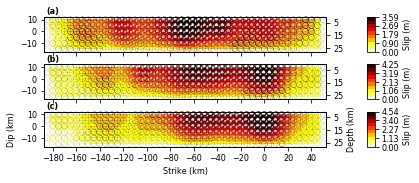

In [34]:
model=np.loadtxt('modellist.txt', dtype=int, usecols=0)

fignums = ['(a)', '(b)', '(c)']
fig=plt.figure(figsize=figsize)

panel = 0
for j in [1, 4, 7]:
    data=np.loadtxt('model_'+str(model[j])+'/FFM_DCpreferred.txt', skiprows=1)
    print(str(model[j]))
    x, y, slip, strike, dip, rake=data[:,10], data[:,11],data[:,1], data[:,7], data[:,8],data[:,9]

    if model[j] == 190904092511 or model[j] == 190904092534:
        xi=np.linspace(min(x)-5, max(x)+5, 100)
        yi=np.linspace(min(y)-5, max(y)+5, 100)
    else:
        xi=np.linspace(min(x)-2.5, max(x)+2.5, 100)
        yi=np.linspace(min(y)-2.5, max(y)+2.5, 100)
    X, Y=np.meshgrid(xi, yi)
    zi=griddata((x, y), slip, (X, Y),'linear')
    maxslip = max(slip)
    interval=np.linspace(0, maxslip, 11)

    axw=0.7
    axh=(abs(max(yi)-min(yi))) / (abs(max(xi)-min(xi))) * axw
    
    ax=fig.add_axes([0.1,0.1 - (axh + 0.03)*panel,axw,axh])
    axp=ax.get_position()
    fig.text(axp.x0+0.005, axp.y1+0.002, fignums[panel], ha='left', va='bottom', weight='bold')

    h0, model_dip, model_icmn, model_str=load_setting_fort40('model_'+str(model[j])+'/fort.40')

    if model[j] == 190904092511 or model[j] == 190904092534:
        pass
    else: 
        sc=ax.contourf(X, Y, zi, interval, vmin=0, vmax=maxslip, cmap='hot_r')

    if model_icmn == 5:
        cmap=plt.get_cmap('hot_r')
        ax = plt.gca()
        if beach_flag == 1:
            for i in range(len(strike)):
                focmecs=[strike[i], dip[i], rake[i]]
                color=cmap(slip[i]/max(slip))
                if model[j] == 190904092511 or model[j] == 190904092534:
                    if slip[i] > 0:
                        b = beach(focmecs, xy=(x[i], y[i]), width=8, linewidth=0.3, facecolor=color, edgecolor='k', \
                                  bgcolor='w')
                        b.set_zorder(1); b.set_alpha(1); b.set_clip_on(False)
                        ax.add_collection(b)
                else:
                    b = beach(focmecs, xy=(x[i], y[i]), width=5, linewidth=0.3, facecolor=color, edgecolor='k', \
                              bgcolor='w')
                    b.set_zorder(1); b.set_alpha(slip[i]/max(slip)); b.set_clip_on(False)
                    ax.add_collection(b)
        elif strike_flag == 1:
            for k in np.arange(0, len(strike), 1):
                length=slip[k]/maxslip*5.0
                a=0.5*np.pi - strike[k]*np.pi/180.0
                x1=x[k]+np.cos(a)*length
                y1=y[k]+np.sin(a)*length
                x2=x[k]+np.cos(-(np.pi - a))*length
                y2=y[k]+np.sin(-(np.pi - a))*length
                #ax.plot([x1, x2], [y1, y2], alpha=slip[k]/maxslip, lw=1.5, clip_on=False, color='C4', zorder=1000)  #rake angle
                ax.plot([x1, x2], [y1, y2], alpha=slip[k]/maxslip, lw=1.2, clip_on=False, color='#1f77b4', zorder=1000) #strike orientation
        elif rake_flag == 1:
            for i in np.arange(0, len(strike), 1):
                a=rake[i]*np.pi/180.0
                length=slip[i] / maxslip * 15.0
                x1=np.cos(a)*length
                y1=np.sin(a)*length
                spoint = [x[i], y[i]]
                epoint = [x1+x[i], y1+y[i]]
                arrowstyle = ArrowStyle('->', head_length=0.4 * slip[i]/max(slip) * 0.75, head_width=0.2 * slip[i]/max(slip) * 0.5)
                ax.annotate('', xy=epoint, xytext=spoint, 
                            arrowprops=dict(arrowstyle=arrowstyle, color='C2', lw=0.5), annotation_clip=False)


    elif model_icmn == 2:
        for i in np.arange(0, len(strike), 1):
            a=rake[i]*np.pi/180.0
            length=slip[i] / maxslip * 20.0
            x1=np.cos(a)*length
            y1=np.sin(a)*length
            spoint = [x[i], y[i]]
            epoint = [x1+x[i], y1+y[i]]
            arrowstyle = ArrowStyle('->', head_length=0.4 * slip[i]/max(slip) * 0.75, head_width=0.2 * slip[i]/max(slip) * 0.5)
            ax.annotate('', xy=epoint, xytext=spoint, 
                        arrowprops=dict(arrowstyle=arrowstyle, color='C2', lw=0.5), annotation_clip=False)


    ax.set_xticks(np.arange(-180, 180, 20))
    if panel == 0 or panel == 1:
        ax.set_xticklabels([])
    if panel == 2:
        ax.set_xlabel('Strike (km)')
    ax.set_xlim(min(xi), max(xi))
    ax.set_ylim(min(yi), max(yi))

    ax2 = ax.twinx()
    depmin=h0-np.sin(model_dip*np.pi/180.0)*min(yi)
    depmax=h0-np.sin(model_dip*np.pi/180.0)*max(yi)
    ax2.set_yticks(np.arange(-5, 40, 10))
    ax2.set_ylim(depmin, depmax)

    if panel == 2:
        ax.set_ylabel('Dip (km)')
        ax2.set_ylabel('Depth (km)')

    cax=fig.add_axes([axp.x1+0.1, axp.y0, 0.02, axp.y1-axp.y0])
    if model[j] == 190904092511 or model[j] == 190904092534:
        bounds = interval
        norm = mpl.colors.Normalize(vmin=0, vmax=max(slip))
        cb1 = mpl.colorbar.ColorbarBase(cax, cmap='hot_r',norm=norm, ticks=np.linspace(0, maxslip, 5), format='%.2f', label='Slip (m)')
    else:
        cbar=plt.colorbar(sc, cax=cax, ticks=np.linspace(0, maxslip, 5), format='%.2f', label='Slip (m)') 
        
    panel += 1

plt.savefig('../pubFigure/figureS5.png', bbox_inches='tight', pad_inches=0.1)
plt.savefig('../pubFigure/figureS5.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

## Figure S6

191121022524
190830175253
190827153432


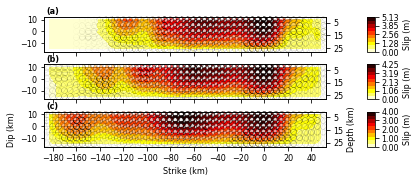

In [35]:
model=np.loadtxt('modellist.txt', dtype=int, usecols=0)

fignums = ['(a)', '(b)', '(c)']
fig=plt.figure(figsize=figsize)

panel = 0
for j in [3, 4, 5]:
    data=np.loadtxt('model_'+str(model[j])+'/FFM_DCpreferred.txt', skiprows=1)
    print(str(model[j]))
    x, y, slip, strike, dip, rake=data[:,10], data[:,11],data[:,1], data[:,7], data[:,8],data[:,9]

    if model[j] == 190904092511 or model[j] == 190904092534:
        xi=np.linspace(min(x)-5, max(x)+5, 100)
        yi=np.linspace(min(y)-5, max(y)+5, 100)
    else:
        xi=np.linspace(min(x)-2.5, max(x)+2.5, 100)
        yi=np.linspace(min(y)-2.5, max(y)+2.5, 100)
    X, Y=np.meshgrid(xi, yi)
    zi=griddata((x, y), slip, (X, Y),'linear')
    maxslip = max(slip)
    interval=np.linspace(0, maxslip, 11)

    axw=0.7
    axh=(abs(max(yi)-min(yi))) / (abs(max(xi)-min(xi))) * axw
    
    ax=fig.add_axes([0.1,0.1 - (axh + 0.03)*panel,axw,axh])
    axp=ax.get_position()
    fig.text(axp.x0+0.005, axp.y1+0.002, fignums[panel], ha='left', va='bottom', weight='bold')

    h0, model_dip, model_icmn, model_str=load_setting_fort40('model_'+str(model[j])+'/fort.40')

    if model[j] == 190904092511 or model[j] == 190904092534:
        pass
    else: 
        sc=ax.contourf(X, Y, zi, interval, vmin=0, vmax=maxslip, cmap='hot_r')

    if model_icmn == 5:
        cmap=plt.get_cmap('hot_r')
        ax = plt.gca()
        if beach_flag == 1:
            for i in range(len(strike)):
                focmecs=[strike[i], dip[i], rake[i]]
                color=cmap(slip[i]/max(slip))
                if model[j] == 190904092511 or model[j] == 190904092534:
                    if slip[i] > 0:
                        b = beach(focmecs, xy=(x[i], y[i]), width=8, linewidth=0.3, facecolor=color, edgecolor='k', \
                                  bgcolor='w')
                        b.set_zorder(1); b.set_alpha(1); b.set_clip_on(False)
                        ax.add_collection(b)
                else:
                    b = beach(focmecs, xy=(x[i], y[i]), width=5, linewidth=0.3, facecolor=color, edgecolor='k', \
                              bgcolor='w')
                    b.set_zorder(1); b.set_alpha(slip[i]/max(slip)); b.set_clip_on(False)
                    ax.add_collection(b)
        elif strike_flag == 1:
            for k in np.arange(0, len(strike), 1):
                length=slip[k]/maxslip*5.0
                a=0.5*np.pi - strike[k]*np.pi/180.0
                x1=x[k]+np.cos(a)*length
                y1=y[k]+np.sin(a)*length
                x2=x[k]+np.cos(-(np.pi - a))*length
                y2=y[k]+np.sin(-(np.pi - a))*length
                #ax.plot([x1, x2], [y1, y2], alpha=slip[k]/maxslip, lw=1.5, clip_on=False, color='C4', zorder=1000)  #rake angle
                ax.plot([x1, x2], [y1, y2], alpha=slip[k]/maxslip, lw=1.2, clip_on=False, color='#1f77b4', zorder=1000) #strike orientation
        elif rake_flag == 1:
            for i in np.arange(0, len(strike), 1):
                a=rake[i]*np.pi/180.0
                length=slip[i] / maxslip * 15.0
                x1=np.cos(a)*length
                y1=np.sin(a)*length
                spoint = [x[i], y[i]]
                epoint = [x1+x[i], y1+y[i]]
                arrowstyle = ArrowStyle('->', head_length=0.4 * slip[i]/max(slip) * 0.75, head_width=0.2 * slip[i]/max(slip) * 0.5)
                ax.annotate('', xy=epoint, xytext=spoint, 
                            arrowprops=dict(arrowstyle=arrowstyle, color='C2', lw=0.5), annotation_clip=False)


    elif model_icmn == 2:
        for i in np.arange(0, len(strike), 1):
            a=rake[i]*np.pi/180.0
            length=slip[i] / maxslip * 20.0
            x1=np.cos(a)*length
            y1=np.sin(a)*length
            spoint = [x[i], y[i]]
            epoint = [x1+x[i], y1+y[i]]
            arrowstyle = ArrowStyle('->', head_length=0.4 * slip[i]/max(slip) * 0.75, head_width=0.2 * slip[i]/max(slip) * 0.5)
            ax.annotate('', xy=epoint, xytext=spoint, 
                        arrowprops=dict(arrowstyle=arrowstyle, color='C2', lw=0.5), annotation_clip=False)


    ax.set_xticks(np.arange(-180, 180, 20))
    if panel == 0 or panel == 1:
        ax.set_xticklabels([])
    if panel == 2:
        ax.set_xlabel('Strike (km)')
    ax.set_xlim(min(xi), max(xi))
    ax.set_ylim(min(yi), max(yi))

    ax2 = ax.twinx()
    depmin=h0-np.sin(model_dip*np.pi/180.0)*min(yi)
    depmax=h0-np.sin(model_dip*np.pi/180.0)*max(yi)
    ax2.set_yticks(np.arange(-5, 40, 10))
    ax2.set_ylim(depmin, depmax)

    if panel == 2:
        ax.set_ylabel('Dip (km)')
        ax2.set_ylabel('Depth (km)')

    cax=fig.add_axes([axp.x1+0.1, axp.y0, 0.02, axp.y1-axp.y0])
    if model[j] == 190904092511 or model[j] == 190904092534:
        bounds = interval
        norm = mpl.colors.Normalize(vmin=0, vmax=max(slip))
        cb1 = mpl.colorbar.ColorbarBase(cax, cmap='hot_r',norm=norm, ticks=np.linspace(0, maxslip, 5), format='%.2f', label='Slip (m)')
    else:
        cbar=plt.colorbar(sc, cax=cax, ticks=np.linspace(0, maxslip, 5), format='%.2f', label='Slip (m)') 
        
    panel += 1

plt.savefig('../pubFigure/figureS6.png', bbox_inches='tight', pad_inches=0.1)
plt.savefig('../pubFigure/figureS6.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

## Figure S7

4.0 0
5.0 1
6.0 2
4.0 3
5.0 4
6.0 5
4.0 6
5.0 7
6.0 8


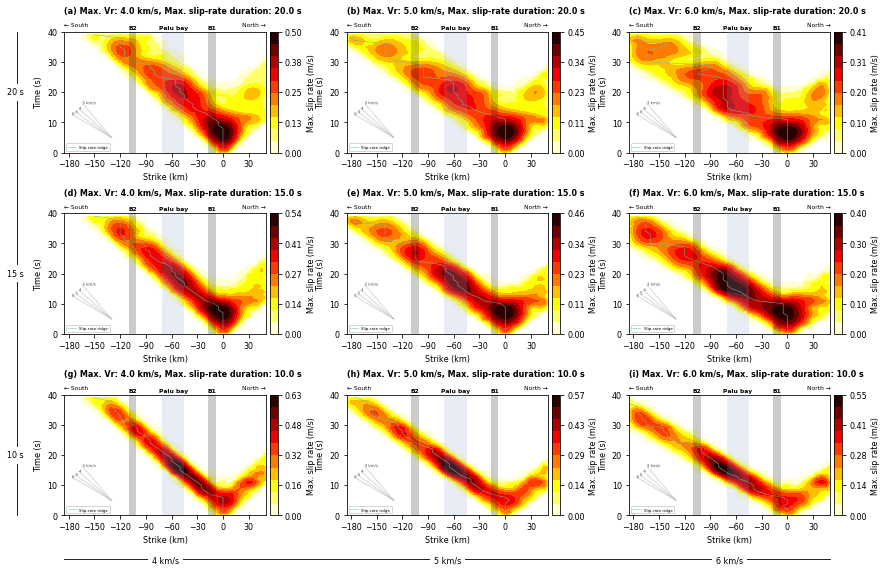

In [36]:
fig=plt.figure(figsize=figsize)
model=np.loadtxt('modellist.txt', dtype=int, usecols=0)
panel_num = ['(g)','(h)','(i)','(d)','(e)','(f)','(a)','(b)','(c)']
for i in np.arange(0, 9, 1):
    data=np.loadtxt('model_'+str(model[i])+'/slip-rate-time_along_strike.txt', skiprows=1)
    t, x, amp = data[:,0], data[:,1], data[:,3]
    xs=np.linspace(min(x), max(x), 1000)
    ys=np.linspace(min(t), max(t), 1000)
    X, Y = np.meshgrid(xs, ys)
    Z = griddata((x, t), amp, (X, Y),'linear')
    levels = np.linspace(0, max(amp), 11)

    if i == 0:
        ax=fig.add_axes([0.1, 0.1, 0.5, 0.3])
        axp0=ax.get_position()
        text= fig.text(axp0.x0 + (axp0.x1-axp0.x0)/2, axp0.y0-0.1, str(i+4)+' km/s', ha='center', va='top', size=initfontsize, bbox=dict(fc='w', ec='none'))
        text = fig.text(axp0.x0 - 0.1, axp0.y0 + (axp0.y1-axp0.y0)/2.0, '10 s', ha='right', va='center', size=initfontsize, bbox=dict(fc='w', ec='none'))
        
        ax.plot([min(x), 708], [-14.5, -14.5], lw=0.85, color='k', clip_on=False)
        ax.plot([-240, -240], [0, 160], lw=0.85, color='k', clip_on=False)
        
    elif i == 1 or i == 2:
        ax=fig.add_axes([axp0.x1+(axp0.x1-axp0.x0)*(i-1)+0.2*i, axp0.y0, (axp0.x1-axp0.x0), (axp0.y1-axp0.y0)])    
        text = fig.text(axp.x1 + (axp.x1-axp.x0)/2 + 0.2, axp0.y0-0.1, str(i+4)+' km/s', ha='center', va='top', size=initfontsize, bbox=dict(fc='w', ec='none'))
    elif i == 3 or i == 4 or i == 5:
        ax=fig.add_axes([axp0.x0+(axp0.x1-axp0.x0)*(i-3)+0.2*(i-3), axp0.y1 + 0.15, (axp0.x1-axp0.x0), (axp0.y1-axp0.y0)])    
    elif i == 6 or i == 7 or i == 8:
        ax=fig.add_axes([axp0.x0+(axp0.x1-axp0.x0)*(i-6)+0.2*(i-6), axp0.y1 + (axp0.y1-axp0.y0) + 0.3, (axp0.x1-axp0.x0), (axp0.y1-axp0.y0)])    
    if i == 4:
        text = fig.text(axp0.x0 - 0.1, axp0.y1 + ((axp0.y1-axp0.y0)/2.0) + 0.15, '15 s', ha='right', va='center', size=initfontsize, bbox=dict(fc='w', ec='none'))
    if i == 7:
        text = fig.text(axp0.x0 - 0.1, axp0.y1 + ((axp0.y1-axp0.y0)/2.0) * 3 + 0.3, '20 s', ha='right', va='center', size=initfontsize, bbox=dict(fc='w', ec='none'))
    axp=ax.get_position()

    lines=linecache.getlines('model_'+str(model[i])+'/fort.40')
    fort40=np.genfromtxt('model_'+str(model[i])+'/fort.40', skip_header=1, skip_footer=len(lines)-2)
    moment, mw, h0, vr=fort40[0], fort40[1], fort40[5], fort40[6]
    fort40=np.genfromtxt('model_'+str(model[i])+'/fort.40', skip_header=3, skip_footer=len(lines)-4)
    model_str, model_dip=fort40[0], fort40[1]
    fort40=np.genfromtxt('model_'+str(model[i])+'/fort.40', skip_header=5, skip_footer=len(lines)-6)
    model_t_int, model_jtn=fort40[6], fort40[7]
    fort40=np.genfromtxt('model_'+str(model[i])+'/fort.40', skip_header=7, skip_footer=len(lines)-8)
    variance=fort40[0]    
    note='Model plane (Strike; '+str(model_str)+', Dip; '+str(model_dip)+'), \nVariance: '+\
    str(variance)+', VrMax; '+str(vr)+', JTN: '+str(model_jtn)+' (= '+str((model_jtn+1)*0.5)+' s)'
    fig.text(axp.x0, axp.y1+0.01, '← South', va='bottom', ha='left', size=6)
    fig.text(axp.x1, axp.y1+0.01, 'North →', va='bottom', ha='right', size=6)
    fig.text(axp.x0, axp.y1+0.04, panel_num[i] + ' Max. Vr: '+str(vr)+' km/s, Max. slip-rate duration: '+str((model_jtn + 1) * model_t_int) + ' s', 
             va='bottom', ha='left', size=initfontsize, weight='bold')

    sc = ax.contourf(X, Y, Z, levels=levels, cmap='hot_r', vmin=0, vmax=max(amp))

    if len(amp) == 1920:
        pick_t = []
        pick_x = []
        for j in np.arange(0, 40, 1):
            tmpamp = [amp[i] for i in range(len(amp)) if t[i] == j]
            tmpx = [x[i] for i in range(len(amp)) if t[i] == j]
            tmpt = [t[i] for i in range(len(amp)) if t[i] == j]
            pick_t.append(tmpt[0])
            pick_x.append(tmpx[np.argmax(tmpamp)])
        ax.plot(pick_x, pick_t, color='C0', label='Slip-rate ridge', lw=0.5)
        pick_t = []
        pick_x = []
        for j in np.arange(0, 48, 1):
            i0 = j * 40
            i1 = (j+1) * 40
            #print(i0, i1)
            pick_t.append(t[np.argmax(amp[i0:i1])])
            pick_x.append(x[i0])
        #ax.plot(pick_x, pick_t, color='C2', linestyle='--', lw=0.75, label='Slip-rate ridge in space')
        plt.legend(loc='lower left', fontsize=4)
    ax.axvspan(bx[0], bx[1], edgecolor='none', facecolor='k', zorder=10, alpha=0.2)
    ax.text(bx[1] - (bx[1]-bx[0])/2, 40.5, 'B1', va='bottom', ha='center', color='k', size=6, weight='bold')
    ax.axvspan(bx[2], bx[3], edgecolor='none', facecolor='C2', zorder=10, alpha=0.2)
    ax.text(bx[3] - (bx[3]-bx[2])/2, 40.5, 'Palu bay', va='bottom', ha='center', color='k', size=6, weight='bold')
    ax.axvspan(bx[4], bx[5], edgecolor='none', facecolor='k', zorder=10, alpha=0.2)
    ax.text(bx[5] - (bx[5]-bx[4])/2, 40.5, 'B2', va='bottom', ha='center', color='k', size=6, weight='bold')

    for j in np.arange(3, 7, 1):
        x0, x1 = -130, -180 + (7-j) * 4
        y0, y1 = 5, abs((x1-x0)/j) + 5
        ax.plot([x0, x1], [y0, y1], color='C7', lw=1, alpha=0.5)
        if j == 3:
            text=ax.text(x1, y1, str(j)+' km/s', alpha=0.5, size=4, color='k', ha='left', va='center', zorder=10)     
        else:
            text=ax.text(x1, y1, str(j), alpha=0.5, size=4, color='k', ha='left', va='center', zorder=10)
        text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='w', alpha=0.5), path_effects.Normal()])


    ax.set_xlabel('Strike (km)')
    ax.set_ylabel('Time (s)')
    ax.set_xticks(np.arange(-180, 120, 30))
    ax.set_xlim(min(x), max(x))
    ax.set_ylim(0, max(t)+1)
    axp=ax.get_position()
    cbar_ax=fig.add_axes([axp.x1+0.01, axp.y0, 0.02, axp.y1-axp.y0])
    cbar=plt.colorbar(sc, cax=cbar_ax, label='Max. slip rate (m/s)', ticks=np.linspace(0, max(amp), 5), format='%.2f')
    print(vr, i)
plt.savefig('../pubFigure/figureS7.png', bbox_inches="tight", pad_inches=0.1)
plt.savefig('../pubFigure/figureS7.pdf', bbox_inches="tight", pad_inches=0.1)
plt.show()

## Figure S8

190830175253
200111235628


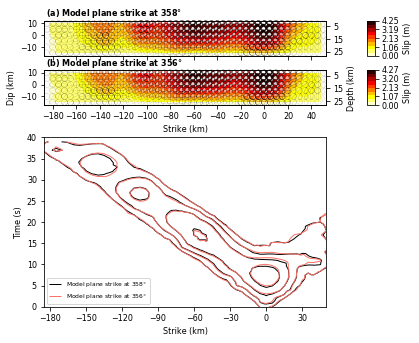

In [37]:
model=np.loadtxt('modellist.txt', dtype=int, usecols=0)

fignums = ['(a) Model plane strike at 358$\degree$', '(b) Model plane strike at 356$\degree$', '(c)']
fig=plt.figure(figsize=figsize)

#for j in np.arange(0, 5, 1):
panel = 0
for j in [4, 9]:
    data=np.loadtxt('model_'+str(model[j])+'/FFM_DCpreferred.txt', skiprows=1)
    print(str(model[j]))
    x, y, slip, strike, dip, rake=data[:,10], data[:,11],data[:,1], data[:,7], data[:,8],data[:,9]

    if model[j] == 190904092511 or model[j] == 190904092534:
        xi=np.linspace(min(x)-5, max(x)+5, 100)
        yi=np.linspace(min(y)-5, max(y)+5, 100)
    else:
        xi=np.linspace(min(x)-2.5, max(x)+2.5, 100)
        yi=np.linspace(min(y)-2.5, max(y)+2.5, 100)
    X, Y=np.meshgrid(xi, yi)
    zi=griddata((x, y), slip, (X, Y),'linear')
    maxslip = max(slip)
    interval=np.linspace(0, maxslip, 11)

    axw=0.7
    axh=(abs(max(yi)-min(yi))) / (abs(max(xi)-min(xi))) * axw
    
    ax=fig.add_axes([0.1,0.1 - (axh + 0.035)*panel,axw,axh])
    axp=ax.get_position()
    fig.text(axp.x0+0.005, axp.y1+0.001, fignums[panel], ha='left', va='bottom', weight='bold')

    h0, model_dip, model_icmn, model_str=load_setting_fort40('model_'+str(model[j])+'/fort.40')

    if model[j] == 190904092511 or model[j] == 190904092534:
        pass
    else: 
        sc=ax.contourf(X, Y, zi, interval, vmin=0, vmax=maxslip, cmap='hot_r')

    if model_icmn == 5:
        cmap=plt.get_cmap('hot_r')
        ax = plt.gca()
        if beach_flag == 1:
            for i in range(len(strike)):
                focmecs=[strike[i], dip[i], rake[i]]
                color=cmap(slip[i]/max(slip))
                if model[j] == 190904092511 or model[j] == 190904092534:
                    if slip[i] > 0:
                        b = beach(focmecs, xy=(x[i], y[i]), width=8, linewidth=0.3, facecolor=color, edgecolor='k', \
                                  bgcolor='w')
                        b.set_zorder(1); b.set_alpha(1); b.set_clip_on(False)
                        ax.add_collection(b)
                else:
                    b = beach(focmecs, xy=(x[i], y[i]), width=5, linewidth=0.3, facecolor=color, edgecolor='k', \
                              bgcolor='w')
                    b.set_zorder(1); b.set_alpha(slip[i]/max(slip)); b.set_clip_on(False)
                    ax.add_collection(b)
        elif strike_flag == 1:
            for k in np.arange(0, len(strike), 1):
                length=slip[k]/maxslip*5.0
                a=0.5*np.pi - strike[k]*np.pi/180.0
                x1=x[k]+np.cos(a)*length
                y1=y[k]+np.sin(a)*length
                x2=x[k]+np.cos(-(np.pi - a))*length
                y2=y[k]+np.sin(-(np.pi - a))*length
                #ax.plot([x1, x2], [y1, y2], alpha=slip[k]/maxslip, lw=1.5, clip_on=False, color='C4', zorder=1000)  #rake angle
                ax.plot([x1, x2], [y1, y2], alpha=slip[k]/maxslip, lw=1.2, clip_on=False, color='#1f77b4', zorder=1000) #strike orientation
        elif rake_flag == 1:
            for i in np.arange(0, len(strike), 1):
                a=rake[i]*np.pi/180.0
                length=slip[i] / maxslip * 15.0
                x1=np.cos(a)*length
                y1=np.sin(a)*length
                spoint = [x[i], y[i]]
                epoint = [x1+x[i], y1+y[i]]
                arrowstyle = ArrowStyle('->', head_length=0.4 * slip[i]/max(slip) * 0.75, head_width=0.2 * slip[i]/max(slip) * 0.5)
                ax.annotate('', xy=epoint, xytext=spoint, 
                            arrowprops=dict(arrowstyle=arrowstyle, color='C2', lw=0.5), annotation_clip=False)


    elif model_icmn == 2:
        for i in np.arange(0, len(strike), 1):
            a=rake[i]*np.pi/180.0
            length=slip[i] / maxslip * 20.0
            x1=np.cos(a)*length
            y1=np.sin(a)*length
            spoint = [x[i], y[i]]
            epoint = [x1+x[i], y1+y[i]]
            arrowstyle = ArrowStyle('->', head_length=0.4 * slip[i]/max(slip) * 0.75, head_width=0.2 * slip[i]/max(slip) * 0.5)
            ax.annotate('', xy=epoint, xytext=spoint, 
                        arrowprops=dict(arrowstyle=arrowstyle, color='C2', lw=0.5), annotation_clip=False)


    ax.set_xticks(np.arange(-180, 180, 20))
    if panel == 0:
        ax.set_xticklabels([])
    if panel == 1:
        ax.set_xlabel('Strike (km)')
    ax.set_xlim(min(xi), max(xi))
    ax.set_ylim(min(yi), max(yi))

    ax2 = ax.twinx()
    depmin=h0-np.sin(model_dip*np.pi/180.0)*min(yi)
    depmax=h0-np.sin(model_dip*np.pi/180.0)*max(yi)
    ax2.set_yticks(np.arange(-5, 40, 10))
    ax2.set_ylim(depmin, depmax)

    if panel == 1:
        ax.set_ylabel('Dip (km)')
        ax2.set_ylabel('Depth (km)')

    cax=fig.add_axes([axp.x1+0.1, axp.y0, 0.02, axp.y1-axp.y0])
    if model[j] == 190904092511 or model[j] == 190904092534:
        bounds = interval
        norm = mpl.colors.Normalize(vmin=0, vmax=max(slip))
        cb1 = mpl.colorbar.ColorbarBase(cax, cmap='hot_r',norm=norm, ticks=np.linspace(0, maxslip, 5), format='%.2f', label='Slip (m)')
    else:
        cbar=plt.colorbar(sc, cax=cax, ticks=np.linspace(0, maxslip, 5), format='%.2f', label='Slip (m)') 
        
    panel += 1
    
model=np.loadtxt('modellist.txt', dtype=int, usecols=0)
axp = ax.get_position()    
ax=fig.add_axes([axp.x0, axp.y0 - 0.5 + 0.03*(panel-2), 0.7, 0.42])
axp = ax.get_position()    

i_model = 4 #base model
j_model = 9 #comparison
label_i = 'Model plane strike at 358$\degree$'
label_j = 'Model plane strike at 356$\degree$'

data=np.loadtxt('model_'+str(model[i_model])+'/slip-rate-time_along_strike.txt', skiprows=1)
t, x, amp = data[:,0], data[:,1], data[:,3]
xs=np.linspace(min(x), max(x), 1000)
ys=np.linspace(min(t), max(t), 1000)
X, Y = np.meshgrid(xs, ys)
Z = griddata((x, t), amp, (X, Y),'linear')
levels = np.arange(0.1, max(amp), 0.1)
cs_i = ax.contour(X, Y, Z, levels=levels, colors='k', alpha=1, linewidths=1, zorders=0)

data=np.loadtxt('model_'+str(model[j_model])+'/slip-rate-time_along_strike.txt', skiprows=1)
t, x, amp = data[:,0], data[:,1], data[:,3]
xs=np.linspace(min(x), max(x), 1000)
ys=np.linspace(min(t), max(t), 1000)
X, Y = np.meshgrid(xs, ys)
Z = griddata((x, t), amp, (X, Y),'linear')
levels = np.linspace(0.1, max(amp), 5)
levels = np.arange(0.1, max(amp), 0.1)
cs_j = ax.contour(X, Y, Z, levels=levels, colors='#FA7268', alpha=1, linewidths=1, zorders=10000)

cs_i.collections[0].set_label(label_i)    
cs_j.collections[0].set_label(label_j)    
plt.legend(loc='lower left', fontsize=6)

ax.set_xlabel('Strike (km)')
ax.set_ylabel('Time (s)')
ax.set_xticks(np.arange(-180, 120, 30))
ax.set_xlim(min(x), max(x))
ax.set_ylim(0, max(t)+1)
    
plt.savefig('../pubFigure/figureS8.png', bbox_inches='tight', pad_inches=0.1)
plt.savefig('../pubFigure/figureS8.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

## Figure S9

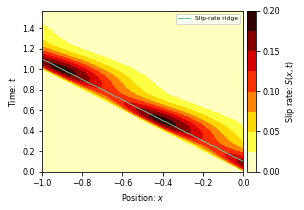

In [22]:
def step_func(x):
    return 1.0 * (x > 0)
def slip_vel_func(t, d):
    f = t * np.exp(-t / d) * step_func(t)
    return f
def amp_func(x):
    a = 4.0 + np.cos(4.0 * np.pi * x)
    return a
def pseudo_slip_Ax(X, T, d):
    p = amp_func(X) * slip_vel_func(T+X, d)
    return p
def pseudo_slip_At(X, T, d):
    p = amp_func(T) * slip_vel_func(T+X, d)
    return p

fig=plt.figure(figsize=figsize)
ax=fig.add_axes([0,0,0.5,0.4])
axp=ax.get_position()

x = np.linspace(-2, 2, 1000)
t = np.linspace(-1, np.pi, 1000)
d = 0.1
X, T = np.meshgrid(x, t)
Z = pseudo_slip_At(X, T, d)
vmin = 0; vmax = 0.2
interval=np.linspace(vmin, vmax, 9)
sc=ax.contourf(X, T, Z, interval, vmin=vmin, vmax=vmax, cmap='hot_r')

xloc = [ X[j][np.argmax(Z[j][:])] for j in range(len(t))]
tloc = [ T[j][np.argmax(Z[j][:])] for j in range(len(t))]

xloc = [ x[np.argmax(Z[j])] for j in range(len(t)) ]
ax.plot(xloc, t, label='Slip-rate ridge', lw=1)

ax.set_xlim(-1, 0)
ax.set_ylim(0, np.pi * 0.5)
ax.set_xlabel('Position: $x$')
ax.set_ylabel('Time: $t$')

plt.legend(loc = 'upper right', fontsize=6)

cax=fig.add_axes([axp.x1+0.01, axp.y0, 0.02, axp.y1-axp.y0])
cbar=plt.colorbar(sc, cax=cax, ticks=np.linspace(vmin, vmax, 5), format='%.2f', label='Slip rate: $S(x, t)$')    

plt.savefig('../pubFigure/figureS9.png', bbox_inches='tight', pad_inches=0.1)
plt.savefig('../pubFigure/figureS9.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

## Figure S10

Loading Wolrd Stress Map...


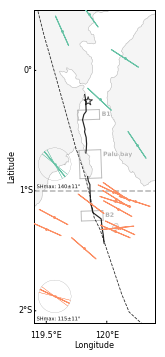

In [114]:
print('Loading Wolrd Stress Map...')
url = 'ftp://datapub.gfz-potsdam.de/download/10.5880.WSM.2016.001/wsm2016.csv'
filename = './wsm2016.csv'
urllib.request.urlretrieve(url, filename)
df = pd.read_csv('wsm2016.csv', usecols=['LAT', 'LON', 'AZI', 'SD'])
wsm2016lon, wsm2016lat, wsm2016azi, wsm2016qua = np.array(df['LON']), np.array(df['LAT']), np.array(df['AZI']), np.array(df['SD'])

data=np.loadtxt('epicenter.dat')
elon, elat=(data[1], data[0])
lonmin=119.4; lonmax=120.4; latmin=-2.1; latmax=0.5

wlonN = [wsm2016lon[i] for i in range(len(wsm2016lon)) if wsm2016lon[i] >= lonmin and wsm2016lon[i] <= lonmax and wsm2016lat[i] >= -1 and wsm2016lat[i] <= latmax]
wlatN = [wsm2016lat[i] for i in range(len(wsm2016lon)) if wsm2016lon[i] >= lonmin and wsm2016lon[i] <= lonmax and wsm2016lat[i] >= -1 and wsm2016lat[i] <= latmax]
waziN = [wsm2016azi[i] for i in range(len(wsm2016lon)) if wsm2016lon[i] >= lonmin and wsm2016lon[i] <= lonmax and wsm2016lat[i] >= -1 and wsm2016lat[i] <= latmax]

wlonS = [wsm2016lon[i] for i in range(len(wsm2016lon)) if wsm2016lon[i] >= lonmin and wsm2016lon[i] <= lonmax and wsm2016lat[i] >= latmin and wsm2016lat[i] < -1]
wlatS = [wsm2016lat[i] for i in range(len(wsm2016lon)) if wsm2016lon[i] >= lonmin and wsm2016lon[i] <= lonmax and wsm2016lat[i] >= latmin and wsm2016lat[i] < -1]
waziS = [wsm2016azi[i] for i in range(len(wsm2016lon)) if wsm2016lon[i] >= lonmin and wsm2016lon[i] <= lonmax and wsm2016lat[i] >= latmin and wsm2016lat[i] < -1]

waziN = np.array(waziN)
waziS = np.array(waziS)

m=Basemap(llcrnrlon=lonmin,llcrnrlat=latmin,urcrnrlon=lonmax,urcrnrlat=latmax,\
          rsphere=(6378137.00,6356752.3142),resolution='h',projection='merc')
x, y=m([lonmin, lonmax], [latmin, latmax])
aspect=max(x)/max(y)
mapwidth=0.3; mapheight=mapwidth/aspect
fig=plt.figure(figsize=figsize)
ax=fig.add_axes([0.1, 0.1, mapwidth, mapheight])
axp=ax.get_position()

m.drawmapboundary(fill_color='#f5f5f5')
m.fillcontinents(color='w')
m.drawparallels(np.arange(-80.,81.,1),labels=[1,0,0,0], fontsize=initfontsize, \
            dashes=(2,10000), color='k')        
m.drawmeridians(np.arange(-180.,181.,0.5),labels=[0,0,0,1], fontsize=initfontsize, \
            dashes=(2,10000), color='k')
m.drawcoastlines(color='C7', linewidth=0.5, zorder=2)
ax.set_xlabel('Longitude', labelpad=18)
ax.set_ylabel('Latitude', labelpad=18)


x, y=m(elon, elat)
ax.scatter(x, y, s=80, marker='*', facecolor='none', edgecolor='k', alpha=0.8, zorder=101, lw=1)
ax.scatter([], [], s=20, marker='*', facecolor='none', edgecolor='k', alpha=0.8, zorder=101, lw=0.5, label='Epicenter (USGS NEIC)')

data=np.loadtxt('Bao+2019NatGeosci/Rupture_pick_ALOS2_A126-A127_azoff_north.gmt', comments='#')
x, y =m(data[:,0], data[:,1])
ax.plot(x, y, color='k', lw=1.2, alpha=0.85, zorder=100, label='Surface-rupture trace (Bao et al. 2019)')
data=np.loadtxt('Bao+2019NatGeosci/Rupture_pick_ALOS2_A126-A127_azoff_south.gmt', comments='#')
x, y =m(data[:,0], data[:,1])
ax.plot(x, y, color='k', lw=1.2, alpha=0.85, zorder=100)

data=np.loadtxt('Belleir2006Tectono_PKF_MF_traced.txt', comments='#')
sx, sy = 49.35, 49.277
lon, lat = data[:,0] / sx + 119.0, - data[:,1] / sy
lon = np.insert(lon, 0, 119.346)
lat = np.insert(lat, 0, 0.834)
x, y=m(lon, lat)
ax.plot(x, y, zorder=2, lw=0.8, color='k', alpha=0.85, linestyle='--', label='Palu-Koro fault (Bellier et al. 2006)')

for i in np.arange(0, 160, 2):
    g=geod.Direct(elat, elon, 178, i*1e3)
    x, y = m(g['lon2'], g['lat2'])
    #ax.scatter(x, y, s=1, zorder=100)
    
arrow_params = {'shape': 'full', 'overhang':0.5, 'head_width':0, 'head_length':0}
for i in range(len(wlonN)):
    for pm in [0, 180]:
        a = waziN[i] + pm
        g = geod.Direct(wlatN[i], wlonN[i], a, 15*1e3)
        x, y = m(wlonN[i], wlatN[i])
        ax.scatter(x, y, s=2, color='C0', zorder=100)
        spoint = [x, y]
        x, y = m(g['lon2'], g['lat2'])
        epoint = [x, y]
        ax.arrow(spoint[0], spoint[1], epoint[0]-spoint[0], epoint[1]-spoint[1], 
                 **arrow_params, color='C0', lw=1, zorder=100)        

for i in range(len(wlonS)):
    for pm in [0, 180]:
        a = waziS[i] + pm
        g = geod.Direct(wlatS[i], wlonS[i], a, 15*1e3)
        x, y = m(wlonS[i], wlatS[i])
        ax.scatter(x, y, s=2, color='C1', zorder=100)
        spoint = [x, y]
        x, y = m(g['lon2'], g['lat2'])
        epoint = [x, y]
        ax.arrow(spoint[0], spoint[1], epoint[0]-spoint[0], epoint[1]-spoint[1], 
                 **arrow_params, color='C1', lw=1, zorder=100)        

lon0list = [119.57, 119.57]
lat0list = [-0.78, -1.88]
wazilist = [waziN, waziS]
colorlist = ['C0', 'C1']

for k in range(2):
    wazi = wazilist[k]
    lon0 = lon0list[k]
    lat0 = lat0list[k]
    x, y = m(lon0, lat0)
    ax.scatter(x, y, s=2, color=colorlist[k], zorder=100)
    spoint = [x, y]
    a = np.linspace(0, 360, 100)
    alon = [ geod.Direct(lat0, lon0, a[i], 15*1e3)['lon2'] for i in range(len(a)) ]
    alat = [ geod.Direct(lat0, lon0, a[i], 15*1e3)['lat2'] for i in range(len(a)) ]
    x, y = m(alon, alat)
    ax.plot(x, y, color='k', lw=0.1)
    alist = [np.mean(wazi), np.mean(wazi)+180, np.mean(wazi) + np.std(wazi), np.mean(wazi) - np.std(wazi), 
             np.mean(wazi) + np.std(wazi) + 180, np.mean(wazi) - np.std(wazi) + 180]
    for aindex, a in  enumerate(alist):
        g = geod.Direct(lat0, lon0, a, 15*1e3)
        x, y = m(g['lon2'], g['lat2'])
        epoint = [x, y]
        #np.mean(wazi), np.median(wazi), np.std(wazi)
        arrow_params = {'shape': 'full', 'overhang':0.5, 'head_width':0, 'head_length':0}
        if aindex >= 2:
            ax.arrow(spoint[0], spoint[1], epoint[0]-spoint[0], epoint[1]-spoint[1], 
                     **arrow_params, color=colorlist[k], lw=0.3, zorder=100)        
        else:
            ax.arrow(spoint[0], spoint[1], epoint[0]-spoint[0], epoint[1]-spoint[1], 
                     **arrow_params, color=colorlist[k], lw=1, zorder=200)        

    x, y = m(lon0-0.15, lat0-0.15)
    text = ax.text(x, y, 'SHmax: '+str('{:.0f}'.format(np.mean(wazi))) + \
                   '$\pm$'+str('{:.0f}'.format(np.std(wazi)))+'$\degree$', size=5, ha='left', va='top')
    text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='w', alpha=1), path_effects.Normal()])

x0, y0 = m(lonmin, -1)
x1, y1 = m(lonmax, -1)
ax.plot([x0, x1], [y0, y1], color='C7', linestyle='--')


bend_index = 0
for k, distance in enumerate(bx):
    g=geod.Direct(elat, elon, 358.0, distance*1e3)
    gx, gy = m(g['lon2'], g['lat2'])
    g_p=geod.Direct(g['lat2'], g['lon2'], 358.0-90.0, 10.0*1e3)
    g_m=geod.Direct(g['lat2'], g['lon2'], 358.0-90.0, -10.0*1e3)
    glon = g_p['lon2'], g_m['lon2']
    glat = g_p['lat2'], g_m['lat2']
    gx, gy = m(glon, glat)
    if distance >= -69 and distance <= -45:
        ax.plot(gx, gy, color='C7', linewidth=1, alpha=0.85, zorder=1, solid_capstyle='round')
    else:
        ax.plot(gx, gy, color='C7', linewidth=1, alpha=0.85, zorder=1, solid_capstyle='round')
    if k%2 == 0:
        g=geod.Direct(g_m['lat2'], g_m['lon2'], 358.0, -(bx[k]-bx[k+1])*1e3)
        glon = g['lon1'], g['lon2']
        glat = g['lat1'], g['lat2']
        gx, gy = m(glon, glat)
        x, y = m(g['lon1']+0.02, g['lat1']-0.02)
        if distance >= -69 and distance <= -45:
            ax.plot(gx, gy, color='C7', linewidth=1, alpha=0.85, zorder=1, solid_capstyle='round')
            text=ax.text(x, y, 'Palu bay', size=6, weight='bold', color='C7', va='top', ha='left')
            text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='w'), path_effects.Normal()])
        else:
            ax.plot(gx, gy, color='C7', linewidth=1, alpha=0.85, zorder=1, solid_capstyle='round')
            bend_index += 1
            text=ax.text(x, y, 'B'+str(bend_index), size=6, weight='bold', color='C7', va='top', ha='left')
            text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='w'), path_effects.Normal()])
        g=geod.Direct(g_p['lat2'], g_p['lon2'], 358.0, -(bx[k]-bx[k+1])*1e3)
        glon = g['lon1'], g['lon2']
        glat = g['lat1'], g['lat2']
        gx, gy = m(glon, glat)
        x, y = m(g['lon1']+0.02, g['lat1']-0.02)
        if distance >= -69 and distance <= -45:
            ax.plot(gx, gy, color='C7', linewidth=1, alpha=0.85, zorder=1020, solid_capstyle='round')
        else:
            ax.plot(gx, gy, color='C7', linewidth=1, alpha=0.85, zorder=1020, solid_capstyle='round')

plt.savefig('../pubFigure/figureS10.png', bbox_inches='tight', pad_inches=0.1)
plt.savefig('../pubFigure/figureS10.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

## Figure S11

190830175253


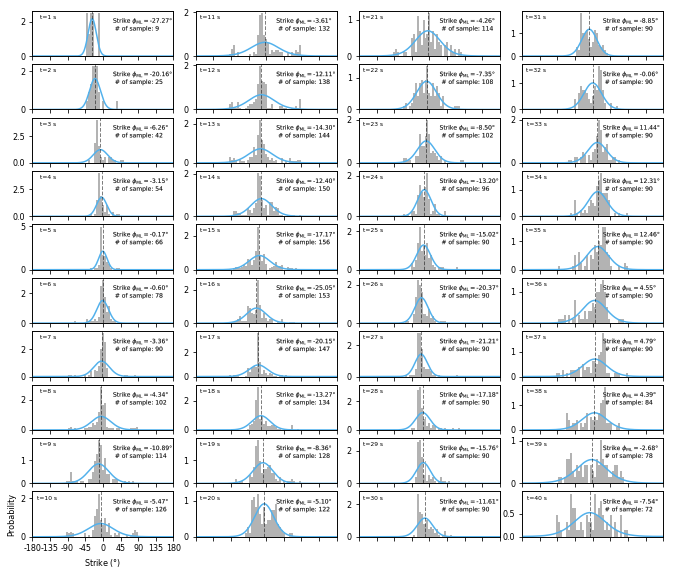

In [25]:
model=np.loadtxt('modellist.txt', dtype=int, usecols=0)
data=np.loadtxt('epicenter.dat')
elon, elat=(data[1], data[0])
j = 4 # main model
print(str(model[j]))
snapind = [207, 214, 218, 228]
m_mllist = []
latlist = []
figlocind = 0
figlochori = 0

fig=plt.figure(figsize=(5.6, 5.6))
for panel in np.arange(1, 41, 1):
#for panel in [2, 7, 14, 18, 27, 32]:
    data=np.loadtxt('model_'+str(model[j])+'/snap_1s_'+str(200+panel)+'.txt', skiprows=1)
    lon, lat, slip = data[:,13], data[:,14], data[:,4]
    strike = data[:,9]; maxslip = data[0,8]
    argmaxslip = np.argmax(slip)
    latlist.append(lat[argmaxslip])
    tmp = []; slipHist = []
    for i in range(len(strike)):
        tmp0 = strike[i]
        if tmp0 > 88 and tmp0 < 268:
            tmp0 = tmp0 + 180
        if slip[i] > 0:
            tmp.append(tmp0)
            slipHist.append(slip[i])
    for i in range(len(tmp)):
        if tmp[i] > 180:
            tmp[i] = tmp[i] - 360
        
    tmp = np.array(tmp)
    theta = tmp * np.pi/180.0
    theta_ml = calc_theta_ml(theta)
    A_m_ml = calc_A_m_ml(theta, theta_ml)
    #m_ml = search_m_ml(A_m_ml)
    m_ml_scipy = search_m_ml_scipy(A_m_ml, 1.0)

    #print(panel, m_ml[0] - m_ml_scipy, '(Diff: m_ml homemade - m_ml scipy)')
    
    
    if panel == 1 or panel == 11 or panel == 21 or panel == 31:
        figlocind = 1
        figlochori += 1
        
    ax=fig.add_axes([0.1 + 0.405 * figlochori, 0.1 - 0.1324870553529789 * (figlocind), 0.35, 0.11248705535297888])
    figlocind += 1
    axp=ax.get_position()
    ax2 = ax.twiny()

    bins=np.linspace(-np.pi, np.pi, 72)
    ax2.hist(theta, density=True, bins=bins, color='C7')
    x = np.linspace(-np.pi, np.pi, 1000)
    ax2.plot(x, vonmises.pdf(x, m_ml_scipy, loc=theta_ml), color='#52b1ec', lw=1.5)
    ax2.axvline(theta_ml, color='k', linestyle='--', lw=1, zorder=10, alpha=0.5)
    
    ## Numpy style
    #w_hist, bin_edges = np.histogram(theta, bins=bins, density=True, weights=slipHist)
    #x = [ (bin_edges[i-1]+bin_edges[i])/2 for i in range(1, len(bin_edges)) ]
    #ax2.bar(x, w_hist, color='C7', width=0.085)

    #tmp_ml = calc_theta_ml_numpyHist(x, w_hist)
    #tmp_A_m_ml = calc_A_m_ml_numpyHist(x, w_hist, tmp_ml)
    #tmp_m_ml_scipy = search_m_ml_scipy(tmp_A_m_ml, 1.0)
    #x = np.linspace(-np.pi, np.pi, 1000)
    #ax2.plot(x, vonmises.pdf(x, tmp_m_ml_scipy, loc=tmp_ml), color='#52b1ec', lw=1)
    #ax2.axvline(tmp_ml, color='k', linestyle='--', lw=1, zorder=100, alpha=0.5)
    ##

    ax2.set_xlim(-np.pi, np.pi)
    ax2.set_xticklabels([])
    ax2.set_xticks([])

    xdeg=np.arange(-180, 180+45, 45)
    #xdeg=np.arange(-90, 90+30, 30)
    ax.set_xticks(xdeg)
    ax.set_xticklabels([])
    if panel == 10:
        ax.set_xlabel('Strike ($\degree$)')
        ax.set_ylabel('Probability')
        ax.set_xticklabels(xdeg)
    tmp1 = theta_ml*180/np.pi
    #tmp2 = tmp_ml*180/np.pi
    m_mllist.append(tmp1)
    textbody = 'Strike '+r'$\phi_{\rm{ML}}=$'+'{:1.2f}'.format(tmp1)+\
                 '$\degree$\n # of sample: '+str(len(tmp))
    #textbody2 = 'Strike '+r'$\phi_{\rm{ML}}=$'+'{:1.2f}'.format(tmp2)+\
    #             '$\degree$\n # of sample: '+str(len(tmp))
    fig.text(axp.x0+0.06, axp.y1-0.01, 't='+str(panel)+' s', va='top', ha='right', size=6)
    text = fig.text(axp.x1-0.15, axp.y1-0.01, textbody, va='top', ha='left', size=6)
    text.set_path_effects([path_effects.Stroke(linewidth=0.5, foreground='w', alpha=0.85), path_effects.Normal()])
    #text = fig.text(axp.x1-0.15, axp.y1-0.01, textbody2, va='top', ha='left', size=6)
    #text.set_path_effects([path_effects.Stroke(linewidth=0.5, foreground='w', alpha=0.85), path_effects.Normal()])
    
plt.savefig('../pubFigure/figureS11.pdf', bbox_inches='tight', pad_inches=0.1)
plt.savefig('../pubFigure/figureS11.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

## Movie S1

200822022922


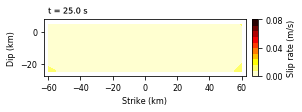

In [545]:
def update(i, ax, cax, fig, axp, j):
    model=np.loadtxt('modellist.txt', dtype=int, usecols=0)
    maxsliprateall = np.loadtxt('model_'+str(model[j])+'/snap_1sec_meca_201.txt', usecols=8, skiprows=1)[0]
    if i != 0:
        ax.cla()
        cax.cla()
    
    snap=i + 1
    #print(snap)
    
    data=np.loadtxt('model_'+str(model[j])+'/snap_1sec_meca_'+str(200+snap)+'.txt', skiprows=1)
    x, y, dep, avesliprate, maxsliprate=data[:,0], data[:,1], data[:,2], data[:,3], data[:,4]
    strike, dip, rake=data[:,9], data[:,10], data[:,11]

    xi=np.linspace(min(x)-2.5, max(x)+2.5, 100)
    yi=np.linspace(min(y)-2.5, max(y)+2.5, 100)
    X, Y=np.meshgrid(xi, yi)
    zi=griddata((x, y), avesliprate, (X, Y),'linear')

    interval=np.linspace(0, maxsliprateall, 11)

    axw=0.5
    axh=(max(yi)-min(yi)) / (max(xi)-min(xi)) * axw
    xloc=0.1
    if snap == 1:
        yloc = 0.1
    elif snap >= 2:
        yloc=axp.y1 + 0.01

    note='t = '+str(data[0:1,7][0]) + ' s'
    text=ax.text(-60, 10, note, va='bottom', ha='left', size=initfontsize)
    text.set_path_effects([path_effects.Stroke(linewidth=0.5, foreground='w'), path_effects.Normal()])
    sc=ax.contourf(X, Y, zi, interval, vmin=0, vmax=maxsliprateall, cmap='hot_r')

    for k in np.arange(0, len(strike), 1):
        a=0.5*np.pi - strike[k]*np.pi/180.0
        length=avesliprate[k]/2.0*120
        x1=x[k]+np.cos(a)*length
        y1=y[k]+np.sin(a)*length
        x2=x[k]+np.cos(-(np.pi - a))*length
        y2=y[k]+np.sin(-(np.pi - a))*length
        #if avesliprate[k] > 0:
        #    ax.plot([x1, x2], [y1, y2], alpha=1, lw=0.5, clip_on=False, color='C0')        

    for vr in np.arange(4.5, 5, 1):
        az = np.arange(-np.pi, np.pi, 0.01)
        xr = np.cos(az) * data[0:1,7][0] * vr
        yr = np.sin(az) * data[0:1,7][0] * vr
        ax.plot(xr, yr, color='C7', lw=2, alpha=0.85)
    ax.set_xlim(min(xi), max(xi))
    ax.set_ylim(min(yi), max(yi))
    ax.set_xlabel('Strike (km)')
    ax.set_ylabel('Dip (km)')
    
    cbar=plt.colorbar(sc, cax=cax, ticks=np.linspace(0, maxsliprateall, 3), \
                      format='%.2f', label='Slip rate (m/s)')
    
def draw():
    model=np.loadtxt('modellist.txt', dtype=int, usecols=0)
    snap=1
    j=0
    print(str(model[j]))
    
    #data=np.loadtxt('model_200822022922/snap_1sec_201.txt', skiprows=1)
    data=np.loadtxt('model_'+str(model[j])+'/snap_1sec_meca_'+str(200+snap)+'.txt', skiprows=1)
    x, y, dep, avesliprate, maxsliprate=data[:,0], data[:,1], data[:,2], data[:,3], data[:,4]
    xi=np.linspace(min(x)-2.5, max(x)+2.5, 100)
    yi=np.linspace(min(y)-2.5, max(y)+2.5, 100)
    axw=0.5
    axh=(max(yi)-min(yi)) / (max(xi)-min(xi)) * axw
    xloc=0.1
    yloc = 0.1
    fig=plt.figure(figsize=(5.6/1.3, 5.6/3))

    ax=fig.add_axes([0.15,0.45, axw*1.3, axh*3])
    axp=ax.get_position()
    axp0=ax.get_position()
    cax=fig.add_axes([axp0.x1+0.02, axp0.y0, 0.02, axp0.y1-axp0.y0])
    ani = animation.FuncAnimation(fig, update, fargs = (ax, cax, fig, axp, j), interval = 100, frames = 25)
    ani.save('movieS1.mp4', writer='ffmpeg', fps=8)
    
draw()

## Graphical abstract | von Mises

190830175253


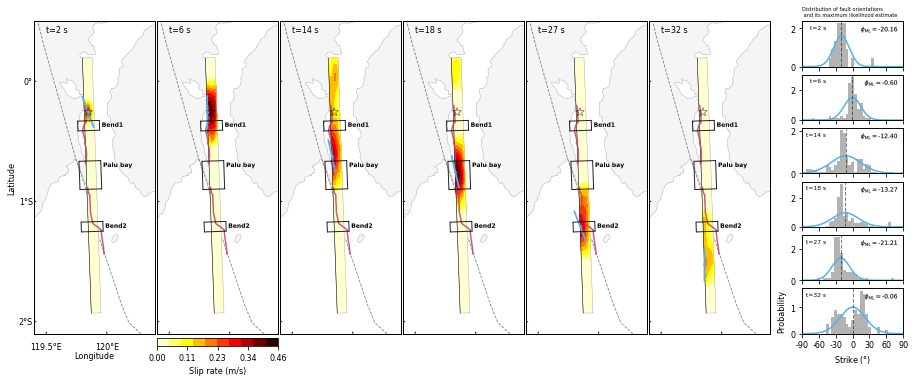

In [39]:
model=np.loadtxt('modellist.txt', dtype=int, usecols=0)
j = 4 # main model
print(str(model[j]))
snapind = [207, 214, 218, 228]
m_mllist = []; m_mllist_weight = []
latlist = []
figlocind = 0
figlochori = 0

fig=plt.figure(figsize=figsize)
#for panel in np.arange(1, 41, 1):
for panel in [2, 6, 14, 18, 27, 32]:
    data=np.loadtxt('model_'+str(model[j])+'/snap_1s_'+str(200+panel)+'.txt', skiprows=1)
    lon, lat, slip = data[:,13], data[:,14], data[:,4]
    strike = data[:,9]; maxslip = data[0,8]
    argmaxslip = np.argmax(slip)
    latlist.append(lat[argmaxslip])
    tmp = [];slipHist = []
    for i in range(len(strike)):
        tmp0 = strike[i]
        if tmp0 > 88 and tmp0 < 268:
            tmp0 = tmp0 + 180
        if slip[i] > 0:
            tmp.append(tmp0)
            slipHist.append(slip[i])
    for i in range(len(tmp)):
        if tmp[i] > 180:
            tmp[i] = tmp[i] - 360
        
    tmp = np.array(tmp)
    theta = tmp * np.pi/180.0
    theta_ml = calc_theta_ml(theta)
    A_m_ml = calc_A_m_ml(theta, theta_ml)
    #m_ml = search_m_ml(A_m_ml)
    m_ml_scipy = search_m_ml_scipy(A_m_ml, 1.0)

    #print(panel, m_ml[0] - m_ml_scipy, '(Diff: m_ml homemade - m_ml scipy)')
    
    
    if panel == 1 or panel == 11 or panel == 21 or panel == 31:
        figlocind = 1
        figlochori += 1
        
    initialyloc = 0.8749223321178733 - 0.11248705535297888
    ax=fig.add_axes([1.925 + 0.08, initialyloc - 0.1324870553529789 * (figlocind), 0.25, 0.11248705535297888])
    figlocind += 1
    axp=ax.get_position()
    ax2 = ax.twiny()

    bins=np.linspace(-np.pi, np.pi, 72)
    ax2.hist(theta, density=True, bins=bins, color='C7')
    x = np.linspace(-np.pi, np.pi, 1000)
    ax2.plot(x, vonmises.pdf(x, m_ml_scipy, loc=theta_ml), color='#52b1ec', lw=1.5)
    ax2.axvline(theta_ml, color='k', linestyle='--', lw=1, zorder=10, alpha=0.5)
    
    ## Numpy style
    #w_hist, bin_edges = np.histogram(theta, bins=bins, density=True, weights=slipHist)
    #x = [ (bin_edges[i-1]+bin_edges[i])/2 for i in range(1, len(bin_edges)) ]
    #ax2.bar(x, w_hist, color='C7', width=0.085)

    #tmp_ml = calc_theta_ml_numpyHist(x, w_hist)
    #tmp_A_m_ml = calc_A_m_ml_numpyHist(x, w_hist, tmp_ml)
    #tmp_m_ml_scipy = search_m_ml_scipy(tmp_A_m_ml, 1.0)
    #x = np.linspace(-np.pi, np.pi, 1000)
    #ax2.plot(x, vonmises.pdf(x, tmp_m_ml_scipy, loc=tmp_ml), color='#52b1ec', lw=1)
    #ax2.axvline(tmp_ml, color='k', linestyle='--', lw=1, zorder=100, alpha=0.5)
    ##
    
    ax2.set_xlim(-np.pi / 2, np.pi / 2)
    ax2.set_xticklabels([])
    ax2.set_xticks([])

    #xdeg=np.arange(-180, 180+45, 45)
    xdeg=np.arange(-90, 90+30, 30)
    ax.set_xticks(xdeg)
    ax.set_xticklabels([])
    if panel == 32:
        ax.set_xlabel('Strike ($\degree$)')
        ax.set_ylabel('Probability')
        ax.set_xticklabels(xdeg)
    tmp1 = theta_ml*180/np.pi
    m_mllist.append(tmp1)
    #tmp2 = tmp_ml*180/np.pi
    #m_mllist_weight.append(tmp2)
    textbody = r'$\phi_{\rm{ML}}=$'+'{:1.2f}'.format(tmp1)
    fig.text(axp.x0+0.06, axp.y1-0.01, 't='+str(panel)+' s', va='top', ha='right', size=6)
    text = fig.text(axp.x1-0.01, axp.y1-0.01, textbody, va='top', ha='right', size=6)
    text.set_path_effects([path_effects.Stroke(linewidth=0.5, foreground='w', alpha=0.85), path_effects.Normal()])
    if panel == 2:
        note = 'Distribution of fault orientations\n and its maximum likelihood estimate'
        fig.text(axp.x0, axp.y1+0.01, note, va='bottom', ha='left', size=5)
    
    
############################################################################
model=np.loadtxt('modellist.txt', dtype=int, usecols=0)
strike_flag=0; slip_flag=0; beach_flag=0
fignums = ['(a)', '(b)', '(c)']
lonmin=119.4; lonmax=120.4; latmin=-2.1; latmax=0.5
m=Basemap(llcrnrlon=lonmin,llcrnrlat=latmin,urcrnrlon=lonmax,urcrnrlat=latmax,\
          rsphere=(6378137.00,6356752.3142),resolution='h',projection='merc')
x, y=m([lonmin, lonmax], [latmin, latmax])
aspect=max(x)/max(y)
mapwidth=0.3; mapheight=mapwidth/aspect
j = 4 # main model
data=np.loadtxt('model_'+str(model[j])+'/FFM_DCpreferred.txt', skiprows=1)
lon, lat, slip, strike, dip, rake=data[:,2], data[:,3],data[:,1], data[:,7], data[:,8],data[:,9]
xloc, yloc = data[:,10], data[:,11]
data=np.loadtxt('model_'+str(model[j])+'/knot_value_'+str(model[j])+'.dat_rim', usecols=(2, 3))
limlon, limlat, limlontop, limlattop=data[:,1], data[:,0], data[2:4,1], data[2:4,0]

cmap=plt.get_cmap('hot_r')

dataInSARnorth=np.loadtxt('Bao+2019NatGeosci/Rupture_pick_ALOS2_A126-A127_azoff_north.gmt', comments='#')
dataInSARsouth=np.loadtxt('Bao+2019NatGeosci/Rupture_pick_ALOS2_A126-A127_azoff_south.gmt', comments='#')
snapind = [202, 206, 214, 218, 227, 232]
timeind = [2, 6, 14, 18, 27, 32]
for panel in [0, 1, 2, 3, 4, 5]:
    ax=fig.add_axes([0.1+(mapwidth + 0.005)*panel, 0.1, mapwidth, mapheight])
    axp=ax.get_position()
    fig.text(axp.x0+0.03, axp.y1-0.01, 't='+str(timeind[panel])+' s', ha='left', va='top')
    m.drawmapboundary(fill_color='#f5f5f5')
    m.fillcontinents(color='w')
    if panel == 0:
        m.drawparallels(np.arange(-80.,81.,1),labels=[1,0,0,0], fontsize=initfontsize, \
                    dashes=(2,10000), color='k')        
        m.drawmeridians(np.arange(-180.,181.,0.5),labels=[0,0,0,1], fontsize=initfontsize, \
                    dashes=(2,10000), color='k')
        #axp = ax.get_position()
        #fig.text(axp.x0+0.005, axp.y1+0.001, '(a)', ha='left', va='bottom', weight='bold')

    else:
        m.drawparallels(np.arange(-80.,81.,1),labels=[0,0,0,0], fontsize=initfontsize, \
                    dashes=(2,10000), color='k')        
        m.drawmeridians(np.arange(-180.,181.,0.5),labels=[0,0,0,0], fontsize=initfontsize, \
                    dashes=(2,10000), color='k')
    m.drawcoastlines(color='C7', linewidth=0.5, zorder=2)
    #ax.set_xlabel('Longitude', labelpad=18)
    if panel == 0:
        ax.set_ylabel('Latitude', labelpad=18)
        ax.set_xlabel('Longitude', labelpad=18)

    x, y=m(limlon, limlat)
    ax.plot(x, y, color='C7', zorder=50, lw=0.5, solid_joinstyle='miter')
    x, y=m(limlontop, limlattop)
    ax.plot(x, y, color='k', zorder=50, lw=0.5)

    ax = plt.gca()

    #if panel == 1:
    data=np.loadtxt('model_'+str(model[j])+'/snap_1s_'+str(snapind[panel])+'.txt', skiprows=1)
    lon, lat, slip = data[:,13], data[:,14], data[:,4]
    strike = data[:,9]
    maxslip = data[0,8]
    argmaxslip = np.argmax(slip)
    #lon, lat, slip, strike, dip, rake=data[:,2], data[:,3],data[:,1], data[:,7], data[:,8],data[:,9]
    #xloc, yloc = data[:,10], data[:,11]
    xi=np.linspace(lon.min(), lon.max(), 1000)
    yi=np.linspace(lat.min(), lat.max(), 1000)
    X,Y= np.meshgrid(xi,yi)
    X, Y=m(X, Y)
    m_lon, m_lat = m(*(lon, lat))
    resampled=griddata((m_lon, m_lat), slip, (X, Y),'linear')
    interval = np.linspace(0, maxslip, 11)
    sc=ax.contourf(X, Y, resampled, interval, cmap=cmap, vmin=0, vmax=maxslip, zorder=10, alpha=1)

    x, y=m(elon, elat)
    ax.scatter(x, y, s=80, marker='*', facecolor='none', edgecolor='k', alpha=0.8, zorder=101, lw=0.5)
    
    x, y =m(dataInSARnorth[:,0], dataInSARnorth[:,1])
    ax.plot(x, y, color='#c83c65', lw=1.5, alpha=0.85, zorder=100, label='Surface-rupture trace (Bao et al. 2019)')
    x, y =m(dataInSARsouth[:,0], dataInSARsouth[:,1])
    ax.plot(x, y, color='#c83c65', lw=1.5, alpha=0.85, zorder=100)

    data=np.loadtxt('Belleir2006Tectono_PKF_MF_traced.txt', comments='#')
    sx, sy = 49.35, 49.277
    tmplon, tmplat = data[:,0] / sx + 119.0, - data[:,1] / sy
    tmplon = np.insert(tmplon, 0, 119.346)
    tmplat = np.insert(tmplat, 0, 0.834)
    x, y=m(tmplon, tmplat)
    ax.plot(x, y, zorder=2, lw=0.8, color='k', alpha=0.5, linestyle='--', 
            label='Palu-Koro fault (Bellier et al. 2006)')
    #if panel == 3:
    #    plt.legend(loc='upper right', fontsize=5)

    arrow_params = {'shape': 'full', 'overhang':0.5, 'head_width':0, 'head_length':0}
    '''
    for pm in [0, 180]:
        a = strike[argmaxslip] + pm
        g = geod.Direct(lat[argmaxslip], lon[argmaxslip], a, 20*1e3)
        x, y = m(lon[argmaxslip], lat[argmaxslip])
        ax.scatter(x, y, s=2, color='C0', zorder=100)
        spoint = [x, y]
        x, y = m(g['lon2'], g['lat2'])
        epoint = [x, y]
        ax.arrow(spoint[0], spoint[1], epoint[0]-spoint[0], epoint[1]-spoint[1], 
                 **arrow_params, color='C0', lw=1.5, zorder=100, alpha=0.85)
    '''
    for pm in [0, 180]:
        a = m_mllist[panel] + pm
        g = geod.Direct(lat[argmaxslip], lon[argmaxslip], a, 15*1e3)
        x, y = m(lon[argmaxslip], lat[argmaxslip])
        ax.scatter(x, y, s=2, color='#52b1ec', zorder=10000)
        spoint = [x, y]
        x, y = m(g['lon2'], g['lat2'])
        epoint = [x, y]
        ax.plot([spoint[0], epoint[0]], [spoint[1], epoint[1]], color='#52b1ec', lw=1.75, zorder=100, alpha=1, solid_capstyle='round')
        #ax.arrow(spoint[0], spoint[1], epoint[0]-spoint[0], epoint[1]-spoint[1], 
        #         **arrow_params, color='#52b1ec', lw=1.75, zorder=100, alpha=1)
    
    #for pm in [0, 180]:
    #    a = m_mllist_weight[panel] + pm
    #    g = geod.Direct(lat[argmaxslip], lon[argmaxslip], a, 15*1e3)
    #    x, y = m(lon[argmaxslip], lat[argmaxslip])
    #    #ax.scatter(x, y, s=2, color='#52b1ec', zorder=10000)
    #    spoint = [x, y]
    #    x, y = m(g['lon2'], g['lat2'])
    #    epoint = [x, y]
    #    #ax.arrow(spoint[0], spoint[1], epoint[0]-spoint[0], epoint[1]-spoint[1], 
    #    #         **arrow_params, color='#52b1ec', lw=1.75, zorder=100, alpha=1)
        
    bend_index = 0
    for k, distance in enumerate(bx):
        g=geod.Direct(elat, elon, 358.0, distance*1e3)
        gx, gy = m(g['lon2'], g['lat2'])
        g_p=geod.Direct(g['lat2'], g['lon2'], 358.0-90.0, 10.0*1e3)
        g_m=geod.Direct(g['lat2'], g['lon2'], 358.0-90.0, -10.0*1e3)
        glon = g_p['lon2'], g_m['lon2']
        glat = g_p['lat2'], g_m['lat2']
        gx, gy = m(glon, glat)
        ax.plot(gx, gy, color='k', linewidth=1, alpha=0.85, zorder=100, solid_capstyle='round')
        if k%2 == 0:
            g=geod.Direct(g_m['lat2'], g_m['lon2'], 358.0, -(bx[k]-bx[k+1])*1e3)
            glon = g['lon1'], g['lon2']
            glat = g['lat1'], g['lat2']
            gx, gy = m(glon, glat)
            ax.plot(gx, gy, color='k', linewidth=1, alpha=0.85, zorder=100, solid_capstyle='round')
            x, y = m(g['lon1']+0.02, g['lat1']-0.02)
            if distance >= -69 and distance <= -45:
                text=ax.text(x, y, 'Palu bay', size=6, weight='bold', color='k', va='top', ha='left')
                text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='w'), path_effects.Normal()])
            else:
                bend_index += 1
                text=ax.text(x, y, 'Bend'+str(bend_index), size=6, weight='bold', color='k', va='top', ha='left')
                text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='w'), path_effects.Normal()])
            g=geod.Direct(g_p['lat2'], g_p['lon2'], 358.0, -(bx[k]-bx[k+1])*1e3)
            glon = g['lon1'], g['lon2']
            glat = g['lat1'], g['lat2']
            gx, gy = m(glon, glat)
            ax.plot(gx, gy, color='k', linewidth=1, alpha=0.85, zorder=1020, solid_capstyle='round')

    if panel == 1:
        cax=fig.add_axes([axp.x0, axp.y0-0.03, axp.x1-axp.x0, 0.02])
        cbar=plt.colorbar(sc, cax=cax, ticks=np.linspace(0, maxslip, 5), format='%.2f', label='Slip rate (m/s)', orientation='horizontal')
        
plt.savefig('../pubFigure/figureGraphicalAbstract.png', bbox_inches='tight', pad_inches=0.1)
plt.savefig('../pubFigure/figureGraphicalAbstract.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

## Graphical abstract | Rose diagram

190830175253


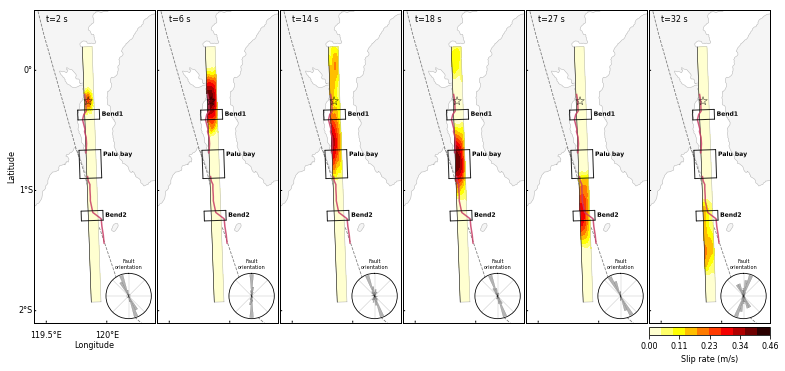

In [40]:
model=np.loadtxt('modellist.txt', dtype=int, usecols=0)
j = 4 # main model
print(str(model[j]))
snapind = [207, 214, 218, 228]
m_mllist = []; m_mllist_weight = []
latlist = []
figlocind = 0
figlochori = 0

fig=plt.figure(figsize=figsize)
for panel in [2, 6, 14, 18, 27, 32]:
    data=np.loadtxt('model_'+str(model[j])+'/snap_1s_'+str(200+panel)+'.txt', skiprows=1)
    lon, lat, slip = data[:,13], data[:,14], data[:,4]
    strike = data[:,9]; maxslip = data[0,8]
    argmaxslip = np.argmax(slip)
    latlist.append(lat[argmaxslip])
    tmp = [];slipHist = []
    for i in range(len(strike)):
        tmp0 = strike[i]
        if tmp0 > 88 and tmp0 < 268:
            tmp0 = tmp0 + 180
        if slip[i] > 0:
            tmp.append(tmp0)
            slipHist.append(slip[i])
    for i in range(len(tmp)):
        if tmp[i] > 360:
            tmp[i] = tmp[i] - 360    
    
    ax=fig.add_axes([0.278+(0.3 + 0.005)*figlocind, 0.11, 0.11248705535297888, 0.11248705535297888], projection='polar')                  

    figlocind += 1
    axp=ax.get_position()
    
    bin_edges = np.arange(-5, 366, 10)
    number_of_strikes, bin_edges = np.histogram(tmp, bin_edges)
    
    number_of_strikes[0] += number_of_strikes[-1]
    half = np.sum(np.split(number_of_strikes[:-1], 2), 0)
    two_halves = np.concatenate([half, half])
    
    ax.bar(np.deg2rad(np.arange(0, 360, 10)), two_halves, 
           width=np.deg2rad(10), bottom=0.0, color='C7', edgecolor='k', linewidth=0.1)
    x = [ (bin_edges[i-1]+bin_edges[i])/2 for i in range(1, len(bin_edges)) ]
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.arange(0, 360, 45), labels=[])
    ax.set_rgrids(np.arange(1, two_halves.max() + 1, 2000), angle=0, labels=[])
    ax.set_xticklabels([])
    ax.grid(linewidth=0.35)
    ax.set_axisbelow(True)
    ax.set_zorder(100)  # default zorder is 0 for ax1 and ax2
    axp = ax.get_position()
    fig.text(axp.x0 + (axp.x1-axp.x0)/2, axp.y1+0.01, 'Fault\norientation', size=5, va='bottom', ha='center')

############################################################################
model=np.loadtxt('modellist.txt', dtype=int, usecols=0)
strike_flag=0; slip_flag=0; beach_flag=0
fignums = ['(a)', '(b)', '(c)']
data=np.loadtxt('epicenter.dat')
elon, elat=(data[1], data[0])
lonmin=119.4; lonmax=120.4; latmin=-2.1; latmax=0.5
m=Basemap(llcrnrlon=lonmin,llcrnrlat=latmin,urcrnrlon=lonmax,urcrnrlat=latmax,\
          rsphere=(6378137.00,6356752.3142),resolution='h',projection='merc')
x, y=m([lonmin, lonmax], [latmin, latmax])
aspect=max(x)/max(y)
mapwidth=0.3; mapheight=mapwidth/aspect
j = 4 # main model
data=np.loadtxt('model_'+str(model[j])+'/FFM_DCpreferred.txt', skiprows=1)
lon, lat, slip, strike, dip, rake=data[:,2], data[:,3],data[:,1], data[:,7], data[:,8],data[:,9]
xloc, yloc = data[:,10], data[:,11]
data=np.loadtxt('model_'+str(model[j])+'/knot_value_'+str(model[j])+'.dat_rim', usecols=(2, 3))
limlon, limlat, limlontop, limlattop=data[:,1], data[:,0], data[2:4,1], data[2:4,0]

cmap=plt.get_cmap('hot_r')

dataInSARnorth=np.loadtxt('Bao+2019NatGeosci/Rupture_pick_ALOS2_A126-A127_azoff_north.gmt', comments='#')
dataInSARsouth=np.loadtxt('Bao+2019NatGeosci/Rupture_pick_ALOS2_A126-A127_azoff_south.gmt', comments='#')
snapind = [202, 206, 214, 218, 227, 232]
timeind = [2, 6, 14, 18, 27, 32]
for panel in [0, 1, 2, 3, 4, 5]:
    ax=fig.add_axes([0.1+(mapwidth + 0.005)*panel, 0.1, mapwidth, mapheight])
    axp=ax.get_position()
    fig.text(axp.x0+0.03, axp.y1-0.01, 't='+str(timeind[panel])+' s', ha='left', va='top')
    m.drawmapboundary(fill_color='#f5f5f5')
    m.fillcontinents(color='w')
    if panel == 0:
        m.drawparallels(np.arange(-80.,81.,1),labels=[1,0,0,0], fontsize=initfontsize, \
                    dashes=(2,10000), color='k')        
        m.drawmeridians(np.arange(-180.,181.,0.5),labels=[0,0,0,1], fontsize=initfontsize, \
                    dashes=(2,10000), color='k')

    else:
        m.drawparallels(np.arange(-80.,81.,1),labels=[0,0,0,0], fontsize=initfontsize, \
                    dashes=(2,10000), color='k')        
        m.drawmeridians(np.arange(-180.,181.,0.5),labels=[0,0,0,0], fontsize=initfontsize, \
                    dashes=(2,10000), color='k')
    m.drawcoastlines(color='C7', linewidth=0.5, zorder=2)
    if panel == 0:
        ax.set_ylabel('Latitude', labelpad=18)
        ax.set_xlabel('Longitude', labelpad=18)

    x, y=m(limlon, limlat)
    ax.plot(x, y, color='C7', zorder=50, lw=0.5, solid_joinstyle='miter')
    x, y=m(limlontop, limlattop)
    ax.plot(x, y, color='k', zorder=50, lw=0.5)

    ax = plt.gca()

    data=np.loadtxt('model_'+str(model[j])+'/snap_1s_'+str(snapind[panel])+'.txt', skiprows=1)
    lon, lat, slip = data[:,13], data[:,14], data[:,4]
    strike = data[:,9]
    maxslip = data[0,8]
    argmaxslip = np.argmax(slip)
    xi=np.linspace(lon.min(), lon.max(), 1000)
    yi=np.linspace(lat.min(), lat.max(), 1000)
    X,Y= np.meshgrid(xi,yi)
    X, Y=m(X, Y)
    m_lon, m_lat = m(*(lon, lat))
    resampled=griddata((m_lon, m_lat), slip, (X, Y),'linear')
    interval = np.linspace(0, maxslip, 11)
    sc=ax.contourf(X, Y, resampled, interval, cmap=cmap, vmin=0, vmax=maxslip, zorder=10, alpha=1)

    x, y=m(elon, elat)
    ax.scatter(x, y, s=80, marker='*', facecolor='none', edgecolor='k', alpha=0.8, zorder=101, lw=0.5)
    
    x, y =m(dataInSARnorth[:,0], dataInSARnorth[:,1])
    ax.plot(x, y, color='#c83c65', lw=1.5, alpha=0.85, zorder=100, label='Surface-rupture trace (Bao et al. 2019)')
    x, y =m(dataInSARsouth[:,0], dataInSARsouth[:,1])
    ax.plot(x, y, color='#c83c65', lw=1.5, alpha=0.85, zorder=100)

    data=np.loadtxt('Belleir2006Tectono_PKF_MF_traced.txt', comments='#')
    sx, sy = 49.35, 49.277
    tmplon, tmplat = data[:,0] / sx + 119.0, - data[:,1] / sy
    tmplon = np.insert(tmplon, 0, 119.346)
    tmplat = np.insert(tmplat, 0, 0.834)
    x, y=m(tmplon, tmplat)
    ax.plot(x, y, zorder=2, lw=0.8, color='k', alpha=0.5, linestyle='--', 
            label='Palu-Koro fault (Bellier et al. 2006)')

    arrow_params = {'shape': 'full', 'overhang':0.5, 'head_width':0, 'head_length':0}
        
    bend_index = 0
    for k, distance in enumerate(bx):
        g=geod.Direct(elat, elon, 358.0, distance*1e3)
        gx, gy = m(g['lon2'], g['lat2'])
        g_p=geod.Direct(g['lat2'], g['lon2'], 358.0-90.0, 10.0*1e3)
        g_m=geod.Direct(g['lat2'], g['lon2'], 358.0-90.0, -10.0*1e3)
        glon = g_p['lon2'], g_m['lon2']
        glat = g_p['lat2'], g_m['lat2']
        gx, gy = m(glon, glat)
        ax.plot(gx, gy, color='k', linewidth=1, alpha=0.85, zorder=100, solid_capstyle='round')
        if k%2 == 0:
            g=geod.Direct(g_m['lat2'], g_m['lon2'], 358.0, -(bx[k]-bx[k+1])*1e3)
            glon = g['lon1'], g['lon2']
            glat = g['lat1'], g['lat2']
            gx, gy = m(glon, glat)
            ax.plot(gx, gy, color='k', linewidth=1, alpha=0.85, zorder=100, solid_capstyle='round')
            x, y = m(g['lon1']+0.02, g['lat1']-0.02)
            if distance >= -69 and distance <= -45:
                text=ax.text(x, y, 'Palu bay', size=6, weight='bold', color='k', va='top', ha='left')
                text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='w'), path_effects.Normal()])
            else:
                bend_index += 1
                text=ax.text(x, y, 'Bend'+str(bend_index), size=6, weight='bold', color='k', va='top', ha='left')
                text.set_path_effects([path_effects.Stroke(linewidth=1, foreground='w'), path_effects.Normal()])
            g=geod.Direct(g_p['lat2'], g_p['lon2'], 358.0, -(bx[k]-bx[k+1])*1e3)
            glon = g['lon1'], g['lon2']
            glat = g['lat1'], g['lat2']
            gx, gy = m(glon, glat)
            ax.plot(gx, gy, color='k', linewidth=1, alpha=0.85, zorder=1020, solid_capstyle='round')

    if panel == 5:
        cax=fig.add_axes([axp.x0, axp.y0-0.03, axp.x1-axp.x0, 0.02])
        cbar=plt.colorbar(sc, cax=cax, ticks=np.linspace(0, maxslip, 5), format='%.2f', label='Slip rate (m/s)', orientation='horizontal')
        
plt.savefig('../pubFigure/figureGraphicalAbstractRose.png', bbox_inches='tight', pad_inches=0.1)
plt.savefig('../pubFigure/figureGraphicalAbstractRose.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

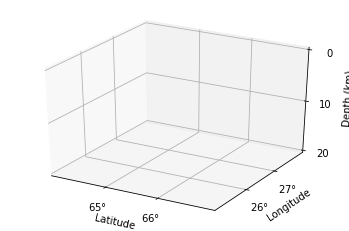

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.set_xlim(64, 67)
ax.set_ylim(25, 28)
ax.set_zlim(0, 20)

ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Depth (km)')

ax.set_xticks([65, 66])
ax.set_yticks([26, 27])
ax.set_zticks([0, 10, 20])

ax.set_xticklabels(['65$\degree$', '66$\degree$'])
ax.set_yticklabels(['26$\degree$', '27$\degree$'])

plt.gca().invert_zaxis()
plt.show()

In [125]:
def bandpass(data, freqmin, freqmax, df, corners=4, zerophase=True):
    """
    Butterworth-Bandpass Filter.
    Filter data from ``freqmin`` to ``freqmax`` using ``corners``
    corners.
    The filter uses :func:`scipy.signal.iirfilter` (for design)
    and :func:`scipy.signal.sosfilt` (for applying the filter).
    :type data: numpy.ndarray
    :param data: Data to filter.
    :param freqmin: Pass band low corner frequency.
    :param freqmax: Pass band high corner frequency.
    :param df: Sampling rate in Hz.
    :param corners: Filter corners / order.
    :param zerophase: If True, apply filter once forwards and once backwards.
        This results in twice the filter order but zero phase shift in
        the resulting filtered trace.
    :return: Filtered data.
    """
    from scipy.signal import iirfilter 
    fe = 0.5 * df
    low = freqmin / fe
    high = freqmax / fe
    # raise for some bad scenarios
    if high - 1.0 > -1e-6:
        msg = ("Selected high corner frequency ({}) of bandpass is at or "
               "above Nyquist ({}). Applying a high-pass instead.").format(
            freqmax, fe)
        warnings.warn(msg)
        return highpass(data, freq=freqmin, df=df, corners=corners,
                        zerophase=zerophase)
    if low > 1:
        msg = "Selected low corner frequency is above Nyquist."
        raise ValueError(msg)
    z, p, k = iirfilter(corners, [low, high], btype='band',
                        ftype='butter', output='zpk')
    sos = zpk2sos(z, p, k)
    if zerophase:
        firstpass = sosfilt(sos, data)
        return sosfilt(sos, firstpass[::-1])[::-1]
    else:
        return sosfilt(sos, data)


72


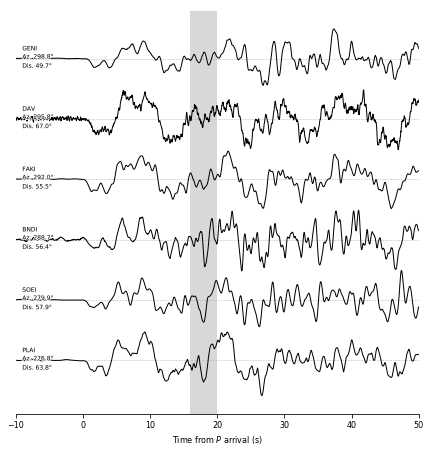

In [134]:
import obspy
st = obspy.read('sac/*.SAC')
print(len(st))
fig=plt.figure(figsize=figsize)
ax=fig.add_axes([0, 0, 1, 1])
#text.set_path_effects([path_effects.Stroke(linewidth=1.5, foreground='w', alpha=0.85), path_effects.Normal()])
pe=([path_effects.Stroke(linewidth=1.5, foreground='w', alpha=0.95), path_effects.Normal()])


for i in range(len(st)):
    trace = st[i].copy()
    az = trace.stats.sac.az
    st[i].stats.dataquality = az
st.sort(['dataquality'])
cmap = generate_cmap(['#e3cc3b', '#abc353', '#7bb3dc'])
#cmap = generate_cmap(['#7bb3dc', '#abc353', '#e3cc3b'])
#cmap = generate_cmap(['#a8c435', '#87613a', '#5fa8d1'])
num = 0
for i in range(len(st)):
#for i in [5]:
    trace = st[i].copy()
    station = trace.stats.station
    
#    if station == 'DAV' or station == 'PLAI' or station == 'FAKI'\
#    or station == 'BNDI' or station == 'GENI' or station == 'SOEI':
    if station == 'DAV' or station == 'PLAI' or station == 'FAKI' or station == 'BNDI' or station == 'GENI' or station == 'SOEI':
#    if station == 'LCO' or station == 'PEL' or station == 'TRQA' or station == 'COYC' or station == 'EFI':
#    or station == 'POHA' or station == 'KIP' or station == 'JOHN' or station == 'MIDW':
#    or station == 'SBA' or station == 'CCD' or station == 'DRV':
        ppick = trace.stats.sac.a
        az = trace.stats.sac.az
        df = trace.stats.sampling_rate

        #trace.detrend('demean')
        #trace.detrend('simple')
        #trace.taper(max_percentage=0.05, type='cosine')
        #trace.filter('bandpass', freqmin=0.01, freqmax=0.1, corners=4, zerophase=True)
        
        #cutdata = trace.data[0:int(600*df)]
        cutdata = trace.data[int((ppick-10)*df):int((ppick+50)*df)]
        t = np.arange(0, len(cutdata), 1) / df
        tmp = cutdata.data/max(cutdata)*5

        #ax.plot(t-ppick, tmp+az-np.mean(tmp), color='k', lw=0.5, alpha=0.85)
        #ax.text(-10, az, trace.stats.station, size=4, ha='left', va='center').set_path_effects(pe)

        shift=num*10
        ax.plot(t-10, tmp+shift-np.mean(tmp), color='k', lw=1, alpha=1)
        tmp = station+'\nAz. '+str('{:.1f}'.format(trace.stats.sac.az))+'$\degree$\nDis. '+str('{:.1f}'.format(trace.stats.sac.gcarc))+'$\degree$'
        ax.text(-9, shift, tmp, size=6, ha='left', va='center').set_path_effects(pe)
        
        ax.axhline(shift, lw=0.5, color='C7', linestyle='--', zorder=0)
        
        num += 1

ax.set_xlim(-10, 50)
#ax.set_ylim(-0.65, 11.8)
ax.axvspan(16, 20, alpha=0.5, facecolor='C7', edgecolor='none', zorder=0)
ax.set_yticks([])

ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False); ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False); ax.get_yaxis().set_ticks([])
ax.set_xlabel('Time from $P$ arrival (s)')
plt.savefig('traceAz.pdf', bbox_inches='tight', pad_inches=0, dpi=60)
plt.show()

In [4]:
import obspy
st = obspy.read('/Volumes/WDMyPassport4TB/B1482/B1482.DPZ.2019-09-25T00:00:00.000.mseed')
st

1 Trace(s) in Stream:
AA.B1482.00.DPZ | 2019-09-25T00:00:00.000000Z - 2019-09-25T23:59:59.998000Z | 500.0 Hz, 43200000 samples

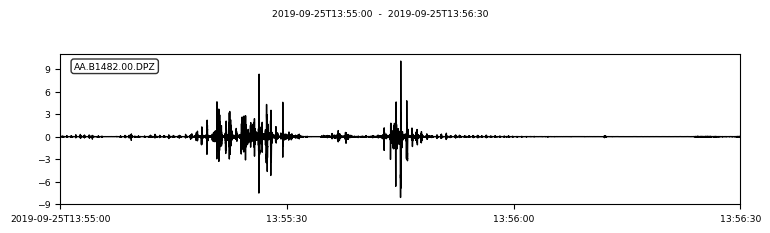

In [7]:
st[0].plot(starttime=obspy.UTCDateTime('2019-09-25T13:55:00'), endtime=obspy.UTCDateTime('2019-09-25T13:56:30'))

In [ ]:
st.spectrogram(log=True)